# Obtain and Load Data

Jon Kaplan

In [0]:
import pandas as pd

#just load this one chunk and you should be good rest of code for datasets, its all hosted on dropbox

# NOMINEE STATS AND AWARDS DATAFRAME

#nom_awards
# nominee book stats and award info for every book (duplicate bookIDs since multiple noms by different award entities)
# 3590 by 45 shape
# nom_awards=pd.read_csv('https://www.dropbox.com/s/1mll9m9r27wy5iz/nominees_stats_awards_all.csv?dl=1')

#nom_awards2
# 3583 by 62 shape
# alternate version of nominee award dataframe with demographic info
nom_awards=pd.read_csv('https://www.dropbox.com/s/ysuekksts86beag/final_nominations_df.csv?dl=1')


# NOMINEE STATS DATAFRAME
# nominee book stats only for each unique bookID, no award info
# 2622 by 22 shape
nom_stats_only=pd.read_csv('https://www.dropbox.com/s/blo4x2djwp37wvz/nominee_book_stats_unique.csv?dl=1')

# HUGO DATAFRAME
# only nominations from Hugo
# 958 by 45 shape
hugo=nom_awards[nom_awards['AwardEntity']=='Hugo']

# NEBULA DATAFRAME
# only nominations from nebula
# 792 by 45 shape
nebula=nom_awards[nom_awards['AwardEntity']=='Nebula']

# LOCUS DATAFRAME
# only nominations from locus
# 1840 by 45 shape
locus=nom_awards[nom_awards['AwardEntity']=='Locus']

# WINNERS DATAFRAME
# all nominees who won subdataframe
winners=nom_awards[nom_awards['Winner']==1]

losers=nom_awards[nom_awards['Winner']==0]

# BOOKS_NLP DATAFRAME
# NLP related columns for ALL nominations (duplicate bookIDs since multiple noms by different award entities)
# columns: description, author bio, gender, AwardCategory, AwardEntity, Winner
# 3015 by 12 shape
books_nlp=pd.read_csv('https://www.dropbox.com/s/0k1vsluyigqyofk/books_nlp_all.csv?dl=1')

# BOOKS_NLP_UNIQUE DATAFRAME
# NLP related columns just for each unique bookID 
# columns: description, author bio, gender, AwardCategory
#2196 by 10 shape
books_nlp_unique=pd.read_csv('https://www.dropbox.com/s/om6jonrqkqcltpp/books_nlp_unique.csv?dl=1')

# style settings
import pandas as pd
import numpy as np
import requests
import ast
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
import calendar
import plotly.graph_objs as go
import plotly.offline as offline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
import nltk
from nltk.corpus import stopwords


# Theme and styles for visuals
matplotlib.rcParams['font.family'] = "serif" # font
sns.set_context('talk') # visuals outputted for presentation style
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# use this to export visual so can edit in illustrator
# Remember: transparent=True
plt.savefig("output-bargraph.pdf", transparent=True)


<Figure size 842.4x595.44 with 0 Axes>

In [0]:
nom_awards

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,born,occupation,nationality,BirthYear,StateBorn,AgeNominated,CountryBorn,USA_Region,Northeast,West,South,Midwest,female,male
0,0,4,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0,1,0
1,1,9,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0,1,0
2,2,14,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0,1,0
3,3,15,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
4,4,16,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,3578,33168,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,44.0,NaN,March 3rd 2016,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,male,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"August 11, 1928Des Moines, Iowa, USA","Novelist, physician",American,1928.0,Iowa,28.0,USA,Midwest,0,0,0,1,0,1
3579,3579,33171,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-

In [0]:
#  # load big books
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/My\ Drive/mydata

# books=pd.read_csv('booksFPawardsReviewsFP.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/mydata


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,7,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
books=pd.read_csv('booksFPawardsReviewsFP.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,7,19,21) have mixed types.Specify dtype option on import or set low_memory=False.



#

# Add New Features

## BirthYear

In [0]:
#nom_awards['BirthYear']=nom_awards['born'].str.extract('(\d{4})')

## USA Regions

In [0]:
# create usa region columns, 1 or 0 based on if author is from state in region


# # region vectors
# Northeast=['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'New York City', 'Pennsylvania']
# West=['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
# South=['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'Washington D.C.', 'DC', 'West Virginia']
# Midwest=['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']

# nom_awards['Northeast']=nom_awards['StateBorn'].apply(lambda a : 1 if a in Northeast else 0)
# nom_awards['West']=nom_awards['StateBorn'].apply(lambda x : 1 if x in West else 0)
# nom_awards['South']=nom_awards['StateBorn'].apply(lambda j : 1 if j in South else 0)
# nom_awards['Midwest']=nom_awards['StateBorn'].apply(lambda i : 1 if i in Midwest else 0)
# nom_awards

# #south 7.5%
# print(96/1273)

# #west 20.1%
# print(256/1273)

# # northeast 38.5%
# print(490/1273)

# # Midwest 33.9%
# print(431/1273)



## Country

In [0]:
# extract country
# nom_awards['CountryBorn']=statsawards2['born'].str.split(',', expand=True)[3]

## AgeNominated

In [0]:
# age of author when nominated

# nom_awards['AgeNominated']=nom_awards.publication_year-nom_awards.BirthYear

## PastNominations

In [0]:
# new column that counts the previous amount of nominations for an author prior to that current year's nomination

# nom_awards['PastNominations'] = list(map(lambda x : len(nom_awards[(nom_awards['authorName'] == nom_awards.iloc[x]['authorName']) & 
#                                                           (nom_awards['publication_year'] < nom_awards.iloc[x]['publication_year'])]), nom_awards.index.values))

## StateBorn

In [0]:
# # extract state born
# nom_awards['StateBorn']=nom_awards['born'].str.split(',', expand=True)[2]

# Observe Nominees

In [0]:
nom_awards.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,3590.000000,3.590000e+03,3417.000000,3588.000000,3590.000000,3.590000e+03,3590.000000,3590.000000,3590.000000,3590.000000,3590.0,3590.000000,3590.000000,3590.000000,3590.000000,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0,3590.0
mean,1794.500000,1.051085e+07,311.118525,1997.701505,3.867287,2.962556e+04,1502.695265,12732.776602,0.352925,0.381337,1.0,0.257660,0.266852,0.512535,0.220613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1036.488061,1.304544e+07,204.968697,16.061157,0.426866,1.865352e+05,6322.531203,64525.347635,0.477946,0.485783,0.0,0.437407,0.442376,0.499912,0.414718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.000000e+00,0.000000,1953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,897.250000,2.567408e+05,176.000000,1985.000000,3.710000,1.100000e+02,13.000000,180.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1794.500000,2.945966e+06,296.000000,2001.000000,3.900000,9.625000e+02,90.500000,891.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2691.750000,1.818090e+07,403.000000,2012.000000,4.070000,8.167750e+03,587.500000,3948.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3589.000000,5.312054e+07,3101.000000,2020.000000,5.000000,6.157960e+06,168538.000000,715991.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
hugo.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,958.000000,9.580000e+02,894.000000,958.000000,958.000000,9.580000e+02,958.000000,958.000000,958.000000,958.000000,958.0,958.000000,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0
mean,2115.269311,1.132198e+07,272.689038,1994.581420,3.875177,2.439127e+04,1162.940501,8979.886221,0.328810,0.327766,1.0,0.303758,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1240.296092,1.376168e+07,221.389174,17.833233,0.463148,1.415146e+05,3986.299201,35935.718033,0.470026,0.469644,0.0,0.460120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,5.000000e+00,0.000000,1953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,966.500000,2.771452e+05,134.000000,1981.000000,3.700000,7.950000e+01,9.000000,180.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2297.500000,4.003444e+06,242.000000,1997.000000,3.910000,7.590000e+02,72.000000,826.500000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3349.750000,1.976442e+07,365.000000,2010.000000,4.100000,7.757000e+03,539.250000,3893.750000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3589.000000,5.282637e+07,3101.000000,2020.000000,5.000000,2.657512e+06,52326.000000,715986.000000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
nebula.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,792.000000,7.920000e+02,727.000000,791.000000,792.000000,7.920000e+02,792.000000,792.00000,792.000000,792.000000,792.0,792.000000,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0
mean,797.670455,1.027703e+07,252.975241,1993.188369,3.780896,2.067105e+04,1142.823232,4516.47601,0.332071,0.313131,1.0,0.273990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,439.766190,1.251080e+07,174.427397,16.674354,0.446048,1.176089e+05,4804.669874,17464.04964,0.471254,0.464060,0.0,0.446286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,3.530000e+02,0.000000,1965.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,442.500000,3.525775e+05,124.000000,1978.000000,3.630000,5.375000e+01,8.000000,132.75000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,802.500000,3.091832e+06,250.000000,1994.000000,3.830000,5.320000e+02,52.000000,544.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1169.500000,1.819816e+07,350.000000,2009.000000,4.000000,3.805000e+03,324.000000,2160.25000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1518.000000,5.090688e+07,1177.000000,2018.000000,5.000000,1.932646e+06,67416.000000,221957.00000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
locus.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,1840.000000,1.840000e+03,1796.000000,1839.000000,1840.000000,1.840000e+03,1840.000000,1840.000000,1840.000000,1840.000000,1840.0,1840.000000,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0
mean,2056.560870,1.018919e+07,353.783408,2001.268080,3.900364,3.620514e+04,1834.490761,18223.308696,0.374457,0.438587,1.0,0.226630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,814.031263,1.287571e+07,198.334374,13.848214,0.392512,2.268120e+05,7719.420438,85180.777829,0.484114,0.496349,0.0,0.418765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000e+00,0.000000,1971.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1647.750000,2.191940e+05,240.000000,1989.000000,3.740000,1.897500e+02,22.000000,245.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2185.500000,2.529186e+06,334.000000,2006.000000,3.920000,1.400000e+03,131.000000,1259.500000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2691.250000,1.769748e+07,448.000000,2013.000000,4.092500,1.061550e+04,747.250000,5189.000000,1.000000,1.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3239.000000,5.312054e+07,1931.000000,2019.000000,5.000000,6.157960e+06,168538.000000,715991.000000,1.000000,1.000000,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
books.describe()

,Unnamed: 0,text_reviews_count,average_rating,num_pages,publication_day,publication_month,publication_year,book_id,ratings_count,work_id,rating,n_votes,n_comments,bookID,Nominee,Nominee_Winner
count,320535.000000,320535.000000,320535.000000,316462.000000,270981.000000,293735.000000,304317.000000,3.205350e+05,3.205350e+05,3.205350e+05,320535.000000,320535.000000,320535.000000,3.205350e+05,320535.000000,320535.0
mean,160267.000000,12476.964743,4.092187,511.726473,15.677605,6.439372,2008.588498,7.598691e+06,3.012665e+05,1.190993e+07,3.907165,1.190716,0.322935,7.598691e+06,0.670180,1.0
std,92530.628605,13334.612225,0.268939,281.443084,10.154603,2.848768,5.629139,9.090635e+06,4.543760e+05,1.421980e+07,1.217122,10.980540,2.756315,9.090635e+06,0.470149,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1963.000000,1.000000e+00,0.000000e+00,1.528000e+03,0.000000,-3.000000,0.000000,1.000000e+00,0.000000,1.0
25%,80133.500000,2281.000000,3.920000,312.000000,5.000000,4.000000,2006.000000,6.190300e+04,2.180900e+04,1.970226e+06,3.000000,0.000000,0.000000,6.190300e+04,0.000000,1.0
50%,160267.000000,7402.000000,4.070000,427.000000,17.000000,7.000000,2010.000000,2.213661e+06,8.091200e+04,3.272005e+06,4.000000,0.000000,0.000000,2.213661e+06,1.000000,1.0
75%,240400.500000,17085.000000,4.270000,662.000000,26.000000,9.000000,2013.000000,1.578351e+07,3.743150e+05,2.150068e+07,5.000000,0.000000,0.000000,1.578351e+07,1.000000,1.0
max,320534.000000,46150.000000,5.000000,1216.000000,31.000000,12.000000,2019.000000,3.635281e+07,1.792561e+06,5.803510e+07,5.000000,1463.000000,474.000000,3.635281e+07,1.000000,1.0


In [0]:
booksony=books.drop_duplicates(subset='bookID')

In [0]:
allbooks=pd.read_csv('https://www.dropbox.com/s/vpxd3opdhzmwtq6/final_nominations_df.csv?dl=1')
allbooks

,Unnamed: 0,Unnamed: 0.1,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,born,occupation,nationality,BirthYear,StateBorn,AgeNominated,CountryBorn,USA_Region,Northeast,West,South,Midwest
0,4,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0
1,9,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0
2,14,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0
3,15,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,16,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,33168,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,44.0,NaN,March 3rd 2016,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,male,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"August 11, 1928Des Moines, Iowa, USA","Novelist, physician",American,1928.0,Iowa,28.0,USA,Midwest,0,0,0,1
3579,33171,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-dinosaur,Mass Market Paperback,319.0,English,1969,1956.0,Curtis Books,[A Reginald R

In [0]:
# winners
winners=allbooks[allbooks['Winner']==1]

In [0]:
winners.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,919.000000,919.000000,9.190000e+02,866.000000,917.000000,919.000000,9.190000e+02,919.000000,919.000000,919.000000,919.000000,919.0,919.0,919.000000,919.000000,919.000000,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.0,919.000000,479.000000,479.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,13362.602829,1261.743199,8.286569e+06,327.758661,1994.871320,3.934864,3.692363e+04,1885.582155,15973.368879,0.290533,0.362350,1.0,1.0,0.314472,0.451578,0.233950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.144723,1948.450939,44.240084,0.129489,0.090316,0.036997,0.124048,0.287269,0.712731
std,9932.270005,1004.899622,1.164422e+07,246.542230,15.721332,0.305648,1.671898e+05,5906.800316,66814.850128,0.454256,0.480941,0.0,0.0,0.464558,0.497921,0.423571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.028006,17.761471,9.864499,0.335923,0.286789,0.188857,0.329816,0.452734,0.452734
min,4.000000,0.000000,5.000000e+00,0.000000,1953.000000,2.600000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3390.500000,313.500000,1.900870e+05,164.000000,1983.000000,3.760000,1.250000e+02,11.500000,250.500000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1935.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15370.000000,1366.000000,1.280902e+06,294.000000,1997.000000,3.950000,1.026000e+03,94.000000,1260.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,1949.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,19942.500000,1769.500000,1.354359e+07,422.000000,2008.000000,4.130000,1.360650e+04,841.000000,5801.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,1963.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,31352.000000,3335.000000,5.236782e+07,3101.000000,2019.000000,4.930000,2.657512e+06,70308.000000,715986.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,1982.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
hugo=allbooks[allbooks['AwardEntity']=='Hugo']

# NEBULA DATAFRAME
# only nominations from nebula
# 792 by 45 shape
nebula=allbooks[allbooks['AwardEntity']=='Nebula']

# LOCUS DATAFRAME
# only nominations from locus
# 1840 by 45 shape
locus=allbooks[allbooks['AwardEntity']=='Locus']

In [0]:
hugo.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,955.000000,955.000000,9.550000e+02,891.000000,955.000000,955.000000,9.550000e+02,955.00000,955.000000,955.000000,955.000000,955.0,955.000000,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.0,955.000000,520.000000,520.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,20729.193717,2119.411518,1.130517e+07,272.890011,1994.610471,3.875623,2.446140e+04,1165.94555,8903.973822,0.328796,0.328796,1.0,0.302618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.105759,1949.271154,44.203846,0.141361,0.068063,0.032461,0.142408,0.224084,0.775916
std,11166.730838,1239.335746,1.375323e+07,221.710641,17.851680,0.463707,1.417314e+05,3992.19717,35882.086236,0.470022,0.470022,0.0,0.459632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.131645,20.761457,11.882241,0.348576,0.251986,0.177313,0.349652,0.417196,0.417196
min,14.000000,2.000000,5.000000e+00,0.000000,1953.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1771.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10085.500000,970.500000,2.775235e+05,133.500000,1981.000000,3.700000,7.800000e+01,9.00000,180.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1935.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,23546.000000,2332.000000,3.973532e+06,243.000000,1997.000000,3.910000,7.570000e+02,72.00000,822.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1950.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31454.500000,3350.500000,1.969287e+07,365.000000,2010.000000,4.100000,7.772000e+03,542.50000,3839.500000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,1966.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33175.000000,3589.000000,5.282637e+07,3101.000000,2020.000000,5.000000,2.657512e+06,52326.00000,715986.000000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,1983.000000,218.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
just_dummies = pd.get_dummies(allbooks['gender'])

allbooks=pd.concat([allbooks, just_dummies], axis=1)   

In [0]:
nebula.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,790.000000,790.000000,7.900000e+02,725.000000,789.000000,790.000000,7.900000e+02,790.000000,790.000000,790.000000,790.000000,790.0,790.000000,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.0,790.000000,471.000000,471.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,8795.940506,799.005063,1.028657e+07,253.066207,1993.205323,3.780709,2.071760e+04,1145.270886,4522.624051,0.331646,0.313924,1.0,0.272152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.835443,1948.808917,44.728238,0.192405,0.078481,0.021519,0.150633,0.293671,0.706329
std,5031.125541,439.516885,1.252095e+07,174.622959,16.690552,0.446598,1.177542e+05,4810.506059,17485.599831,0.471103,0.464380,0.0,0.445350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.864321,16.765517,9.854820,0.394439,0.269097,0.145199,0.357917,0.455731,0.455731
min,4.000000,0.000000,3.530000e+02,0.000000,1965.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5322.750000,445.250000,3.527755e+05,124.000000,1978.000000,3.630000,5.325000e+01,8.000000,132.250000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1935.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8618.000000,804.000000,3.091832e+06,250.000000,1994.000000,3.830000,5.270000e+02,52.000000,538.500000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1949.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13125.750000,1170.500000,1.820504e+07,351.000000,2009.000000,4.000000,3.782750e+03,326.000000,2125.750000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,1960.000000,52.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,17507.000000,1518.000000,5.090688e+07,1177.000000,2018.000000,5.000000,1.932646e+06,67416.000000,221957.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.000000,1990.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
locus.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,1838.000000,1838.000000,1.838000e+03,1794.000000,1837.000000,1838.000000,1.838000e+03,1838.000000,1838.000000,1838.000000,1838.000000,1838.0,1838.000000,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.0,1838.000000,928.000000,928.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,20874.224701,2057.685528,1.018220e+07,354.110368,2001.280893,3.900283,3.624432e+04,1836.460827,18190.440152,0.374864,0.439064,1.0,0.225789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.881937,1953.974138,42.165948,0.109358,0.070185,0.026115,0.095756,0.300326,0.699674
std,7438.882038,813.438804,1.287566e+07,198.200513,13.846754,0.392562,2.269323e+05,7723.390174,85207.291042,0.484220,0.496408,0.0,0.418215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.307533,16.495280,10.199543,0.312173,0.255528,0.159522,0.294337,0.458525,0.458525
min,9.000000,1.000000,1.000000e+00,0.000000,1971.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18539.250000,1648.250000,2.191380e+05,240.000000,1989.000000,3.740000,1.905000e+02,22.000000,245.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1944.750000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22601.500000,2186.500000,2.521485e+06,334.000000,2006.000000,3.920000,1.407500e+03,131.500000,1259.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1952.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,25976.500000,2691.750000,1.768800e+07,448.000000,2013.000000,4.090000,1.062850e+04,747.750000,5184.750000,1.000000,1.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,1966.250000,49.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,30538.000000,3239.000000,5.312054e+07,1931.000000,2019.000000,5.000000,6.157960e+06,168538.000000,715991.000000,1.000000,1.000000,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,1990.000000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
allbooks.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,3583.000000,3583.000000,3.583000e+03,3410.000000,3581.000000,3583.000000,3.583000e+03,3583.000000,3583.000000,3583.000000,3583.000000,3583.0,3583.000000,3583.000000,3583.000000,3583.000000,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.0,3583.000000,1919.000000,1919.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000
mean,18172.480603,1796.616802,1.050453e+07,311.405279,1997.722703,3.867346,2.968032e+04,1505.346637,12701.701647,0.353056,0.382082,1.0,0.256489,0.266536,0.512978,0.220486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.490371,1951.431996,43.347056,0.136199,0.071449,0.026793,0.120290,0.278538,0.721462
std,9593.941617,1035.958259,1.304470e+07,205.041875,16.066983,0.427156,1.867132e+05,6328.419102,64557.647938,0.477987,0.485964,0.0,0.436756,0.442210,0.499901,0.414632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.535779,17.975114,10.659506,0.343047,0.257608,0.161501,0.325346,0.448342,0.448342
min,4.000000,0.000000,1.000000e+00,0.000000,1953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1771.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9579.500000,900.500000,2.567985e+05,176.000000,1985.000000,3.710000,1.100000e+02,13.000000,180.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1941.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20183.000000,1797.000000,2.940362e+06,297.000000,2001.000000,3.900000,9.640000e+02,91.000000,873.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1951.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,26035.500000,2693.500000,1.816707e+07,404.000000,2012.000000,4.070000,8.177000e+03,588.000000,3948.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,1966.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,33175.000000,3589.000000,5.312054e+07,3101.000000,2020.000000,5.000000,6.157960e+06,168538.000000,715991.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,1990.000000,218.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Winners by Awards

In [0]:
hugo=winners[winners['AwardEntity']=='Hugo']

# NEBULA DATAFRAME
# only nominations from nebula
# 792 by 45 shape
nebula=winners[winners['AwardEntity']=='Nebula']

# LOCUS DATAFRAME
# only nominations from locus
# 1840 by 45 shape
locus=winners[winners['AwardEntity']=='Locus']

In [0]:
hugo.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,289.000000,289.000000,2.890000e+02,269.000000,289.000000,289.000000,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.000000,151.000000,151.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,18462.259516,1868.906574,8.960339e+06,288.033457,1992.193772,3.972215,3.920705e+04,1800.955017,12041.813149,0.273356,0.346021,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.051903,1946.211921,44.682119,0.114187,0.072664,0.051903,0.155709,0.231834,0.768166
std,11630.018359,1260.711443,1.194820e+07,275.052279,17.779626,0.309836,1.775332e+05,5367.500436,52246.845645,0.446455,0.476525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.354183,19.333773,9.767545,0.318590,0.260035,0.222216,0.363209,0.422736,0.422736
min,101.000000,11.000000,6.000000e+00,0.000000,1953.000000,2.600000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5620.000000,473.000000,2.163410e+05,140.000000,1978.000000,3.780000,1.140000e+02,11.000000,294.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1934.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,19533.000000,1730.000000,1.715812e+06,250.000000,1994.000000,3.980000,9.250000e+02,82.000000,1332.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1949.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30767.000000,3263.000000,1.361389e+07,373.000000,2008.000000,4.170000,1.507500e+04,696.000000,4765.000000,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,1959.500000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31352.000000,3335.000000,5.236782e+07,3101.000000,2019.000000,4.730000,2.470245e+06,43846.000000,715986.000000,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,1982.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
nebula.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,215.000000,215.000000,2.150000e+02,195.000000,214.000000,215.000000,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.000000,127.000000,127.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2582.837209,238.093023,9.653985e+06,243.641026,1991.453271,3.835349,2.777543e+04,1570.009302,5873.962791,0.293023,0.283721,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.855814,1947.015748,44.559055,0.195349,0.097674,0.032558,0.130233,0.376744,0.623256
std,1626.992124,137.705940,1.216275e+07,160.645490,16.113015,0.305276,1.131104e+05,5037.309359,23561.408848,0.456211,0.451855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.697548,16.032202,10.408066,0.397394,0.297567,0.177891,0.337345,0.485701,0.485701
min,4.000000,0.000000,7.967000e+03,3.000000,1965.000000,2.670000,1.000000e+00,0.000000,2.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1356.500000,123.500000,3.179885e+05,115.500000,1977.000000,3.670000,6.100000e+01,8.000000,131.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1935.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2181.000000,228.000000,3.149571e+06,251.000000,1992.000000,3.850000,4.960000e+02,55.000000,690.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1948.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3779.500000,355.000000,1.766200e+07,334.500000,2006.000000,4.030000,5.515500e+03,373.000000,2816.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,1956.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5639.000000,476.000000,5.090688e+07,760.000000,2018.000000,4.630000,1.091200e+06,42623.000000,221957.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.000000,1982.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
locus.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,415.000000,415.000000,4.150000e+02,402.000000,414.000000,415.000000,4.150000e+02,415.000000,415.000000,415.000000,415.000000,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.000000,201.000000,201.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,15395.973494,1369.248193,7.108945e+06,395.144279,1998.507246,3.960410,4.007292e+04,2108.004819,23943.469880,0.301205,0.414458,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.609639,1951.039801,43.706468,0.106024,0.098795,0.028916,0.098795,0.279518,0.720482
std,6374.890951,557.316694,1.105417e+07,242.934592,13.019958,0.292277,1.827171e+05,6640.862586,87095.320426,0.459335,0.493223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.948903,17.316709,9.605645,0.308240,0.298747,0.167772,0.298747,0.449304,0.449304
min,9.000000,1.000000,5.000000e+00,0.000000,1971.000000,2.750000,2.000000e+00,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11825.000000,1100.000000,1.084405e+05,248.000000,1988.000000,3.790000,2.045000e+02,17.500000,258.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1935.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18403.000000,1617.000000,8.904470e+05,352.000000,1999.500000,3.970000,1.747000e+03,150.000000,1681.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,1951.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,19776.000000,1753.000000,9.476494e+06,485.500000,2009.000000,4.150000,1.825100e+04,1266.000000,11868.000000,1.000000,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,1966.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,20935.000000,1885.000000,4.346674e+07,1931.000000,2019.000000,4.930000,2.657512e+06,70308.000000,715986.000000,1.000000,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,1980.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
allbooks.languages.value_counts()

English       3489
Spanish         10
French           7
Japanese         4
Italian          4
German           4
Russian          4
Hebrew           2
Polish           2
Danish           1
Swedish          1
Portuguese       1
Name: languages, dtype: int64

703

In [0]:
allbooks.format.value_counts()

Paperback                    1505
Hardcover                     868
Mass Market Paperback         362
Kindle Edition                338
ebook                         267
Audiobook                      32
Perfectbound                   25
Nook                           18
Audio CD                       15
Audio Cassette                  8
Audible Audio                   8
Unknown Binding                 5
paper                           4
Magazine                        3
short story                     2
Pasta blanda                    1
Chapbook                        1
Slipcased hardcover (1-3)       1
eBook (online/PDF)              1
Capa dura                       1
Hardback                        1
mass_market                     1
hardcover                       1
Name: format, dtype: int64

0    2214
1    1369
Name: book_series, dtype: int64

In [0]:
winners.publisher.value_counts()

Tor Books                  47
Del Rey                    31
Ace                        23
Orbit                      16
Bantam Spectra             14
                           ..
Solaris Books               1
Fawcett Popular Library     1
Scholastic Inc.             1
St. Martins Press           1
William Morrow Books        1
Name: publisher, Length: 315, dtype: int64

In [0]:
47/315

0.1492063492063492

In [0]:
allbooks.to_csv('final_nominations_df2.csv')

In [0]:
print(allbooks.dtypes)

Unnamed: 0       int64
Unnamed: 0.1     int64
bookID           int64
asin            object
isbn            object
                 ...  
West             int64
South            int64
Midwest          int64
female           uint8
male             uint8
Length: 61, dtype: object


In [0]:
allbooks.shape

(3583, 61)

## Best Novel

In [0]:
bn=allbooks[allbooks['AwardCategory']=='Best Novel']
bnovella=allbooks[allbooks['AwardCategory']=='Best Novella']
novellete=allbooks[allbooks['AwardCategory']=='Best Novelette']
shortstory=allbooks[allbooks['AwardCategory']=='Best Short Story']

In [0]:
shortstory.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,432.000000,432.000000,4.320000e+02,366.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.000000,219.000000,219.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,15193.125000,1508.261574,1.771945e+07,169.270492,1995.766204,3.734630,771.645833,80.638889,4977.456019,0.347222,0.138889,1.0,0.333333,0.381944,0.287037,0.331019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.712963,1953.200913,44.242009,0.187500,0.062500,0.016204,0.099537,0.210648,0.789352
std,10804.227749,1162.149931,1.370858e+07,156.757576,17.135693,0.571955,3942.458987,358.361972,25796.916914,0.476639,0.346232,0.0,0.471951,0.486426,0.452904,0.471125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.235813,18.433511,7.823211,0.390765,0.242342,0.126405,0.299729,0.408242,0.408242
min,4.000000,0.000000,1.559100e+04,0.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5727.250000,486.250000,3.783606e+06,24.000000,1982.000000,3.597500,21.000000,3.000000,67.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1939.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,13692.500000,1201.500000,1.735413e+07,148.000000,1999.000000,3.800000,76.000000,12.000000,325.500000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1956.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,26179.750000,2710.000000,2.916269e+07,274.250000,2011.000000,4.000000,339.250000,53.000000,822.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,1966.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33166.000000,3583.000000,5.312054e+07,760.000000,2020.000000,5.000000,56382.000000,5555.000000,221954.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,1983.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
bn.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,1302.000000,1302.000000,1.302000e+03,1296.000000,1302.000000,1302.00000,1.302000e+03,1302.000000,1302.000000,1302.000000,1302.000000,1302.0,1302.000000,1302.000000,1302.000000,1302.000000,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.0,1302.000000,743.000000,743.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,18453.020737,1829.506912,5.799393e+06,400.986111,1994.644393,3.89821,5.496650e+04,2631.699693,20110.104455,0.337942,0.572197,1.0,0.183564,0.241935,0.509217,0.248848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.413978,1948.791386,43.473755,0.100614,0.082181,0.033794,0.138249,0.254224,0.745776
std,9286.012537,1014.274970,1.059447e+07,178.026790,16.208773,0.24569,2.081144e+05,6933.636851,90577.654782,0.473190,0.494950,0.0,0.387277,0.428420,0.500107,0.432512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.992091,17.781872,9.902166,0.300933,0.274746,0.180768,0.345294,0.435592,0.435592
min,69.000000,9.000000,5.000000e+00,127.000000,1953.000000,2.57000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10265.500000,991.250000,7.058300e+04,288.000000,1981.000000,3.74000,1.892250e+03,133.250000,690.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1935.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19654.500000,1741.500000,3.672150e+05,359.000000,1995.000000,3.90000,7.479500e+03,470.500000,2127.000000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1950.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,26701.500000,2767.750000,6.506307e+06,470.000000,2009.000000,4.06000,2.797625e+04,1772.500000,7712.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,1960.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,33175.000000,3589.000000,4.476746e+07,1280.000000,2020.000000,4.76000,2.968337e+06,67416.000000,715991.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.000000,1984.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
bnovella.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,466.000000,466.000000,4.660000e+02,431.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.0,466.00000,466.000000,466.000000,466.000000,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.000000,270.000000,270.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,13579.103004,1340.491416,1.403963e+07,170.296984,1998.051502,3.756524,5247.373391,531.879828,6494.570815,0.334764,0.248927,1.0,0.28970,0.364807,0.285408,0.349785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.920601,1952.329630,43.429630,0.193133,0.060086,0.019313,0.167382,0.311159,0.688841
std,10204.532510,1082.857119,1.309191e+07,118.940575,15.639952,0.646642,31225.630133,1912.634671,24363.519086,0.472415,0.432856,0.0,0.45411,0.481893,0.452094,0.477415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.700423,15.303821,9.357851,0.395181,0.237901,0.137772,0.373718,0.463465,0.463465
min,29.000000,6.000000,1.349800e+04,1.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1915.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5760.250000,495.250000,1.407805e+06,99.000000,1985.250000,3.622500,33.000000,4.000000,127.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1942.500000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,929.000000,8.683526e+06,151.000000,2001.000000,3.835000,206.000000,26.000000,586.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,1951.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23674.500000,2347.250000,2.503083e+07,192.000000,2012.000000,4.040000,1581.500000,183.000000,2960.000000,1.000000,0.000000,1.0,1.00000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,1964.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,33037.000000,3542.000000,5.277180e+07,960.000000,2020.000000,5.000000,456925.000000,19644.000000,221965.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.000000,1982.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
novellete.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,452.000000,452.000000,4.520000e+02,403.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.0,452.000000,249.000000,249.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,15005.068584,1474.221239,1.587289e+07,164.942928,1997.599558,3.800819,1226.252212,126.157080,6974.391593,0.415929,0.139381,1.0,0.285398,0.349558,0.318584,0.331858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.077434,1953.550201,42.674699,0.181416,0.086283,0.019912,0.103982,0.261062,0.738938
std,10217.955979,1086.038865,1.431184e+07,162.621862,16.540250,0.482835,4126.153370,460.761863,27877.262038,0.493428,0.346727,0.0,0.452104,0.477359,0.466444,0.471402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.744389,16.061829,9.662167,0.385789,0.281093,0.139851,0.305576,0.439700,0.439700
min,15.000000,3.000000,1.382400e+04,1.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5914.500000,528.000000,2.574392e+06,36.000000,1985.000000,3.660000,26.750000,4.000000,117.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1944.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13200.500000,1175.500000,1.305491e+07,121.000000,2000.500000,3.870000,121.000000,18.500000,405.500000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1952.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23317.750000,2297.000000,2.869662e+07,253.500000,2012.000000,4.050000,541.000000,88.000000,1746.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,1966.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,33171.000000,3586.000000,5.295110e+07,1034.000000,2020.000000,5.000000,37535.000000,5547.000000,221965.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.000000,1990.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
bnwinner=bn[bn['Winner']==1]
bnwinner

,Unnamed: 0,Unnamed: 0.1,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,born,occupation,nationality,BirthYear,StateBorn,AgeNominated,CountryBorn,USA_Region,Northeast,West,South,Midwest,female,male
9,69,9,33080122,NaN,NaN,The Calculating Stars,Mary Robinette Kowal,/book/show/33080122-the-calculating-stars,Paperback,431.0,English,July 3rd 2018,2018.0,Tor Books,El futuro de la humanidad está en manos de un ...,Mary Robinette Kowal was the 2008 recipient of...,female,4.02,16425,2874,3373,1,1,Nebula Award for Best Novel (2018),1,1,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,"February 8, 1969Raleigh, North Carolina, USA",Writer,American,1969.0,North Carolina,40.0,USA,North Carolina,0,0,1,0,1,0
10,85,10,33080122,NaN,NaN,The Calculating Stars,Mary Robinette Kowal,/book/show/33080122-the-calculating-stars,Paperback,431.0,English,July 3rd 2018,2019.0,Tor Books,El futuro de la humanidad está en manos de un ...,Mary Robinette Kowal was the 2008 recipient of...,female,4.02,16425,2874,3373,1,1,Locus Award for Science Fiction Novel (2019),1,1,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,"February 8, 1969Raleigh, North Carolina, USA",Writer,American,1969.0,North Carolina,40.0,USA,North Carolina,0,0,1,0,1,0
11,101,11,33080122,NaN,NaN,The Calculating Stars,Mary Robinette Kowal,/book/show/33080122-the-calculating-stars,Paperback,431.0,English,July 3rd 2018,2019.0,Tor Books,El futuro de la humanidad está en manos de un ...,Mary Robinette Kowal was the 2008 recipient of...,female,4.02,16425,2874,3373,1,1,Hugo Award for Best Novel (2019),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,"February 8, 1969Raleigh, North Carolina, USA",Writer,American,1969.0,North Carolina,40.0,USA,North Carolina,0,0,1,0,1,0
20,152,20,31817749,NaN,NaN,The Stone Sky,N.K. Jemisin,/book/show/31817749-the-stone-sky,Paperback,416.0,English,August 15th 2017,2017.0,Orbit,This is the way the world ends... for the last...,N. K. Jemisin lives and works in New York City.,male,4.35,60008,5990,30673,1,1,Nebula Award for Best Novel (2017),1,1,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,"September 19, 1972Iowa City, Iowa, USA",Writer,American,1972.0,Iowa,48.0,USA,Midwest,0,0,0,1,0,1
21,171,21,31817749,NaN,NaN,The Stone Sky,N.K. Jemisin,/book/show/31817749-the-stone-sky,Paperback,416.0,English,August 15th 2017,2018.0,Orbit,This is the way the world ends... for the last...,N. K. Jemisin lives and works in New York City.,male,4.35,60008,5990,30673,1,1,Locus Award for Best Fantasy Novel (2018),1,1,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,"September 19, 1972Iowa City, Iowa, USA",Writer,American,1972.0,Iowa,48.0,USA,Midwest,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,31286,3324,17214,NaN,0441783588,Starship Troopers,Robert A. Heinlein,/book/show/17214.Starship_Troopers,Mass Market Paperback,335.0,English,May 15th 1987,1960.0,Ace Book,The historians can’t seem to settle whether to...,Robert Anson Heinlein was an American novelist...,male,4.01,183174,5366,7382,0,0,Hugo Award for Best Novel (1960),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,"July 7, 1907Butler, Missouri, USA",Writer,American,1907.0,Missouri,57.0,USA,Midwest,0,0,0,1,0,1
3320,31303,3327,123673,NaN,0345438355,A Case of Conscience,James Blish,/boo

In [0]:
bnwinner.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,239.000000,239.000000,2.390000e+02,238.000000,239.000000,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.0,239.0,239.000000,239.000000,239.000000,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.0,239.000000,143.000000,143.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,11172.154812,1039.456067,5.046795e+06,439.260504,1992.983264,3.965649,1.110265e+05,4999.108787,23226.384937,0.334728,0.627615,1.0,1.0,0.301255,0.464435,0.234310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.828452,1947.692308,44.650350,0.054393,0.146444,0.058577,0.158996,0.297071,0.702929
std,9046.770365,888.504965,1.016833e+07,199.203687,16.150804,0.241220,3.039188e+05,9118.860170,75675.502274,0.472886,0.484455,0.0,0.0,0.459766,0.499780,0.424455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.972645,17.414269,10.000886,0.227268,0.354292,0.235325,0.366440,0.457927,0.457927
min,69.000000,9.000000,5.000000e+00,128.000000,1953.000000,3.090000,2.000000e+00,0.000000,7.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2985.500000,280.500000,4.582950e+04,304.000000,1981.000000,3.830000,1.058450e+04,499.500000,1937.500000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1935.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9587.000000,908.000000,1.909990e+05,386.500000,1994.000000,3.980000,2.654400e+04,1499.000000,4168.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,1949.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18661.500000,1665.500000,3.774302e+06,515.750000,2007.000000,4.115000,7.888800e+04,5263.000000,16552.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,1960.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,31352.000000,3335.000000,4.476746e+07,1280.000000,2019.000000,4.570000,2.657512e+06,53568.000000,715906.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.000000,1975.000000,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
bnhugowinner=bnwinner[bnwinner['AwardEntity']=='Hugo']
bnhugowinner

,Unnamed: 0,Unnamed: 0.1,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,born,occupation,nationality,BirthYear,StateBorn,AgeNominated,CountryBorn,USA_Region,Northeast,West,South,Midwest,female,male
11,101,11,33080122,NaN,NaN,The Calculating Stars,Mary Robinette Kowal,/book/show/33080122-the-calculating-stars,Paperback,431.0,English,July 3rd 2018,2019.0,Tor Books,El futuro de la humanidad está en manos de un ...,Mary Robinette Kowal was the 2008 recipient of...,female,4.02,16425,2874,3373,1,1,Hugo Award for Best Novel (2019),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,"February 8, 1969Raleigh, North Carolina, USA",Writer,American,1969.0,North Carolina,40.0,USA,North Carolina,0,0,1,0,1,0
22,190,22,31817749,NaN,NaN,The Stone Sky,N.K. Jemisin,/book/show/31817749-the-stone-sky,Paperback,416.0,English,August 15th 2017,2018.0,Orbit,This is the way the world ends... for the last...,N. K. Jemisin lives and works in New York City.,male,4.35,60008,5990,30673,1,1,Hugo Award for Best Novel (2018),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,"September 19, 1972Iowa City, Iowa, USA",Writer,American,1972.0,Iowa,48.0,USA,Midwest,0,0,0,1,0,1
54,410,54,17333324,NaN,0316246620,Ancillary Justice,Ann Leckie,/book/show/17333324-ancillary-justice,Paperback,386.0,English,October 1st 2013,2014.0,Orbit,"On a remote, icy planet, the soldier known as ...",NaN,female,3.98,75281,8263,5744,1,1,Hugo Award for Best Novel (2014),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"March 2, 1966Toledo, Ohio, USA","Writer, editor",American,1966.0,Ohio,52.0,USA,Midwest,0,0,0,1,1,0
78,826,78,8706185,NaN,0765321534,Among Others,Jo Walton,/book/show/8706185-among-others,Hardcover,304.0,English,January 18th 2011,2012.0,Tor Books,"Startling, unusual, and yet irresistably reada...",Jo Walton writes science fiction and fantasy n...,female,3.69,21424,4119,2248,1,0,Hugo Award for Best Novel (2012),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,"December 1, 1964Aberdare, Glamorgan, Wales, UK",Writer,British,1964.0,Glamorgan,37.0,Wales,Glamorgan,0,0,0,0,1,0
87,873,87,7519231,NaN,0553807677,All Clear,Connie Willis,/book/show/7519231-all-clear,Hardcover,656.0,English,October 19th 2010,2011.0,Spectra,"In Blackout, award-winning author Connie Willi...",Constance Elaine Trimmer Willis is an American...,female,4.07,16344,2130,3486,0,1,Hugo Award for Best Novel (2011),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,31286,3324,17214,NaN,0441783588,Starship Troopers,Robert A. Heinlein,/book/show/17214.Starship_Troopers,Mass Market Paperback,335.0,English,May 15th 1987,1960.0,Ace Book,The historians can’t seem to settle whether to...,Robert Anson Heinlein was an American novelist...,male,4.01,183174,5366,7382,0,0,Hugo Award for Best Novel (1960),1,1,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,"July 7, 1907Butler, Missouri, USA",Writer,American,1907.0,Missouri,57.0,USA,Midwest,0,0,0,1,0,1
3320,31303,3327,123673,NaN,0345438355,A Case of Conscience,James Blish,/book/show/123673.A_Case_of_Conscience,Paperback,256.0,English,September 5th 2000,1959.0,Del Rey,Father Ruiz-Sanchez is a dedicated man--a prie...,"James Benjamin Blish (East Orange, 

In [0]:
bnhugowinner.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,72.000000,72.000000,7.200000e+01,71.000000,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.00000,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.000000,41.000000,41.000000,72.0,72.000000,72.000000,72.000000,72.000000,72.000000
mean,14148.569444,1394.805556,4.170079e+06,418.267606,1988.069444,3.986667,1.291993e+05,5592.111111,17289.527778,0.305556,0.62500,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.180556,1944.414634,45.024390,0.0,0.097222,0.055556,0.236111,0.236111,0.763889
std,11188.627139,1187.582876,9.257644e+06,167.559794,18.957570,0.255166,3.311264e+05,9115.680912,43339.927550,0.463875,0.48752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.903157,21.404410,10.875403,0.0,0.298339,0.230669,0.427672,0.427672,0.427672
min,101.000000,11.000000,6.000000e+00,128.000000,1953.000000,3.090000,2.000000e+00,1.000000,7.000000,0.000000,0.00000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1904.000000,20.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3763.750000,356.250000,6.014550e+04,300.000000,1971.750000,3.890000,1.721925e+04,639.500000,1938.000000,0.000000,0.00000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1929.000000,37.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11395.000000,1062.500000,1.566015e+05,381.000000,1989.500000,4.015000,3.141950e+04,2189.000000,3813.500000,0.000000,1.00000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,1949.000000,46.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22039.750000,2066.500000,1.280036e+06,505.500000,2005.250000,4.140000,1.016950e+05,6170.000000,16550.500000,1.000000,1.00000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.250000,1960.000000,54.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,31352.000000,3335.000000,4.476746e+07,1006.000000,2019.000000,4.560000,2.470245e+06,43846.000000,221969.000000,1.000000,1.00000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000,1972.000000,60.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# nebula best novel winner
bnnebulawinner=bnwinner[bnwinner['AwardEntity']=='Nebula']
bnnebulawinner.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,39.000000,39.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2604.535714,240.375000,5.676688e+06,372.464286,1991.392857,3.892679,9.244921e+04,4873.571429,10425.517857,0.303571,0.571429,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.785714,1946.897436,43.358974,0.125000,0.178571,0.053571,0.160714,0.392857,0.607143
std,1614.207027,135.965846,1.106262e+07,123.976532,16.006452,0.217327,2.001862e+05,8473.398159,30045.024833,0.463961,0.499350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.862167,14.520031,9.852831,0.333712,0.386459,0.227208,0.370591,0.492805,0.492805
min,69.000000,9.000000,7.967000e+03,136.000000,1965.000000,3.450000,1.281000e+03,72.000000,35.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1917.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1481.250000,133.750000,6.417100e+04,288.000000,1977.750000,3.707500,6.923500e+03,351.500000,1127.500000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1937.500000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2223.500000,232.500000,2.676020e+05,352.000000,1991.500000,3.880000,2.073550e+04,1584.000000,2588.500000,0.000000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1948.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3705.750000,350.750000,6.192582e+06,438.250000,2005.250000,4.070000,6.715925e+04,5799.000000,8277.750000,1.000000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,1953.500000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5621.000000,474.000000,4.476746e+07,688.000000,2018.000000,4.350000,1.091200e+06,42623.000000,221957.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000,1973.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# locus best novel winner
bnlocuswinner=bnwinner[bnwinner['AwardEntity']=='Locus']
bnlocuswinner.describe()

,Unnamed: 0,Unnamed: 0.1,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,BirthYear,AgeNominated,Northeast,West,South,Midwest,female,male
count,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.000000,63.000000,63.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,13563.909910,1212.099099,5.297692e+06,486.387387,1996.972973,3.988829,1.086111e+05,4677.792793,33535.414414,0.369369,0.657658,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.927928,1950.317460,45.206349,0.054054,0.162162,0.063063,0.108108,0.288288,0.711712
std,6784.980921,592.201808,1.031656e+07,234.836275,13.082577,0.238143,3.296091e+05,9488.840953,102533.891320,0.484823,0.476645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.857517,15.976621,9.581836,0.227150,0.370271,0.244179,0.311925,0.455020,0.455020
min,85.000000,10.000000,5.000000e+00,176.000000,1971.000000,3.290000,2.000000e+00,0.000000,63.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1907.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8135.000000,767.500000,2.816200e+04,325.500000,1987.500000,3.855000,9.943500e+03,465.500000,2378.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1942.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17776.000000,1527.000000,1.162960e+05,416.000000,1996.000000,4.000000,2.532100e+04,1470.000000,7382.000000,0.000000,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,1950.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,19540.500000,1729.500000,3.774302e+06,578.000000,2007.500000,4.140000,6.284100e+04,4164.500000,17384.000000,1.000000,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,1963.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,20870.000000,1875.000000,4.060525e+07,1280.000000,2019.000000,4.570000,2.657512e+06,53568.000000,715906.000000,1.000000,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.000000,1975.000000,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analyzing Date Published

In [0]:
nom_awards.dtypes

Unnamed: 0              int64
bookID                  int64
asin                   object
isbn                   object
bookTitle              object
authorName             object
bookLink               object
format                 object
num_pages             float64
languages              object
date_published         object
publication_year      float64
publisher              object
description            object
author_bio             object
gender                 object
average_rating        float64
ratings_count           int64
text_reviews_count      int64
author_followers        int64
goodreads_author        int64
book_series             int64
award                  object
Nominee                 int64
Winner                  int64
AwardCategory          object
AwardEntity            object
HugoAward               int64
LocusAward              int64
NebulaAward             int64
BestNovel               int64
BestNovelette           int64
BestNovella             int64
BestShortS

In [0]:
nom_awards['date_published'] = pd.to_datetime(nom_awards['date_published'])

In [0]:
nom_awards['month'] = nom_awards['date_published'].dt.month
nom_awards.dropna(subset=['month'], inplace=True)
nom_awards['month']=nom_awards['month'].astype(int)
nom_awards


,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,month
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,2018-02-01,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,2018-02-01,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,2018-02-01,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,2018-01-23,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,2018-01-23,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,44.0,NaN,2016-03-03,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,male,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3586,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-dinosaur,Mass Market Paperback,319.0,English,1969-01-01,1956.0,Curtis Books,[A Reginald Rivers story.] A time machine that...,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",male,3.68,92,4,195,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3587,3587,91109,NaN,0441061358,The Long Tomorrow,Leigh Brackett,/book/show/91109.The_Long_Tomorrow,Mass Market Paperback,223.0,English,1962-01-01,1956.0,Ace Book,Two generations after destruction rained down ...,"Leigh Brackett was born on December 7, 1915 in...",female,3.66,2017,218,157,0,0,Hugo Award Nominee for Best Novel (1956),1,0,Best Novel,Hugo,1,0,0,0,0,0,0

In [0]:
nom_awards.month.value_counts()

1.0     410
10.0    369
9.0     351
5.0     303
6.0     292
7.0     289
8.0     269
4.0     268
3.0     254
2.0     250
11.0    220
12.0    189
Name: month, dtype: int64

In [0]:
nom_awards_winners=nom_awards[nom_awards['Winner']==1]
nom_awards_winners.month.value_counts()

10    116
1     101
9      98
7      84
6      75
5      74
4      65
2      64
8      60
3      57
12     52
11     39
Name: month, dtype: int64

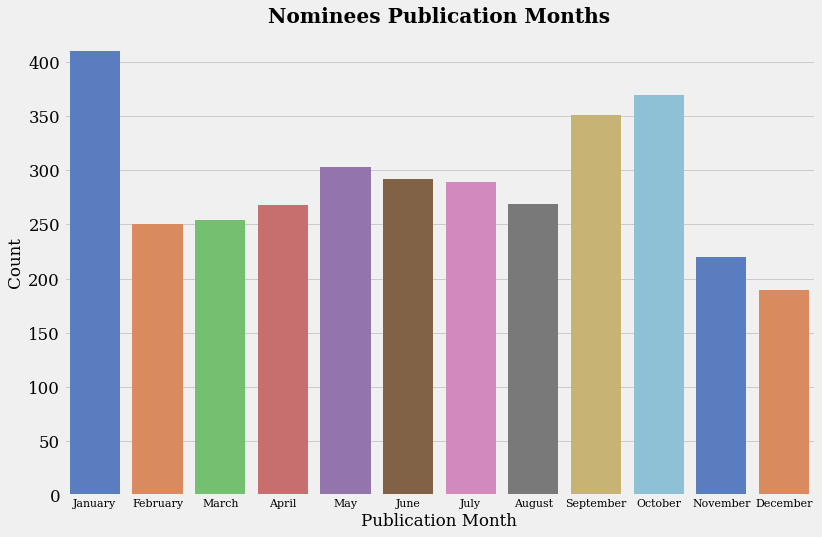

In [0]:
# nominees release month


fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'month',data = nom_awards,palette='muted')
ax.set_xticklabels(["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"], fontsize=11)
ax.set_title('Nominees Publication Months', weight='bold')
ax.set_xlabel('Publication Month')
ax.set_ylabel('Count');

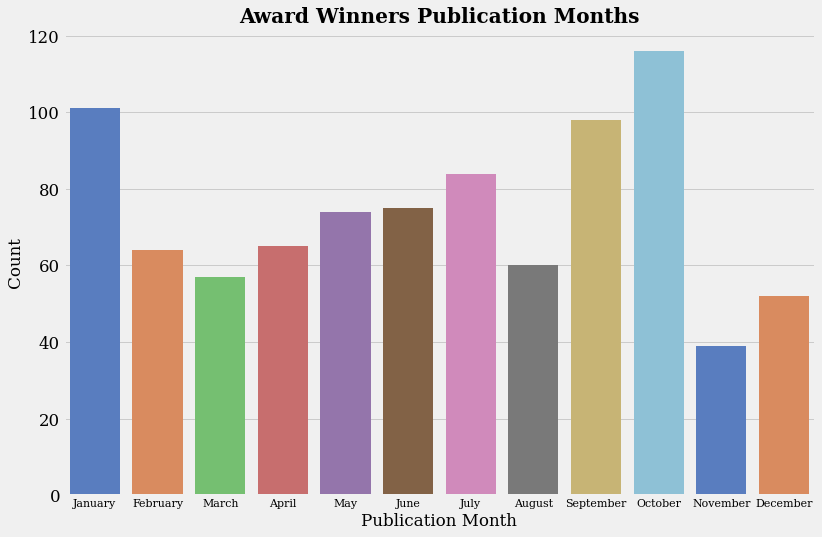

In [0]:
# winners publication month

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'month',data = nom_awards_winners,palette='muted')
ax.set_xticklabels(["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"], fontsize=11)
ax.set_title('Award Winners Publication Months', weight='bold')
ax.set_xlabel('Publication Month')
ax.set_ylabel('Count');

In [0]:
nom_awards.to_csv('awards_month.csv')

In [0]:
# nom_awards.month.count()

3464

# **Visualizations**

## Setup

In [0]:
# directory

from google.colab import drive
drive.mount('/content/drive')

#whatever folder you set to should have data/raw/ folders in it
%cd /content/drive/My\ Drive/Colab\ Notebooks/IST718/FinalProject/GoodReads/GoodReadsScraper3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/IST718/FinalProject/GoodReads/GoodReadsScraper3


In [0]:
# style settings
import pandas as pd
import numpy as np
import requests
import ast
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
import calendar
import plotly.graph_objs as go
import plotly.offline as offline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
import nltk
from nltk.corpus import stopwords


# Theme and styles for visuals
matplotlib.rcParams['font.family'] = "serif" # font
sns.set_context('talk') # visuals outputted for presentation style
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# use this to export visual so can edit in illustrator
# Remember: transparent=True
plt.savefig("output-bargraph.pdf", transparent=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<Figure size 432x288 with 0 Axes>

In [0]:
# # load data
# import pandas as pd
# # books_df=pd.read_csv('nominees_df2.csv')
# books_df=pd.read_csv('books_df.csv')
# books_df



,Unnamed: 0,bookID,bookTitle,authorName,description,asin,isbn,num_pages,format,languages,publisher,date_published,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,author_bio,goodreads_author,book_series
0,0,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,NaN,ebook,English,Fireside Fiction,February 2018,2018.0,3.84,237,58,30,"Julia Rios writes all sorts of things, and edi...",1,0
1,1,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",NaN,9781250169488,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,2018.0,3.91,3065,659,185,Brooke Bolander writes weird things of indeter...,1,0
2,2,36686547,The Tea Master and the Detective,Aliette de Bodard,"Welcome to the Scattered Pearls Belt, a collec...",NaN,9781596068643,96.0,Hardcover,English,Subterranean Press,March 31st 2018,2018.0,3.90,3435,609,1273,Aliette de Bodard lives and works in Paris. Sh...,1,1
3,3,33080122,The Calculating Stars,Mary Robinette Kowal,El futuro de la humanidad está en manos de un ...,NaN,NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,2018.0,4.02,16425,2874,3373,Mary Robinette Kowal was the 2008 recipient of...,1,1
4,4,35957452,Apex Magazine Issue 99,Jason Sizemore,"Apex Magazine is a monthly science fiction, fa...",B074D5TWNL,NaN,119.0,Kindle Edition,English,Apex Magazine,August 1st 2017,2017.0,4.11,925,192,83,I was born the son of an unemployed coal miner...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617,29519390,Brightside Crossing,Alan E. Nourse,Four men set out to prove their mettle by cros...,NaN,9781681465050,44.0,ebook,NaN,Start Publishing LLC,March 3rd 2016,2016.0,3.45,11,2,20,Alan Edward Nourse was an American science fic...,0,0
2618,2618,2935921,A Gun for Dinosaur,L. Sprague de Camp,[A Reginald Rivers story.] A time machine that...,NaN,NaN,319.0,Mass Market Paperback,English,Curtis Books,1969,1969.0,3.68,92,4,195,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",0,0
2619,2619,91109.The_Long_Tomorrow,The Long Tomorrow,Leigh Brackett,Two generations after destruction rained down ...,NaN,9780441061358,223.0,Mass Market Paperback,English,Ace Book,1962,1962.0,3.66,2017,218,157,"Leigh Brackett was born on December 7, 1915 in...",0,0
2620,2620,509784.The_End_of_Eternity,The End of Eternity,Isaac Asimov,"Andrew Harlan is an Eternal, a man whose job i...",NaN,9780449016190,192.0,Mass Market Paperback,English,Fawcett Crest,October 1st 1971,1971.0,4.24,41777,2167,18234,"Isaac Asimov was a Russian-born, American auth...",0,0


In [0]:
books_df

,Unnamed: 0,book_id,book_title,book_author,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count
0,0,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58
1,1,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",9781250169488,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,3.91,3060,656
2,2,36686547,The Tea Master and the Detective,Aliette de Bodard,"Welcome to the Scattered Pearls Belt, a collec...",9781596068643,96.0,Hardcover,English,Subterranean Press,March 31st 2018,3.90,3431,608
3,3,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871
4,4,35957452,Apex Magazine Issue 99,Jason Sizemore,"Apex Magazine is a monthly science fiction, fa...",NaN,119.0,Kindle Edition,English,Apex Magazine,August 1st 2017,4.11,925,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,29519390,Brightside Crossing,Alan E. Nourse,Four men set out to prove their mettle by cros...,9781681465050,44.0,ebook,NaN,Start Publishing LLC,March 3rd 2016,3.45,11,2
3586,3586,2935921,A Gun for Dinosaur,L. Sprague de Camp,[A Reginald Rivers story.] A time machine that...,NaN,319.0,Mass Market Paperback,English,Curtis Books,1969,3.68,92,4
3587,3587,91109.The_Long_Tomorrow,The Long Tomorrow,Leigh Brackett,Two generations after destruction rained down ...,9780441061358,223.0,Mass Market Paperback,English,Ace Book,1962,3.66,2015,218
3588,3588,509784.The_End_of_Eternity,The End of Eternity,Isaac Asimov,"Andrew Harlan is an Eternal, a man whose job i...",9780449016190,192.0,Mass Market Paperback,English,Fawcett Crest,October 1st 1971,4.24,41755,2165


In [0]:
# style settings for visuals
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.style as style
import pandas as pd
import numpy as np
import requests
import ast
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
import calendar
import plotly.graph_objs as go
import plotly.offline as offline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
import nltk
from nltk.corpus import stopwords

%matplotlib inline
# style.use('fivethirtyeight')
# Theme and styles for visuals
matplotlib.rcParams['font.family'] = "serif" # font
sns.set_context('talk') # visuals outputted for presentation style
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
books_df.columns

Index(['Unnamed: 0', 'bookID', 'bookTitle', 'authorName', 'description',
       'asin', 'isbn', 'num_pages', 'format', 'languages', 'publisher',
       'date_published', 'publication_year', 'average_rating', 'ratings_count',
       'text_reviews_count', 'author_followers', 'author_bio',
       'goodreads_author', 'book_series'],
      dtype='object')

## Ratings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

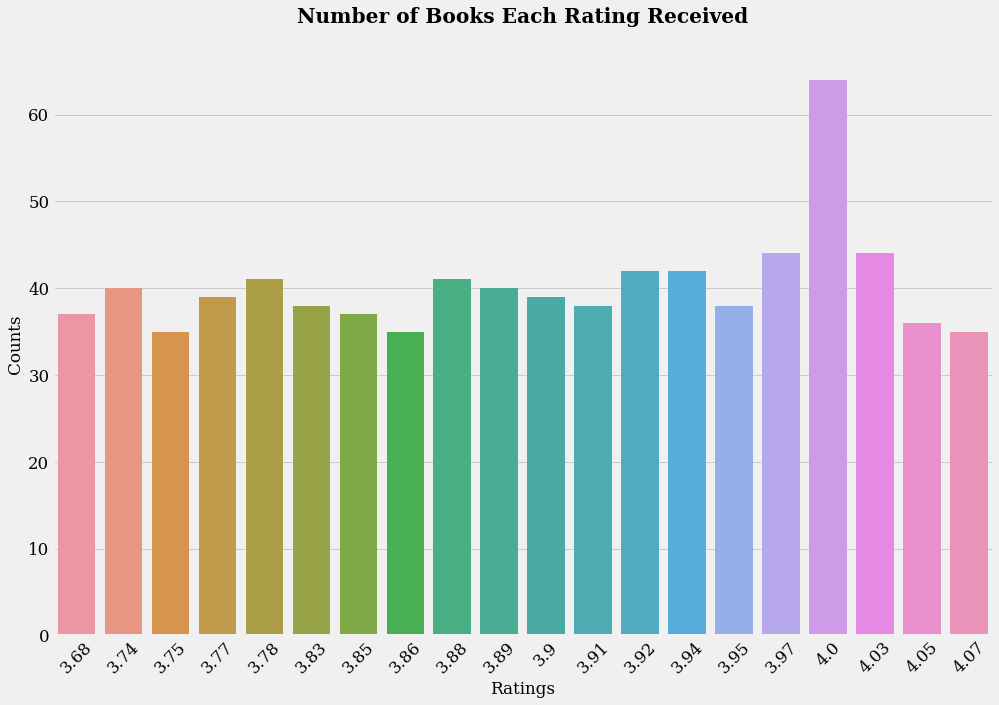

In [0]:
# number of books per rating
plt.figure(figsize=(15,10))
sns.barplot(books_df['average_rating'].value_counts().head(20).index, books_df['average_rating'].value_counts().head(20))
plt.title('Number of Books Each Rating Received\n', weight='bold')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

> ### Top 10 Most Rated Nominee Books



In [0]:
# top 10 mot rated books
most_rated = books_df.sort_values('ratings_count',ascending=False).head(10).set_index('bookTitle')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9)
ax.set_xlabel("Total Count of Ratings", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 Most Rated Nominee Books",fontsize=20,color='black', weight='bold')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#color=sns.color_palette('CMRmap',12)

NameError: ignored

[Text(24.200000000000003, 0.5, 'Ratings Count'),
 Text(0.5, 24.200000000000017, 'Book Title')]

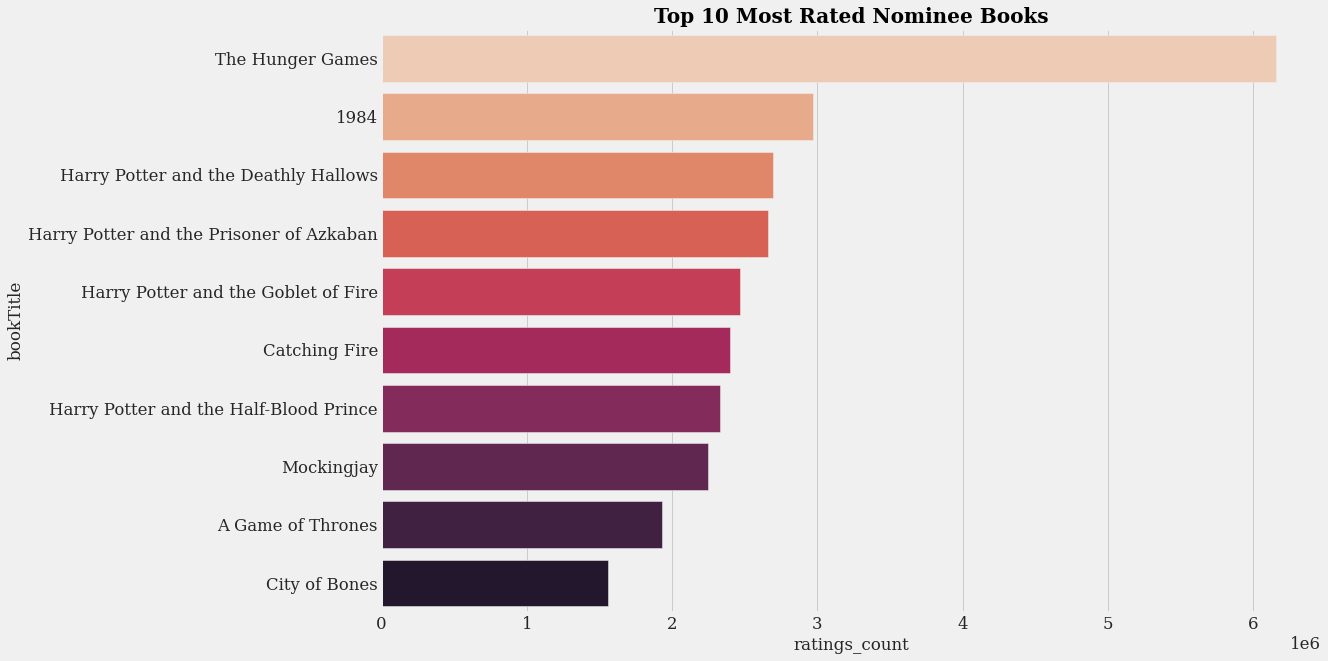

In [0]:
# top 10 mot rated books
most_rated = nom_stats_only.sort_values('ratings_count', ascending = False).head(10).set_index('bookTitle')
plt.figure(figsize=(15,10))
plt.title("Top 10 Most Rated Nominee Books",fontsize=20,color='black', weight='bold')
sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'rocket_r')
ax.set(xlabel="Book Title", ylabel="Ratings Count")
#, palette = 'rocket_r'

> ### Average Rating Distribution for Nominees



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



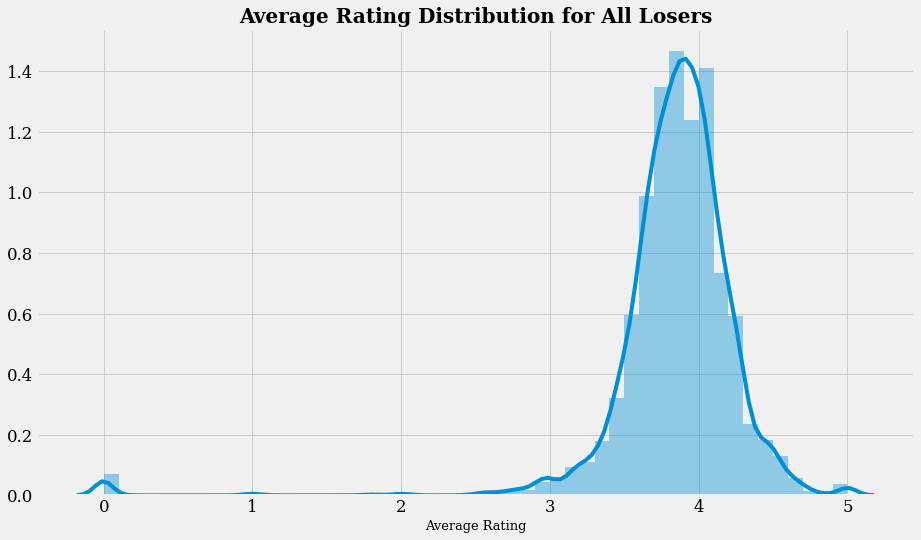

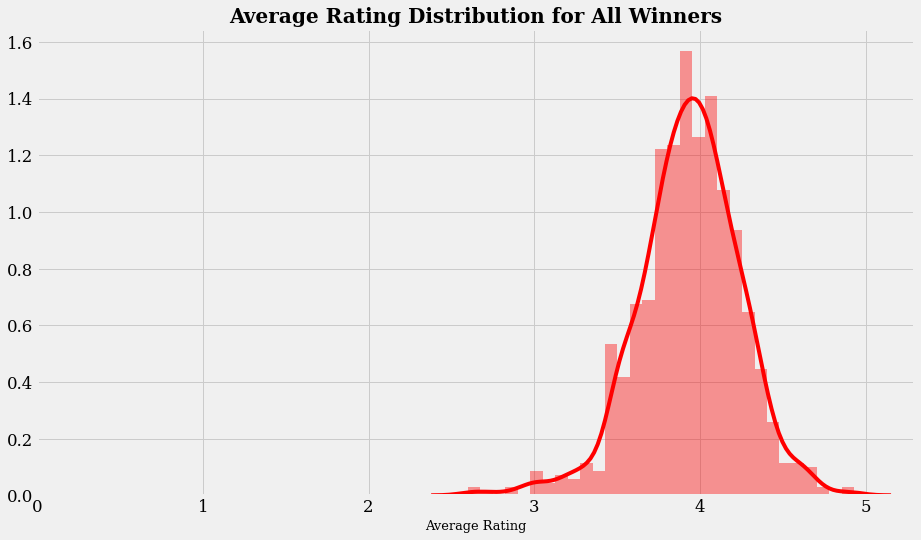

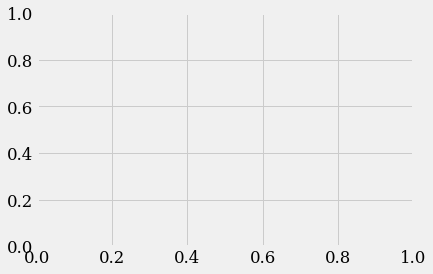

In [0]:
from matplotlib.ticker import MaxNLocator

dist1 = losers
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['average_rating'],ax=ax)
ax.set_title('Average Rating Distribution for All Losers',fontsize=20, weight='bold')
ax.set_xlabel('Average Rating',fontsize=13)


dist = winners
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
plot=sns.distplot(dist['average_rating'],ax=ax, color="r")
ax.set_title('Average Rating Distribution for All Winners',fontsize=20, weight='bold')
ax.set_xlabel('Average Rating',fontsize=13)

x_ax = plot.axes.get_xaxis()  ## Get X axis
x_ax.set_major_locator(MaxNLocator(integer=True)) 

plt.xticks([0, 1,2,3,4, 5])


# plt.setp(axes, yticks=[])
# plt.tight_layout()

# plt.savefig("output-bargraph.pdf", transparent=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/mydata


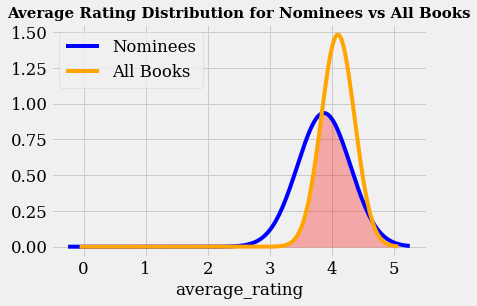

In [0]:
# density plot comparison 

import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

#load data
nom_awards=pd.read_csv('https://www.dropbox.com/s/1mll9m9r27wy5iz/nominees_stats_awards_all.csv?dl=1')

 # load big books
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/mydata

books=pd.read_csv('booksFPawardsReviewsFP.csv', engine='python', encoding='utf8')

# x1=losers['average_rating']
# x2=winners['average_rating']

x1=nom_awards['average_rating']
x2=books['average_rating']



ax = sns.distplot(x1, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="Nominees");
ax = sns.distplot(x2, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="All Books");

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1, y1 = l1.get_xydata().T
x2, y2 = l2.get_xydata().T

xmin = max(x1.min(), x2.min())
xmax = min(x1.max(), x2.max())
x = np.linspace(xmin, xmax, 100)
y1 = np.interp(x, x1, y1)
y2 = np.interp(x, x2, y2)
y = np.minimum(y1, y2)
ax.fill_between(x, y, color="red", alpha=0.3)

ax.set_title('Average Rating Distribution for Nominees vs All Books',fontsize=15, weight='bold')
# ax.set_xlabel('Average Rating',fontsize=13)
# plt.figure(figsize=(20,20))

plt.legend()
plt.show()

In [0]:
nom_awards.average_rating.nunique()

191

In [0]:
books.shape

(0, 47)

In [0]:
books

,Unnamed: 0,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,user_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,bookID,bookLink,bookTitle,authorName,award,Nominee,Nominee_Winner
0,0,1473212596,49,['841249'],US,eng,"[{'count': '1208', 'name': 'to-read'}, {'count...",NaN,False,3.99,NaN,[],The multi-award-winning author of The House of...,Hardcover,https://www.goodreads.com/book/show/27693272-t...,"[{'author_id': '2918731', 'role': ''}]",Gollancz,320.0,4.0,9781473212596,4.0,NaN,2017.0,https://www.goodreads.com/book/show/27693272-t...,https://images.gr-assets.com/books/1469032191m...,27693272,186,47690322,The House of Binding Thorns (Dominion of the F...,The House of Binding Thorns (Dominion of the F...,1c68a107ae3d8c15f0c480cd033708d9,491cc6354e913dcdf6f72c7886ffbeef,4,*copy from Netgalley in exchange for a review*...,Fri Mar 17 02:55:05 -0700 2017,Tue Mar 28 06:01:51 -0700 2017,Tue Mar 21 00:00:00 -0700 2017,Fri Mar 17 00:00:00 -0700 2017,0,0,27693272,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1,1
1,1,1473212596,49,['841249'],US,eng,"[{'count': '1208', 'name': 'to-read'}, {'count...",NaN,False,3.99,NaN,[],The multi-award-winning author of The House of...,Hardcover,https://www.goodreads.com/book/show/27693272-t...,"[{'author_id': '2918731', 'role': ''}]",Gollancz,320.0,4.0,9781473212596,4.0,NaN,2017.0,https://www.goodreads.com/book/show/27693272-t...,https://images.gr-assets.com/books/1469032191m...,27693272,186,47690322,The House of Binding Thorns (Dominion of the F...,The House of Binding Thorns (Dominion of the F...,69cc220927e1c636094abe9a17ccdeef,daea04cb730546c98ec53b3a8091d146,3,"So, this book is best understood after you hav...",Thu May 04 17:04:15 -0700 2017,Thu May 04 17:22:36 -0700 2017,Thu May 04 00:00:00 -0700 2017,NaN,2,0,27693272,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1,1
2,2,1473212596,49,['841249'],US,eng,"[{'count': '1208', 'name': 'to-read'}, {'count...",NaN,False,3.99,NaN,[],The multi-award-winning author of The House of...,Hardcover,https://www.goodreads.com/book/show/27693272-t...,"[{'author_id': '2918731', 'role': ''}]",Gollancz,320.0,4.0,9781473212596,4.0,NaN,2017.0,https://www.goodreads.com/book/show/27693272-t...,https://images.gr-assets.com/books/1469032191m...,27693272,186,47690322,The House of Binding Thorns (Dominion of the F...,The House of Binding Thorns (Dominion of the F...,fddf5238af00e642b981cda42d6a6cd1,909cd6abe3678a096c408b5b76d9b201,4,"Sequel to The House of Shattered Wings, with m...",Thu Jun 29 06:54:01 -0700 2017,Thu Jun 29 06:55:43 -0700 2017,Thu Jun 29 06:55:44 -0700 2017,Thu Jun 29 00:00:00 -0700 2017,0,0,27693272,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1,1
3,3,1473212596,49,['841249'],US,eng,"[{'count': '1208', 'name': 'to-read'}, {'count...",NaN,False,3.99,NaN,[],The multi-award-winning author of The House of...,Hardcover,https://www.goodreads.com/book/show/27693272-t...,"[{'author_id': '2918731', 'role': ''}]",Gollancz,320.0,4.0,9781473212596,4.0,NaN,2017.0,https://www.goodreads.com/book/show/27693272-t...,https://images.gr-assets.com/books/1469032191m...,27693272,186,47690322,The House of Binding Thorns (Dominion of the F...,The House of Binding Thorns (Dominion of the F...,d34a3defd573ffb16ab4d5f85f916519,18cd5734c3d159311337941cbdda7bc5,5,ARC provided by NetGalley in exchange for an h...

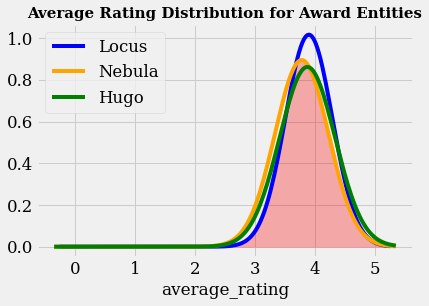

In [0]:
# density plot comparison 

import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


# x1=losers['average_rating']
# x2=winners['average_rating']

x1=locus['average_rating']
x2=nebula['average_rating']
x3=hugo['average_rating']



ax = sns.distplot(x1, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="Locus");
ax = sns.distplot(x2, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="Nebula");
ax = sns.distplot(x3, fit_kws={"color":"green"}, kde=False,
        fit=stats.norm, hist=None, label="Hugo");
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1, y1 = l1.get_xydata().T
x2, y2 = l2.get_xydata().T

xmin = max(x1.min(), x2.min())
xmax = min(x1.max(), x2.max())
x = np.linspace(xmin, xmax, 100)
y1 = np.interp(x, x1, y1)
y2 = np.interp(x, x2, y2)
y = np.minimum(y1, y2)
ax.fill_between(x, y, color="red", alpha=0.3)

ax.set_title('Average Rating Distribution for Award Entities',fontsize=15, weight='bold')
# ax.set_xlabel('Average Rating',fontsize=13)
# plt.figure(figsize=(20,20))

plt.legend()
plt.show()

In [0]:
books.shape

(320535, 47)

In [0]:
# density plot comparison ( booksdf vs nominee s)

import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


x1=losers['average_rating']
x2=winners['average_rating']



ax = sns.distplot(x1, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="Losers");
ax = sns.distplot(x2, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="Winners");

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1, y1 = l1.get_xydata().T
x2, y2 = l2.get_xydata().T

xmin = max(x1.min(), x2.min())
xmax = min(x1.max(), x2.max())
x = np.linspace(xmin, xmax, 100)
y1 = np.interp(x, x1, y1)
y2 = np.interp(x, x2, y2)
y = np.minimum(y1, y2)
ax.fill_between(x, y, color="red", alpha=0.3)

ax.set_title('Average Rating Distribution for Winners vs Losers',fontsize=15, weight='bold')
# ax.set_xlabel('Average Rating',fontsize=13)
# plt.figure(figsize=(20,20))

plt.legend()
plt.show()

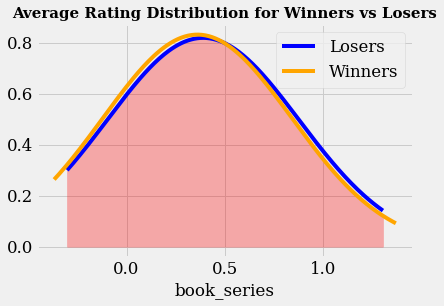

In [0]:
# text review counts
# density plot comparison 

import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


x1=losers['book_series']
x2=winners['book_series']



ax = sns.distplot(x1, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="Losers");
ax = sns.distplot(x2, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="Winners");

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1, y1 = l1.get_xydata().T
x2, y2 = l2.get_xydata().T

xmin = max(x1.min(), x2.min())
xmax = min(x1.max(), x2.max())
x = np.linspace(xmin, xmax, 100)
y1 = np.interp(x, x1, y1)
y2 = np.interp(x, x2, y2)
y = np.minimum(y1, y2)
ax.fill_between(x, y, color="red", alpha=0.3)

ax.set_title('Average Rating Distribution for Winners vs Losers',fontsize=15, weight='bold')
# ax.set_xlabel('Average Rating',fontsize=13)
# plt.figure(figsize=(20,20))

plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



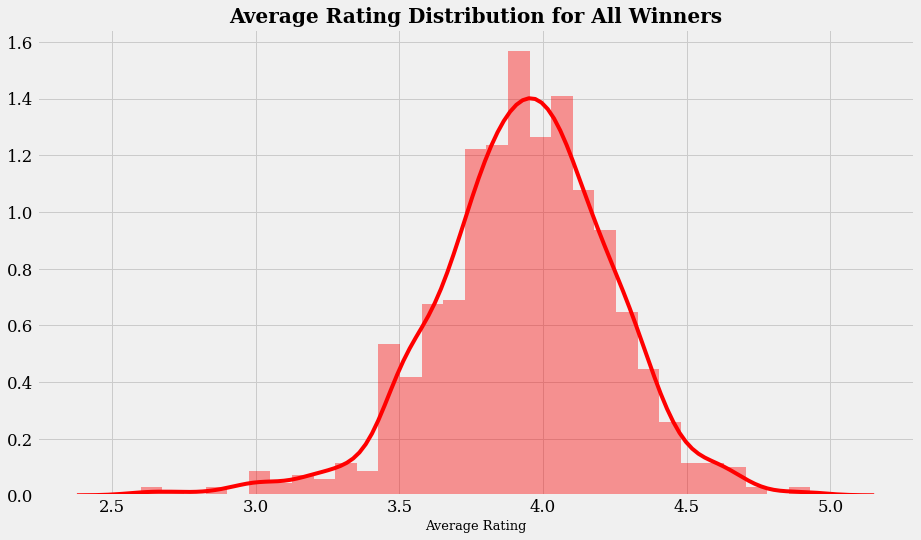

In [0]:

dist = winners
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
plot=sns.distplot(dist['average_rating'],ax=ax, color="r")
ax.set_title('Average Rating Distribution for All Winners',fontsize=20, weight='bold')
ax.set_xlabel('Average Rating',fontsize=13)

plt.savefig("output-bargraph2.pdf", transparent=True)

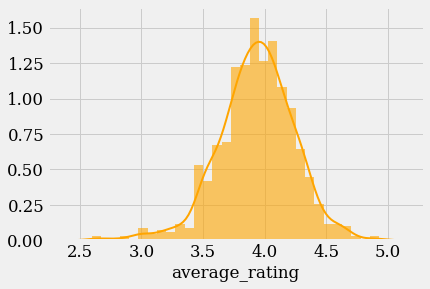

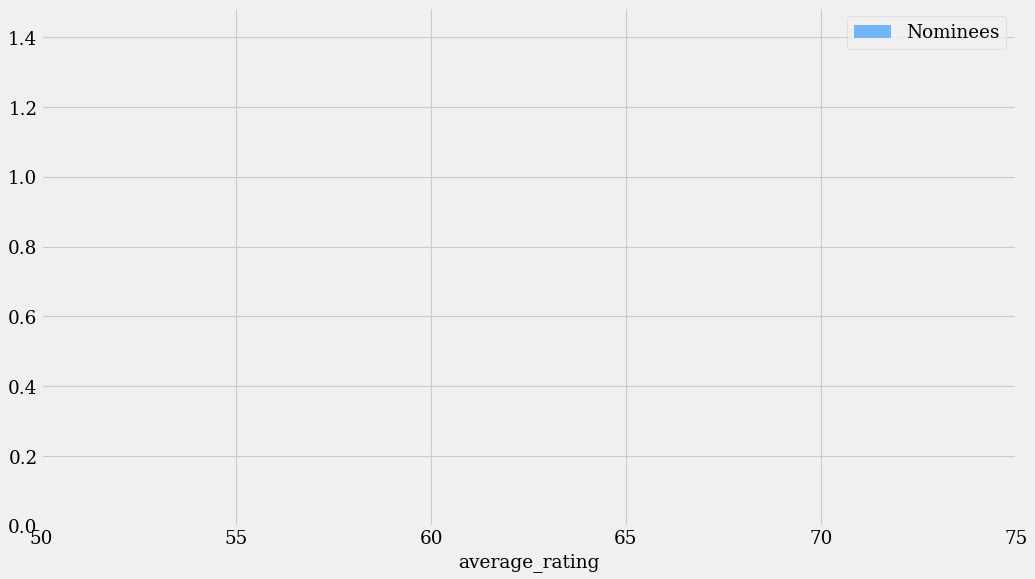

In [0]:
# both on same plot


# dist = nom_stats_only
# dist.average_rating = dist.average_rating.astype(float)
# fig, ax = plt.subplots(figsize=[14,8])
# sns.distplot(dist['average_rating'],ax=ax)
# ax.set_title('Average Rating Distribution for All Nominatees',fontsize=20, weight='bold')
# ax.set_xlabel('Average Rating',fontsize=13)

fig, ax = plt.subplots(1,1)
# dist = winners
# dist.average_rating = dist.average_rating.astype(float)
# fig, ax = plt.subplots(figsize=[14,8])
# plot=sns.distplot(dist['average_rating'],ax=ax, color="r")
# ax.set_title('Average Rating Distribution for All Winners',fontsize=20, weight='bold')
# ax.set_xlabel('Average Rating',fontsize=13)
x1=nom_stats_only['average_rating']
x2=winners['average_rating']


kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(14,8), dpi= 80)
sns.distplot(x1,color="dodgerblue", label="Nominees", **kwargs)
sns.distplot(x2,ax=ax, color="orange", label="Winners", **kwargs)
plt.xlim(50,75)
plt.legend();

In [0]:
x1

0       3.84
1       3.91
2       3.90
3       4.02
4       4.11
        ... 
2617    3.45
2618    3.68
2619    3.66
2620    4.24
2621    3.87
Name: average_rating, Length: 2622, dtype: float64

In [0]:
# df.groupby([df.ROI.str.split('_').str[0], 'Band']).Mean.plot.kde()
# plt.legend();

nom_awards.groupby([nom_awards.Winner.str.split('_').str[0], 'AwardEntity']).Mean.plot.kde()
plt.legend();

AttributeError: ignored

In [0]:
nom_awards.Winner=nom_awards.Winner.astype(str)

In [0]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

TypeError: ignored

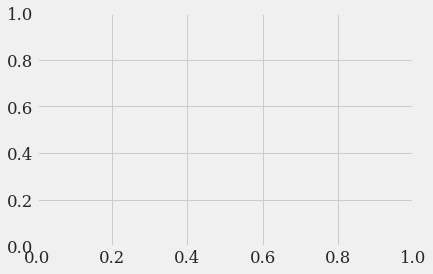

In [0]:
import random
import numpy
from matplotlib import pyplot

# x = [random.gauss(3,1) for _ in range(400)]
# y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

x=nom_awards[nom_awards['Winner']==1]
y=nom_awards[nom_awards['Winner']==0]

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

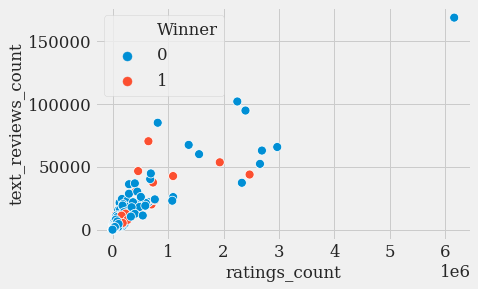

In [0]:
sns.scatterplot(x='ratings_count', y='text_reviews_count',
                hue='Winner', data=nom_awards)

ValueError: ignored

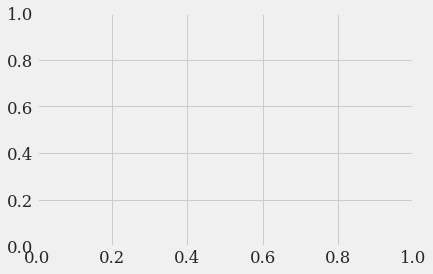

In [0]:
import seaborn as sns
plt.hist([x, y], color=['','b'], alpha=0.5)

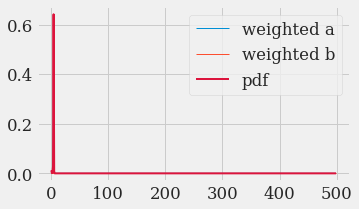

In [0]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import scipy.stats

a = nom_stats_only.average_rating
b = nom_stats_only.ratings_count

kdea = scipy.stats.gaussian_kde(a)
kdeb = scipy.stats.gaussian_kde(b)

grid = np.arange(500)


#weighted kde curves
wa = kdea(grid)*(len(a)/float(len(a)+len(b)))
wb = kdeb(grid)*(len(b)/float(len(a)+len(b)))

total = wa+wb

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(grid, wa, lw=1, label = "weighted a")
ax.plot(grid, wb, lw=1, label = "weighted b")
ax.plot(grid, total, color="crimson", lw=2, label = "pdf")

plt.legend()
plt.show()

## Reviews

> ### Top 10 Most Reviewed Nominee Books



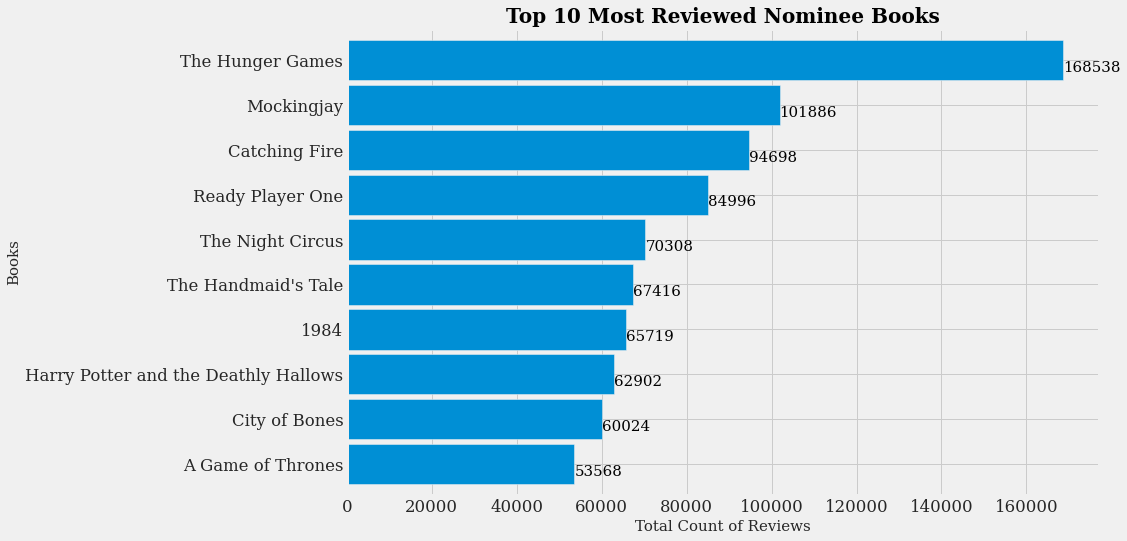

In [0]:
# top 10 most text reviews
most_text_reviews = nom_stats_only.sort_values('text_reviews_count',ascending=False).head(10).set_index('bookTitle')
plt.subplots(figsize=(12,8))
ax = most_text_reviews['text_reviews_count'].sort_values().plot.barh(width=0.9)
ax.set_xlabel("Total Count of Reviews", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 Most Reviewed Nominee Books",fontsize=20,color='black', weight='bold')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#, color= sns.color_palette('muted'), 12))

## Authors

> ### Top Nominee Authors




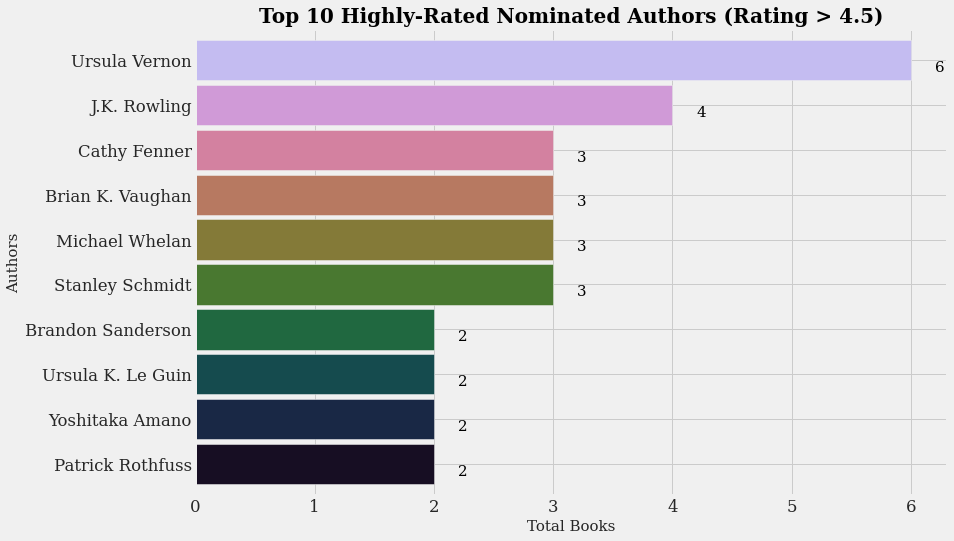

In [0]:
#top highly rated nominee authors
highly_rated_author =nom_stats_only[nom_stats_only['average_rating']>4.5] # threshold for high-rated
highly_rated_author = highly_rated_author.groupby('authorName')['bookTitle'].count().reset_index().sort_values('bookTitle',ascending=False).head(10).set_index('authorName')
plt.subplots(figsize=(12,8))
ax = highly_rated_author['bookTitle'].sort_values().plot.barh(width=0.9,color=sns.color_palette('cubehelix',12))
ax.set_xlabel("Total Books", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 Highly-Rated Nominated Authors (Rating > 4.5)",fontsize=20,color='black', weight='bold')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Text(0, 0.5, 'Authors')

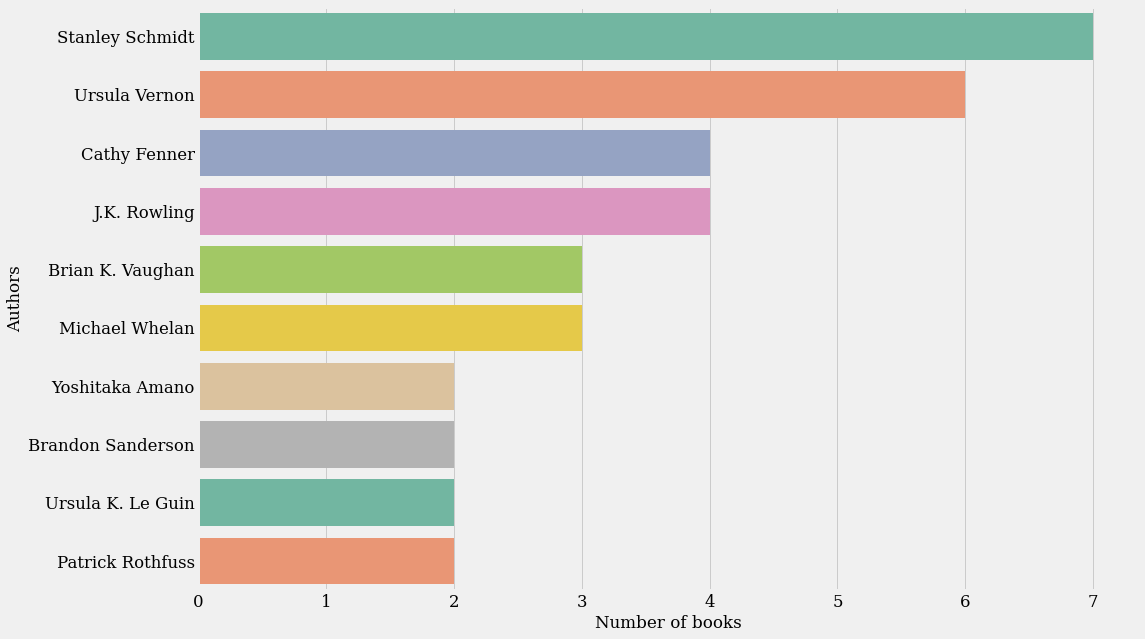

In [0]:
high_rated_author = books_df[books_df['average_rating']>=4.5]
high_rated_author = high_rated_author.groupby('authorName')['bookTitle'].count().reset_index().sort_values('bookTitle', ascending = False).head(10).set_index('authorName')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['bookTitle'], high_rated_author.index, palette = 'Set2')
ax.set_xlabel("Number of books")
ax.set_ylabel("Authors")

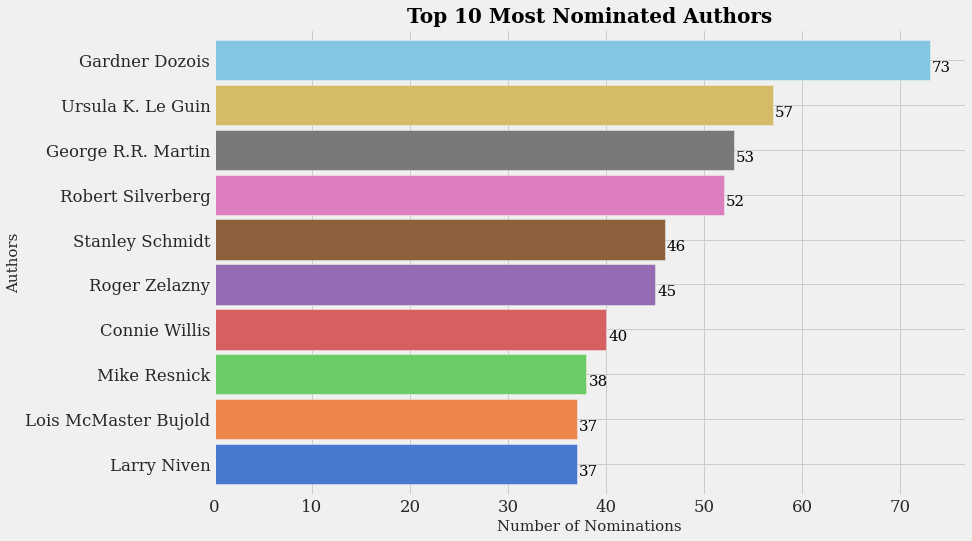

In [0]:
# top nominated authors by count
author_of_most_books = nom_awards.groupby('authorName')['bookTitle'].count().reset_index().sort_values('bookTitle',ascending=False).head(10).set_index('authorName')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['bookTitle'].sort_values().plot.barh(width=0.9, color=sns.color_palette('muted',12))
ax.set_xlabel("Number of Nominations", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 Most Nominated Authors",fontsize=20,color='black', weight='bold')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [0]:
author_of_most_books

,bookTitle
authorName,
Gardner Dozois,56
Ursula K. Le Guin,37
George R.R. Martin,36
Roger Zelazny,32
Robert Silverberg,31
Stanley Schmidt,29
Mike Resnick,25
Larry Niven,25
Stephen King,24


## Pages

### Most Pages Nominated Books

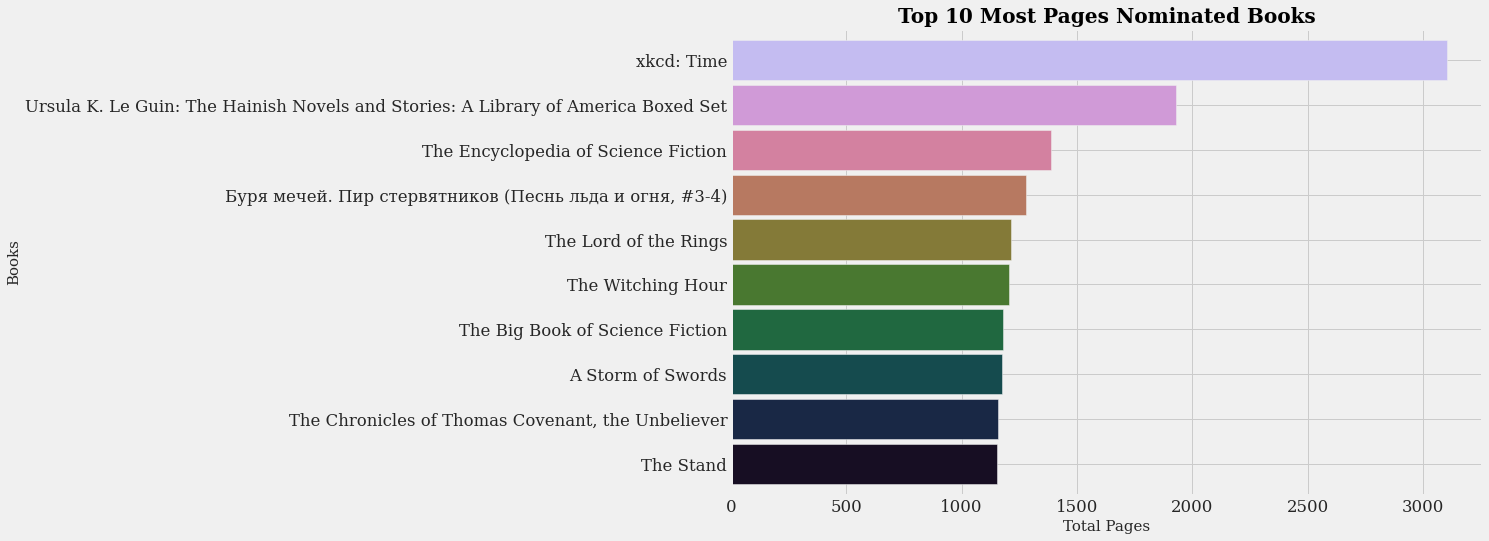

In [0]:

most_pages = nom_stats_only.sort_values('num_pages',ascending=False).head(10).set_index('bookTitle')
plt.subplots(figsize=(12,8))
ax = most_pages['num_pages'].sort_values().plot.barh(width=0.9,color=sns.color_palette('cubehelix',12)) #Spectral_r
ax.set_xlabel("Total Pages", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 Most Pages Nominated Books",fontsize=20,color='black', weight='bold')
totals = []
# for i in ax.patches:
#     totals.append(i.get_width())
# total = sum(totals)
# for i in ax.patches:
#     ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=20,color='black')
plt.show()

In [0]:

import plotly.express as px
fig = px.scatter(nomunique,x="average_rating", y="num_pages")
fig.show()

ValueError: ignored

In [0]:
nominees_stats_awards.columns

Index(['Unnamed: 0', 'bookID', 'asin', 'isbn', 'bookTitle', 'authorName',
       'bookLink', 'format', 'languages', 'date_published', 'publication_year',
       'publisher', 'description', 'author_bio', 'average_rating',
       'ratings_count', 'text_reviews_count', 'author_followers',
       'goodreads_author', 'book_series', 'award', 'Nominee', 'Winner',
       'AwardCategory', 'AwardEntity', 'HugoAward', 'LocusAward',
       'NebulaAward', 'BestNovel', 'BestNovelette', 'BestNovella',
       'BestShortStory', 'BestArtBook', 'BestNonFiction', 'BestCollection',
       'BestAnthology', 'BestNewWriter', 'BestYoungAdultBook',
       'BestGraphicStory', 'BestSpecialAward', 'BestSeries',
       'BestShortFiction', 'BestOther', 'gender'],
      dtype='object')

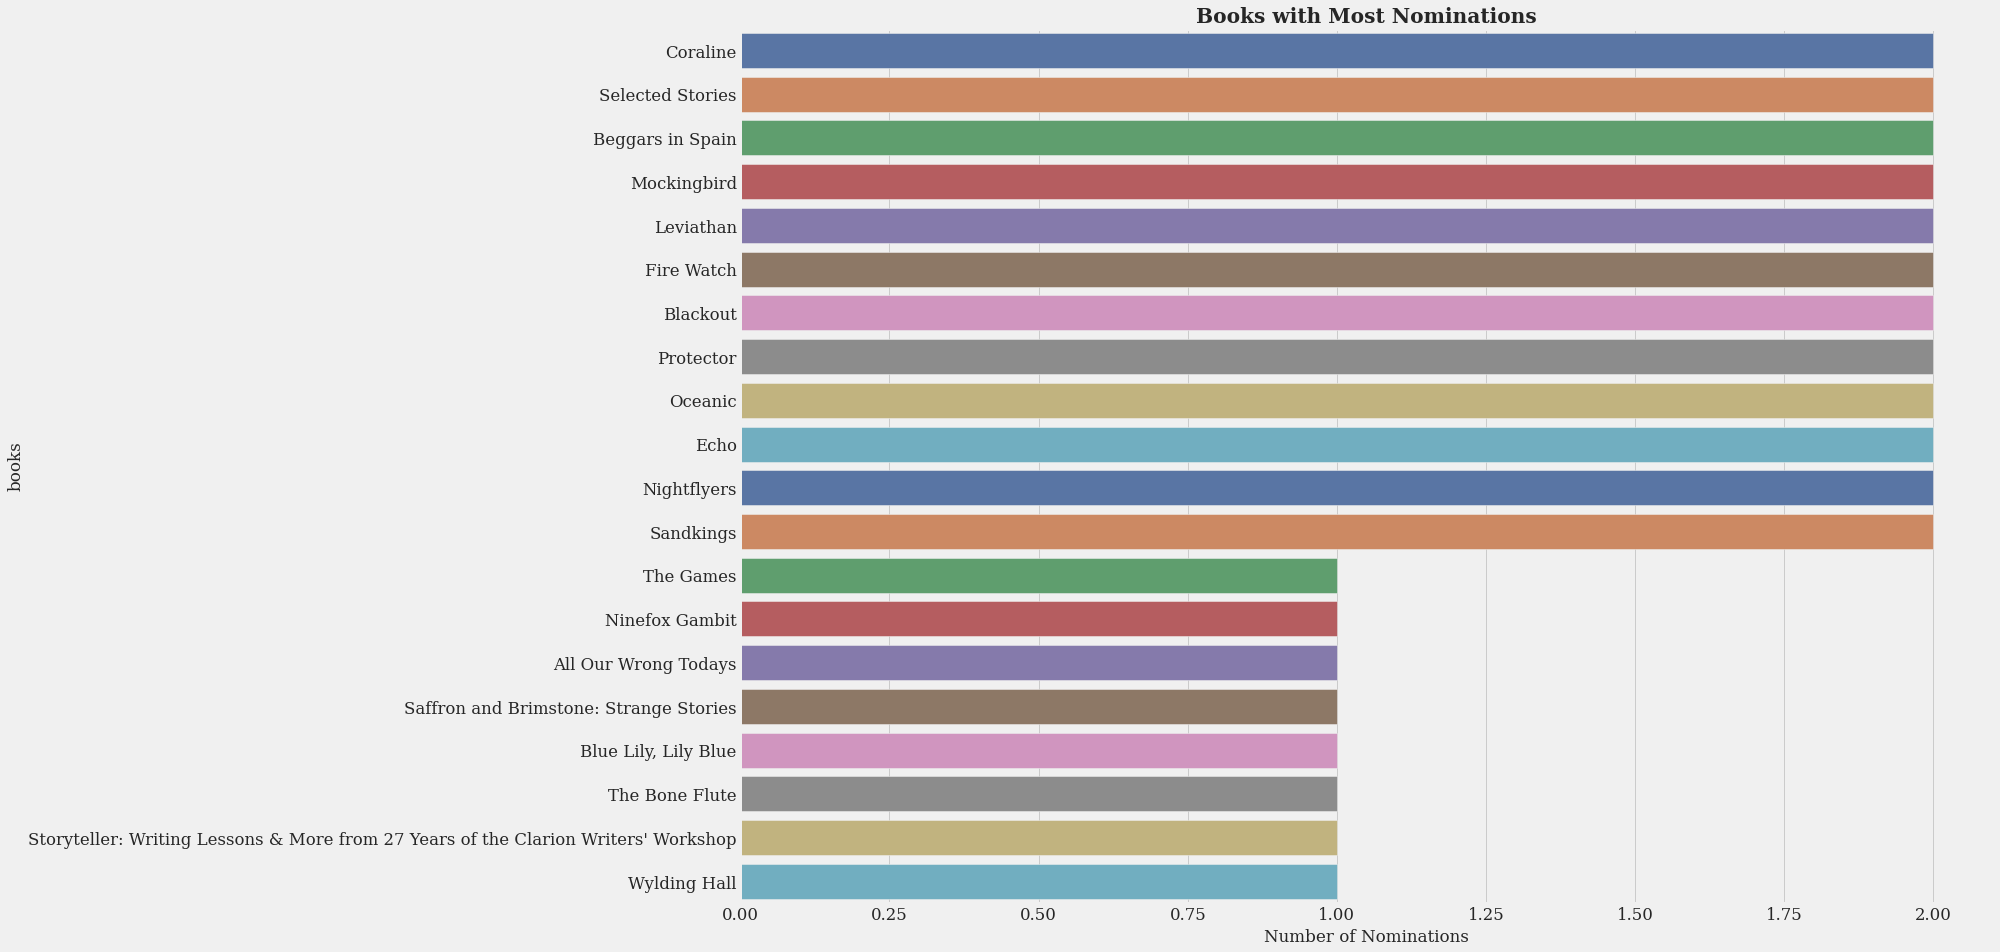

In [0]:
# sns.set_context('poster')
plt.figure(figsize = (20,15))
book = nom_stats_only['bookTitle'].value_counts()[:20]
# rating = nom_stats_only.average_rating[:20]
sns.barplot(x=book, y = book.index, palette = 'deep')
plt.title("Books with Most Nominations", weight='bold')
plt.xlabel("Number of Nominations")
plt.ylabel("books")
plt.show()

In [0]:
books_nlp=pd.read_csv('books_nlp.csv')
 
books_nlp['gender']=books_nlp['authorName'].apply(lambda i : 'female' if i in female_names else 'male')
books_nlp


FileNotFoundError: ignored

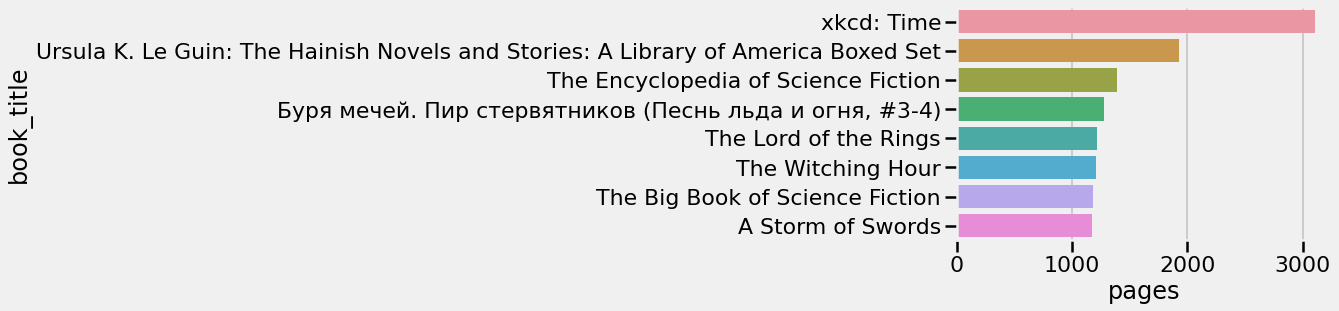

In [0]:
# top 10 longest books
longest_books = books_df.nlargest(10, ['pages']).set_index('book_title')
sns.barplot(longest_books['pages'], longest_books.index)

## Age

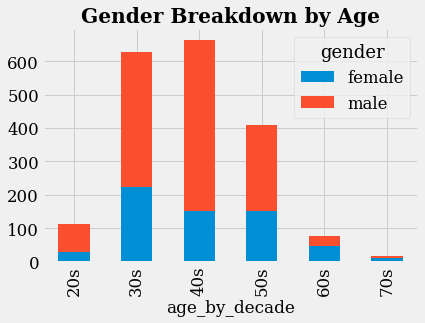

<Figure size 3600x1440 with 0 Axes>

In [0]:
#bin ages

nom_awards['age_by_decade'] = pd.cut(x=nom_awards['AgeNominated'], bins=[19,29,39,49,59,69,79], labels=['20s','30s','40s','50s','60s','70s'])
nom_awards.age_by_decade.head()

#bin author ages

nom_awards['age_by_decade'] = pd.cut(x=nom_awards['AgeNominated'], bins=[19,29,39,49,59,69,79], labels=['20s','30s','40s','50s','60s','70s'])
nom_awards.age_by_decade.head()

# age by decade and gender
nom_awards.groupby(['age_by_decade','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Gender Breakdown by Age", weight='bold')
plt.figure(figsize=(50,20))
plt.savefig("output-bargraph.pdf", transparent=True)
# here we can see that men are larger in every decade except the 70s where it is even

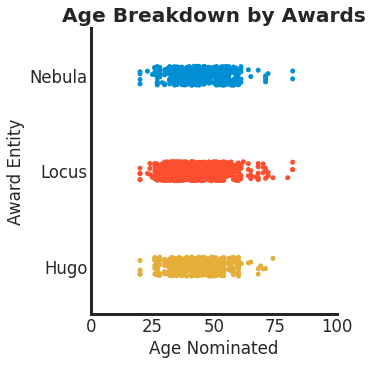

<Figure size 3600x1440 with 0 Axes>

In [0]:
sns.set_style("white")

g=sns.catplot(x="AgeNominated",y="AwardEntity",data=nom_awards)
g.set(xlim=(0,100))
g.set_axis_labels("Age Nominated", "Award Entity")
plt.title("Age Breakdown by Awards", weight='bold')
plt.figure(figsize=(50,20))
plt.show(g)


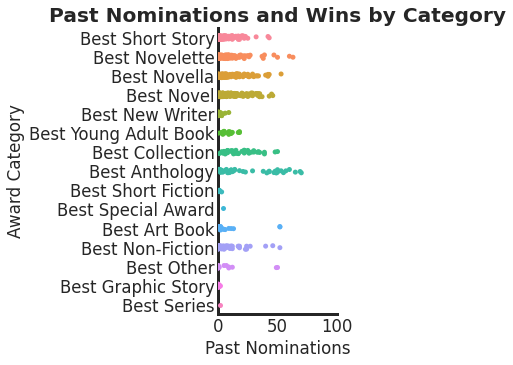

<Figure size 3600x1440 with 0 Axes>

In [0]:
sns.set_style("white")

g=sns.catplot(x="PastNominations",y="AwardCategory",data=winners)
g.set(xlim=(0,100))
g.set_axis_labels("Past Nominations", "Award Category")
plt.title("Past Nominations and Wins by Category", weight='bold')
plt.figure(figsize=(50,20))
plt.show(g)



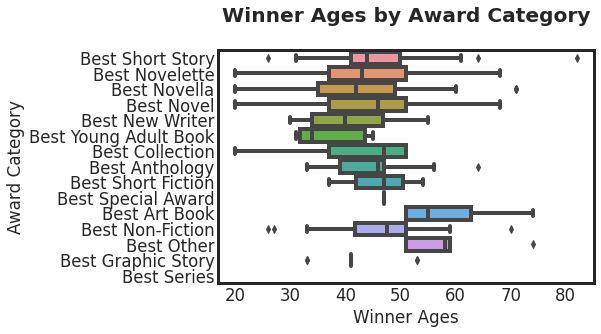

In [0]:
g = sns.boxplot(x="AgeNominated", y="AwardCategory", data=winners)
plt.title("Winner Ages by Award Category\n", weight='bold')
plt.ylabel("Award Category")
plt.xlabel('Winner Ages')
plt.savefig("output-bargraph.pdf", transparent=True)

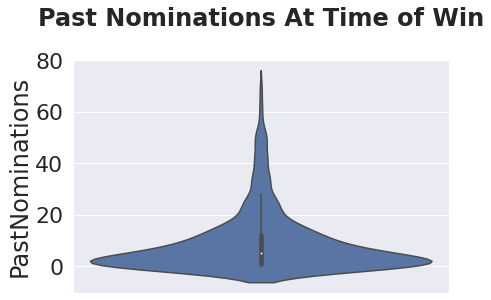

<Figure size 1440x1440 with 0 Axes>

In [0]:
# violin
sns.set_style("white")
# Theme and styles for visuals
matplotlib.rcParams['font.family'] = "serif" # font
sns.set_context('talk') # visuals outputted for presentation style
plt.style.use('ggplot')
sns.set(font_scale = 2)
b = sns.violinplot(y = "PastNominations", data = winners)
plt.title("Past Nominations At Time of Win\n", weight='bold')
plt.figure(figsize=(20,20))
plt.savefig("output-bargraph.pdf", transparent=True)
plt.show()

## Country and Location

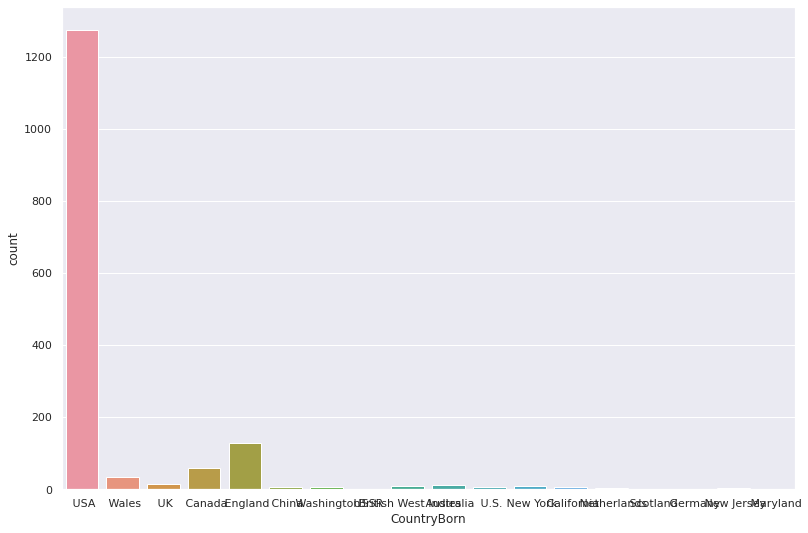

In [0]:
# country from
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="CountryBorn", data=nom_awards)

In [0]:
# countries authors from
nom_awards.CountryBorn.value_counts()

 USA                    1274
 England                 128
 Canada                   60
 Wales                    34
 UK                       14
 Australia                12
 British West Indies      10
 New York                  8
 Washington                6
 China                     5
 U.S.                      5
 California                5
 New Jersey                4
 Netherlands               3
 Germany                   2
 USSR                      1
 Scotland                  1
 Maryland                  1
Name: CountryBorn, dtype: int64

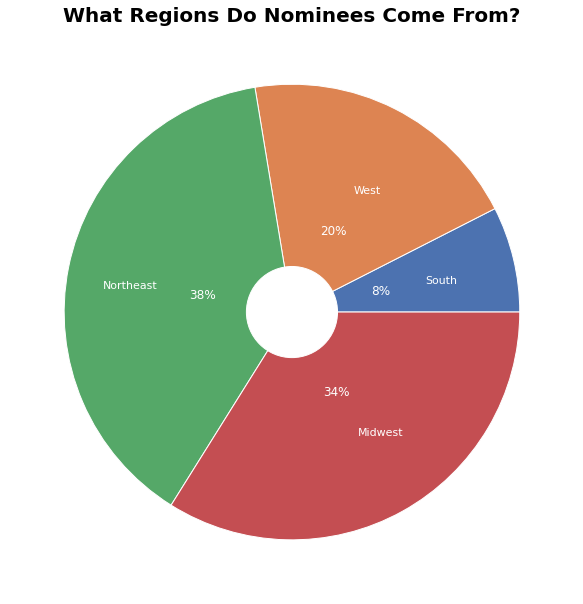

In [0]:
# victim descent donut chart for LA population in general, percentages are in the size variable 

# library
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
names='South', 'West', 'Northeast', 'Midwest'
size=[7.5, 20.1, 38.5, 33.9]
 
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('white')
 
# Change color of text
plt.rcParams['text.color'] = 'black'
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.2, color='white')
 
# Pieplot + circle on it
plt.pie(size, labels=names, autopct='%1.0f%%', pctdistance=.4, labeldistance=0.6, textprops={'color':"w"})
p=plt.gcf()

p.gca().add_artist(my_circle) 
plt.tight_layout()
plt.title('What Regions Do Nominees Come From?', weight='bold', y=-0.01, fontsize=20)

plt.savefig("output-bargraph2.pdf", transparent=True)

In [0]:
pd.set_option('display.max_rows', 500)
nom_awards.StateBorn.value_counts()

New York                  340
California                178
Ohio                      172
Illinois                   80
New Jersey                 47
Massachusetts              47
Iowa                       43
Texas                      41
Pennsylvania               40
Glamorgan                  34
Washington                 32
Ontario                    32
Norfolk                    31
Lancashire                 29
Michigan                   27
Wisconsin                  27
North Carolina             26
Indiana                    24
Missouri                   23
Colorado                   23
Minnesota                  20
USA                        20
South Carolina             20
Florida                    19
Kentucky                   18
Oregon                     17
Somerset                   17
Alberta                    16
Nebraska                   15
England                    15
Maryland                   14
IL                         13
Mississippi                11
Jamaica   

# Scattertext

In [0]:
SOURCES: https://github.com/JasonKessler/scattertext
https://kanoki.org/2019/03/17/text-data-visualization-in-python/

# all three files will be output as html files in files in google colab. Open html file in browser and will take several minuts to open and load. The file used is booksnlp.csv which is located from the Obtain section of document

%matplotlib inline
!pip install scattertext
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

#preprocess
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))
# spaccy language model
import spacy
nlp = spacy.load('en')
# sparse
books_nlp['parsed'] = books_nlp['description'].apply(nlp)
# convert to corpus
corpus = st.CorpusFromParsedDocuments(books_nlp, category_col='AwardCategory', parsed_col='parsed').build()



# visualize chart, file called bestnovel_awardentity.html
html = produce_scattertext_explorer(corpus,
                                    category='Best Novel',
                                    category_name='Best Novel',
                                    not_category_name='Other Categories',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=books_nlp['AwardEntity'])
file_name = 'bestnovel_awardentity.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)


# visualize with ranking, file called bestnovel_award_entity_rank.html
html = produce_scattertext_explorer(corpus,
                                    category='Best Novel',
                                    category_name='Best Novel' ,
                                    not_category_name='Other Categories',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=books_nlp['AwardEntity'])
file_name = 'bestnovel_award_entity_rank.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

# cohen D method, file is called freq_explorer_bestnovel.html
html = st.produce_frequency_explorer(
    corpus,
    category='Best Novel',
    category_name='Best Novel',
    not_category_name='Other Categories',
    term_scorer=st.CohensD(corpus),
    metadata=books_nlp['AwardEntity'],
    grey_threshold=0)
file_name = 'freq_explorer_bestnovels.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/base.py:599: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


# Sentiment Analysis

In [0]:
# sentiment analysis on description field
import nltk
nltk.downloader.download('vader_lexicon')
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


def get_sentiment(row, **kwargs):
  sentiment_score = sid.polarity_scores(str(row)) 
  positive_meter = round((sentiment_score['pos'] * 10), 2)
  negative_meter = round((sentiment_score['neg'] * 10), 2)
  return positive_meter if kwargs['k'] == 'positive' else negative_meter



nom_awards['positive'] = nom_awards.description.apply(get_sentiment, k='positive')
nom_awards['negative'] = nom_awards.description.apply(get_sentiment, k='negative')
nom_awards



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,PastNominations,born,occupation,nationality,BirthYear,StateBorn,AgeNominated,CountryBorn,USA_Region,Northeast,West,South,Midwest,female,male,positive,negative
0,0,4,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0,1,0,0.00,0.00
1,1,9,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0,1,0,0.00,0.00
2,2,14,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"May 28, 1978",NaN,NaN,1978.0,NaN,41.0,NaN,NaN,0,0,0,0,1,0,0.00,0.00
3,3,15,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0.59,2.79
4,4,16,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0.59,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,3578,33168,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,44.0,NaN,March 3rd 2016,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,male,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"August 11, 1928Des Moines, Iowa, USA","Novelist, physician",American,1928.0,Iowa,28.0,USA,Midwest,0,0,0,1,0,1,1.89,0.33
3579,3579,33171,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/

# **Awards**

## Awards Cleaned up for Analysis/Modelling (this is how original awardscombo.csv was cleaned up for nom_awards)

In [0]:
# load awards
# awards cleanup for models

import pandas as pd
import numpy as np

# load awards dropbox
awards=pd.read_csv('https://www.dropbox.com/s/95h72pt7biiecgb/combo-awards2.csv?dl=1')
# add column for nominee and winner
awards['Winner'] = np.where(awards.Nominee.eq(0), 1, 0)
awards['Nominated']=np.where(awards.Nominee.eq(0), 1, 1)
#del awards['NomineeWinner']
# extract year for new Year column
# awards['Year'] = awards['award'].str.extract('(\d*\.?\d+)', expand=True)
awards['Year'] = awards['award'].str.extract('\((\d+)\)', expand=True)
#awards['Year']=pd.to_numeric(awards['Year'], errors="coerce") #missing values for 2 in year
#awards['Year']=awards['Year'].astype(int)
# extract award category for new Award Category column
# gets category
awards['AwardCategory']=awards['award'].str.split('for').str[1]
# removes year
# awards['AwardCategory']=awards['AwardCategory'].str.replace('((\d+)', '')
awards['AwardCategory']=awards['AwardCategory'].str.replace('\d+', '')
# get rid of special characters
awards['AwardCategory']=awards['AwardCategory'].str.replace(r"\(.*\)","")
# get rid of Best word
awards['AwardCategory']=awards['AwardCategory'].str.replace('Best', '')
# get rid of trailing and leading spaces
awards['AwardCategory'] = awards['AwardCategory'].str.strip()
# add AwardEntity columnn for different award shows
awards['AwardEntity']=awards['award'].str.split().str.get(0)
awards.head(200)
awards['award'] = awards['award'].astype(str)

# vectorize award types and condense
Best_Novel=['Science Fiction', 'Novel', 'novel', 'All-Time  SF Novel', 'Horror Novel', 'Fantasy Novel', 'Science Fiction Novel', 'SF Novel', 'Dark Fantasy/Horror Novel', 'Horror/Dark Fantasy Novel', 'All-Time  Novel', 'First Novel and  SF Novel', 'First Novel and  Fantasy Novel', 'Fantasy Novel and  First Novel', 'SF Novel and  First Novel', 'Fantasy', 'Horror / Dark Fantasy Novel', 'Fantasy Novel  and  All-Time Fantasy Novel be', 'All-Time  SF Novel be', 'Fantasy Book', 'Novella and  SF Novel', 'First Novel and  Horror Novel', 'All-Time  SF Novel', 'All-Time  Science Fiction Novel', 'Fantasy Novel  and Nominee', 'novel']
Best_Novelette=['Anthology,  Novelette', 'Novelette', 'Novellette', 'Novella,  Novelette and  Short Story', 'Anthology, Novelette', 'Collection and  Novelette', 'Collection, Novelette', 'Anthology, Novelette', 'Anthology and  Novelette', 'Novella/Novelette']
Best_Novella=['Novella finalist', 'Novella', 'Novella,  Novelette and  Short Story', 'Collection and  Novella', 'Collection  and  Novella', 'Bet Novella', 'Anthology and  Novella', 'Novella/Novelette', 'Novella and  SF Novel', 'Single Author Collection and  Novella', 'Novella Finalist']
Best_Short_Story=['Short story', 'Short Story', 'Novella,  Novelette and  Short Story', 'Collection and  Short Story', 'Anthology and  Short Story', 'Collection  and  Short Story', 'Anthology and   Short Story']
Best_Art_Book=['Art Book', 'Non-Fiction/Art', 'Art of Illustrated Book', 'Art or Illustrated Book']
Best_Non_Fiction=['Non-Fiction', 'Nonfiction', 'Non-Fiction/Art Book', 'Non-Fiction/ Art Book', 'Related Non-fiction', 'Non-Fiction/Art',  'Non-Fiction/Reference', 'Reference Book', 'Non-Fiction Book', 'Nonfiction Book', 'Related Non-Fiction Book']
Best_Collection=['Collection, Nominee', 'Collection', 'Collection and  Novelette', 'Collection and', 'Collection and  Novella', 'Collection and  Short Story', 'Collection  and  Novella', 'Single Author Collection', 'Author Collection', 'Collection, Novelette', 'Collection  and  Short Story', 'Single Author Collection and  Novella', 'Reprint Anthology/Collection', 'Anthology/Collection']
Best_Anthology=['Anthology', 'Anthology,  Novelette', 'Anthology, Novelette', 'Anthology and', 'Anthology and Nominee', 'Reprint Anthology', 'Original Anthology', 'Original Anthology & Nominee', 'Anthology, Novelette', 'Anthology and  Short Story', 'Anthology and  Novelette', 'Anthology and  Novella', 'Anthology and   Short Story', 'Anthology - nd place', 'Reprint Anthology/Collection', 'Anthology/Collection']
Best_New_Writer=['First Novel', 'First Novel and Nominee', 'First Book', 'First Novel and  SF Novel', 'First Novel and  Fantasy Novel', 'Fantasy Novel and  First Novel', 'SF Novel and  First Novel', 'first novel', 'First Novel and  Horror Novel']
Best_Young_Adult_Book=['Young Adult Book', 'Young Adult Novel', 'Young Adult Science Fiction and Fantasy']
Best_Graphic_Story=['Graphic Story', 'Graphic Novel Finalst']
Best_Special=['Special Award']
Best_Series=['All-Time Series']
Best_Short_Fiction=['best short fiction', 'Short Fiction']
Best_Other=['Associational Item', 'Related Work', 'Related Book', 'Other Forms', '']

# clean up AwardCategory
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Novel' if i in Best_Novel else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Novelette' if i in Best_Novelette else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Novella' if i in Best_Novella else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Short Story' if i in Best_Short_Story else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Art Book' if i in Best_Art_Book else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Non-Fiction' if i in Best_Non_Fiction else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Collection' if i in Best_Collection else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Anthology' if i in Best_Anthology else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best New Writer' if i in Best_New_Writer else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Young Adult Book' if i in Best_Young_Adult_Book else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Graphic Story' if i in Best_Graphic_Story else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Special Award' if i in Best_Special else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Series' if i in Best_Series else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Short Fiction' if i in Best_Short_Fiction else i)
awards['AwardCategory'] = awards['AwardCategory'].apply(lambda i : 'Best Other' if i in Best_Other else i)


#getting dummy variables for Award Entities
dummies2 = pd.get_dummies(awards['AwardEntity']).rename(columns=lambda x: str(x) + 'Award')
awards = pd.concat([awards, dummies2], axis=1)

#dummy variables for award categories, replacing award categories to 1 or 0 in its category, 1 is nominee in that category, 0 is not
awards['BestNovel'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Novel else 0)
awards['BestNovelette'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Novelette else 0)
awards['BestNovella'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Novella else 0)
awards['BestShortStory'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Short_Story else 0)
awards['BestArtBook'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Art_Book else 0)
awards['BestNonFiction'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Non_Fiction else 0)
awards['BestCollection'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Collection else 0)
awards['BestAnthology'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Anthology else 0)
awards['BestNewWriter'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_New_Writer else 0)
awards['BestYoungAdultBook'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Young_Adult_Book else 0)
awards['BestGraphicStory'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Graphic_Story else 0)
awards['BestSpecialAward'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Special else 0)
awards['BestSeries'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Series else 0)
awards['BestShortFiction'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Short_Fiction else 0)
awards['BestOther'] = awards['AwardCategory'].apply(lambda i : 1 if i in Best_Other else 0)
awards.drop('Nominee', axis=1, inplace=True)
awards['Nominee']=awards['Nominated']
awards.drop('Nominated', axis=1, inplace=True)
#reorder nominee column
col = awards.pop("Nominee")
awards.insert(6, col.name, col)
!pip install gender_guesser
import gender_guesser.detector as gender
d = gender.Detector()
first_names = []
for i in range(0,3590):
    name = str(awards['authorName'].values[i]).split(' ', 1)[0]
    first_names.append(name)
# lowercase everything
first_names = [k.lower() for k in first_names]
# capitalize the first letter of every name
first_names = [i.capitalize() for i in first_names]
#%%time
# add genders
genders = []
for i in first_names[0:len(first_names)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')

gender_series = pd.Series(genders)
gender_series.value_counts()

# assign gender column to dataframe
awards['gender'] = gender_series

del awards['Unnamed: 0']
awards.to_csv('awards_cleaned.csv')
awards.reset_index()
#awards.dropna()
awards


,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Nebula Award for Best Novelette (2018),1,1,2018,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,36686547,/book/show/36686547-the-tea-master-and-the-det...,The Tea Master and the Detective,Aliette de Bodard,Nebula Award for Novella (2018),1,1,2018,Best Novella,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Nebula Award for Best Novel (2018),1,1,2018,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
4,35957452,/book/show/35957452-apex-magazine-issue-99,Apex Magazine Issue 99,Jason Sizemore,"Nebula Award for Best Short Story for ""Welcome...",1,1,2017,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,29519390,/book/show/29519390-brightside-crossing,Brightside Crossing,Alan E. Nourse,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3586,2935921,/book/show/2935921-a-gun-for-dinosaur,A Gun for Dinosaur,L. Sprague de Camp,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3587,91109,/book/show/91109.The_Long_Tomorrow,The Long Tomorrow,Leigh Brackett,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3588,509784,/book/show/509784.The_End_of_Eternity,The End of Eternity,Isaac Asimov,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male


In [0]:
awards2=pd.read_csv('https://www.dropbox.com/s/oywdtjtpsjge8g2/combo-awards.csv?dl=1')
awards2['Nominee'].value_counts()

1    2680
0     910
Name: Nominee, dtype: int64

In [0]:
awards.Year.unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1995', '1996',
       '1994', '1993', '1992', '1991', '1990', '1989', '17', '1988',
       '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972',
       '1971', '1970', '1969', '1968', '1967', '1966', '1965', nan,
       '2019', '38', '5', '547', '2', '36', '1946', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1956', '1955', '1953',
       '2020'], dtype=object)

In [0]:
awards2=awards.drop_duplicates(subset=['bookID'], keep=False)

In [0]:
awards2

,Unnamed: 0,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
9,0,36145729,/book/show/36145729-a-lone-star-in-the-sky,A Lone Star in the Sky (A Future Classics Anth...,William Ledbetter,"Nebula Award for Best Novelette for ""The Long ...",1,1,2016,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
12,0,25382762,/book/show/25382762-asimov-s-science-fiction-j...,"Asimov's Science Fiction, June 2015",Sheila Williams,"Nebula Award for Best Novelette for ""Our Lady ...",1,1,2015,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
13,0,26849365,/book/show/26849365-nightmare-magazine-37,Nightmare Magazine 37: October 2015. Queers De...,Wendy N. Wagner,"Nebula Award for Best Short Story for ""Hungry ...",1,1,2015,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
16,0,35058181,/book/show/35058181-jackalope-wives-and-other-...,Jackalope Wives and Other Stories,T. Kingfisher,"Nebula Award for Best Short Story for ""Jackalo...",1,1,2014,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
18,0,25334736,/book/show/25334736-a-guide-to-the-fruits-of-h...,A Guide to the Fruits of Hawai'i,Alaya Dawn Johnson,Nebula Award for Best Novelette (2014),1,1,2014,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0,29519390,/book/show/29519390-brightside-crossing,Brightside Crossing,Alan E. Nourse,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3586,0,2935921,/book/show/2935921-a-gun-for-dinosaur,A Gun for Dinosaur,L. Sprague de Camp,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3587,0,91109,/book/show/91109.The_Long_Tomorrow,The Long Tomorrow,Leigh Brackett,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3588,0,509784,/book/show/509784.The_End_of_Eternity,The End of Eternity,Isaac Asimov,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male


In [0]:
# drop duplicates
awards=awards.drop_duplicates(subset=['bookID', 'AwardEntity', 'AwardCategory'], keep=False)

In [0]:
awards

,Unnamed: 0,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,0,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Nebula Award for Best Novelette (2018),1,1,2018,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,0,36686547,/book/show/36686547-the-tea-master-and-the-det...,The Tea Master and the Detective,Aliette de Bodard,Nebula Award for Novella (2018),1,1,2018,Best Novella,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Nebula Award for Best Novel (2018),1,1,2018,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
4,0,35957452,/book/show/35957452-apex-magazine-issue-99,Apex Magazine Issue 99,Jason Sizemore,"Nebula Award for Best Short Story for ""Welcome...",1,1,2017,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0,29519390,/book/show/29519390-brightside-crossing,Brightside Crossing,Alan E. Nourse,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3586,0,2935921,/book/show/2935921-a-gun-for-dinosaur,A Gun for Dinosaur,L. Sprague de Camp,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3587,0,91109,/book/show/91109.The_Long_Tomorrow,The Long Tomorrow,Leigh Brackett,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3588,0,509784,/book/show/509784.The_End_of_Eternity,The End of Eternity,Isaac Asimov,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male


In [0]:
# df.groupby(['col5','col2']).size().reset_index().groupby('col2')[[0]].max()
# awards.groupby(['bookID','AwardEntity']).size()
# awards['COUNTER'] =1       #initially, set that counter to 1.
# group_data = awards.groupby(['bookTitle','AwardEntity'])['COUNTER'].sum() #sum function
# group_data
f = pd.value_counts(awards.AwardEntity).to_frame().reset_index()
f #award counts

,index,AwardEntity
0,Locus,1840
1,Hugo,958
2,Nebula,792


In [0]:
 import pandas as pd
 
#  nomyear=awards.Dataframe(groupby(['authorName','Year']).size())
 
 nomyear=pd.DataFrame({'count' : awards.groupby( [ "authorName", "Year"] ).size()}).reset_index()
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#create count plot for room types
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='Year', hue="authorName", data=nomyear)
plt.show()


KeyboardInterrupt: ignored

In [0]:
 # author nominations by year ****
 nomyear=pd.DataFrame({'count' : awards.groupby( [ "authorName", "Year"] ).size()}).reset_index()
nomyear=pd.DataFrame(nomyear)
nomyear.Year=nomyear.Year.astype(int)


# multiyear= while nomyear[nomyear.count>1]
 # filter by years with authors with multiple nominations
#  multiplenom=nomyear.filter('count' >= 1)

TypeError: ignored

In [0]:
# multi award winner years

# pd.pivot_table(df, values = 'Value', index=['Country','Year'], columns = 'Indicator').reset_index()
nompivot=pd.pivot_table(nomyear, values = 'count', index=['authorName'], columns = 'Year').reset_index()
nompivot=nompivot.fillna(0)
# del nompivot['2']
nompivot

Year,authorName,2,5,17,36,38,547,1946,1953,1955,1956,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A.A. Attanasio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A.M. Dellamonica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ada Palmer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
3,Adam Roberts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alan Brennert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Yoon Ha Lee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,2.0,0.0
839,Yoshitaka Amano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,Ysabeau S. Wilce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841,Ytasha L. Womack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
nompivot.columns

Index(['authorName',            2,            5,           17,           36,
                 38,          547,         1946,         1953,         1955,
               1956,         1958,         1959,         1960,         1961,
               1962,         1963,         1964,         1965,         1966,
               1967,         1968,         1969,         1970,         1971,
               1972,         1973,         1974,         1975,         1976,
               1977,         1978,         1979,         1980,         1981,
               1982,         1983,         1984,         1985,         1986,
               1987,         1988,         1989,         1990,         1991,
               1992,         1993,         1994,         1995,         1996,
               1997,         1998,         1999,         2000,         2001,
               2002,         2003,         2004,         2005,         2006,
               2007,         2008,         2009,         2010,         2011,

In [0]:
# pie chart
sums = awards.groupby(df.Sex).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [0]:
nomyear.groupby(["authorName", "Year"])

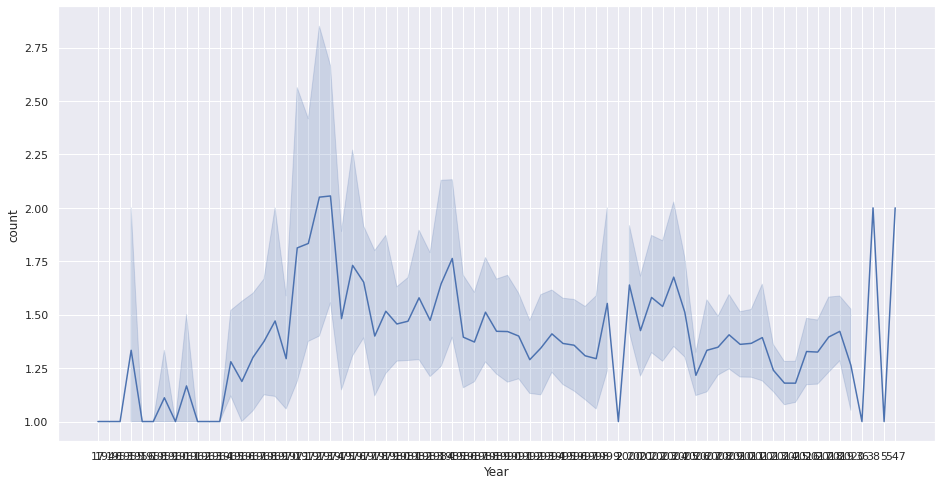

In [0]:
#timeplot
import seaborn as sns

# data = nomyear.count
# time = nomyear.Year
fig, ax = plt.subplots(figsize=[14,8])
sns.lineplot(x='Year', y='count', data=nomyear)

In [0]:
# nominees_df2=pd.read_csv('nominees_df2.csv')
result = pd.merge(nominees_stats_awards, nominees_df2[['bookID', 'num_pages']], on=['bookID'])
result

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,languages,date_published,publication_year,publisher,description,author_bio,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender,num_pages
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,NaN
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,NaN
2,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,NaN
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,93.0
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,NaN,March 3rd 2016,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,44.0
3586,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-dinosaur,Mass Market Paperback,English,1969,1956.0,Curtis Books,[A Reginald Rivers story.] A time machine that...,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",3.68,92,4,195,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,319.0
3587,3587,91109,NaN,0441061358,The Long Tomorrow,Leigh Brackett,/book/show/91109.The_Long_Tomorrow,Mass Market Paperback,English,1962,1956.0,Ace Book,Two generations after destruction rained down ...,"Leigh Brackett was born on December 7, 1915 in...",3.66,2017,218,157,0,0,Hugo Award Nominee for Best Novel (1956),1,0,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
result.columns

Index(['Unnamed: 0', 'bookID', 'asin', 'isbn', 'bookTitle', 'authorName',
       'bookLink', 'format', 'languages', 'date_published', 'publication_year',
       'publisher', 'description', 'author_bio', 'average_rating',
       'ratings_count', 'text_reviews_count', 'author_followers',
       'goodreads_author', 'book_series', 'award', 'Nominee', 'Winner',
       'AwardCategory', 'AwardEntity', 'HugoAward', 'LocusAward',
       'NebulaAward', 'BestNovel', 'BestNovelette', 'BestNovella',
       'BestShortStory', 'BestArtBook', 'BestNonFiction', 'BestCollection',
       'BestAnthology', 'BestNewWriter', 'BestYoungAdultBook',
       'BestGraphicStory', 'BestSpecialAward', 'BestSeries',
       'BestShortFiction', 'BestOther', 'gender', 'num_pages'],
      dtype='object')

In [0]:

uniqueresult=result[['Unnamed: 0', 'bookID', 'asin', 'isbn', 'bookTitle', 'authorName',
       'bookLink', 'format', 'num_pages', 'languages', 'date_published', 'publication_year',
       'publisher', 'description', 'author_bio', 'gender', 'average_rating',
       'ratings_count', 'text_reviews_count', 'author_followers',
       'goodreads_author', 'book_series', 'award', 'Nominee', 'Winner',
       'AwardCategory', 'AwardEntity', 'HugoAward', 'LocusAward',
       'NebulaAward', 'BestNovel', 'BestNovelette', 'BestNovella',
       'BestShortStory', 'BestArtBook', 'BestNonFiction', 'BestCollection',
       'BestAnthology', 'BestNewWriter', 'BestYoungAdultBook',
       'BestGraphicStory', 'BestSpecialAward', 'BestSeries',
       'BestShortFiction', 'BestOther']]
uniqueresult
# result.to_csv('nominee_stats_awardsunique3.csv')

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,93.0,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,female,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,44.0,NaN,March 3rd 2016,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,male,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3586,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-dinosaur,Mass Market Paperback,319.0,English,1969,1956.0,Curtis Books,[A Reginald Rivers story.] A time machine that...,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",male,3.68,92,4,195,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3587,3587,91109,NaN,0441061358,The Long Tomorrow,Leigh Brackett,/book/show/91109.The_Long_Tomorrow,Mass Market Paperback,223.0,English,1962,1956.0,Ace Book,Two generations after destruction rained down ...,"Leigh Brackett was born on December 7, 1915 in...",female,3.66,2017,218,157,0,0,Hugo Award Nominee for Best Novel (1956),1,0,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,

In [0]:
uniqueresult.to_csv('nominee_stats_awards_all3.csv')

In [0]:
uniqueresult.columns

Index(['Unnamed: 0', 'bookID', 'asin', 'isbn', 'bookTitle', 'authorName',
       'bookLink', 'format', 'num_pages', 'languages', 'date_published',
       'publication_year', 'publisher', 'description', 'author_bio', 'gender',
       'average_rating', 'ratings_count', 'text_reviews_count',
       'author_followers', 'goodreads_author', 'book_series', 'award',
       'Nominee', 'Winner', 'AwardCategory', 'AwardEntity', 'HugoAward',
       'LocusAward', 'NebulaAward', 'BestNovel', 'BestNovelette',
       'BestNovella', 'BestShortStory', 'BestArtBook', 'BestNonFiction',
       'BestCollection', 'BestAnthology', 'BestNewWriter',
       'BestYoungAdultBook', 'BestGraphicStory', 'BestSpecialAward',
       'BestSeries', 'BestShortFiction', 'BestOther'],
      dtype='object')

In [0]:
awards.groupby(['bookTitle', 'HugoAward']).count()

Unnamed: 0  ...  COUNTER
bookTitle                                 HugoAward              ...         
"Hello" Said the Stick                    1                   1  ...        1
"Repent, Harlequin!" Said the Ticktockman 0                   1  ...        1
                                          1                   1  ...        1
10 to the 16 to 1                         1                   1  ...        1
11/22/63                                  0                   1  ...        1
...                                                         ...  ...      ...
נשיפה                                     1                   1  ...        1
レインボーズ・エンド 上 [Reinbōzu endo jō]           0                   1  ...        1
                                          1                   1  ...        1
レインボーズ・エンド 下 [Reinbōzu endo ge]           0                   1  ...        1
                                          1                   1  ...        1

[3225 rows x 29 columns]

In [0]:
awards

,Unnamed: 0,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender,COUNTER
0,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,1
1,0,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Nebula Award for Best Novelette (2018),1,1,2018,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,1
2,0,36686547,/book/show/36686547-the-tea-master-and-the-det...,The Tea Master and the Detective,Aliette de Bodard,Nebula Award for Novella (2018),1,1,2018,Best Novella,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female,1
3,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Nebula Award for Best Novel (2018),1,1,2018,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,1
4,0,35957452,/book/show/35957452-apex-magazine-issue-99,Apex Magazine Issue 99,Jason Sizemore,"Nebula Award for Best Short Story for ""Welcome...",1,1,2017,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0,29519390,/book/show/29519390-brightside-crossing,Brightside Crossing,Alan E. Nourse,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,1
3586,0,2935921,/book/show/2935921-a-gun-for-dinosaur,A Gun for Dinosaur,L. Sprague de Camp,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,1
3587,0,91109,/book/show/91109.The_Long_Tomorrow,The Long Tomorrow,Leigh Brackett,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,1
3588,0,509784,/book/show/509784.The_End_of_Eternity,The End of Eternity,Isaac Asimov,Hugo Award Nominee for Best Novel (1956),1,0,1956,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,1


In [0]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# #create count plot for room types
# %matplotlib inline
# sns.set(style="darkgrid")
# ax = sns.countplot(x='AwardCategory',  data=awards)
# plt.show()

#create count plot for room types

%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='gender', hue="AwardCategory", data=awards))
plt.show()
plt.figure(figsize=(15,4)

SyntaxError: ignored

In [0]:
import seaborn as sns
sns.boxplot(
    data=summary,
    x='Country',
    y='medal count',
    color='red')

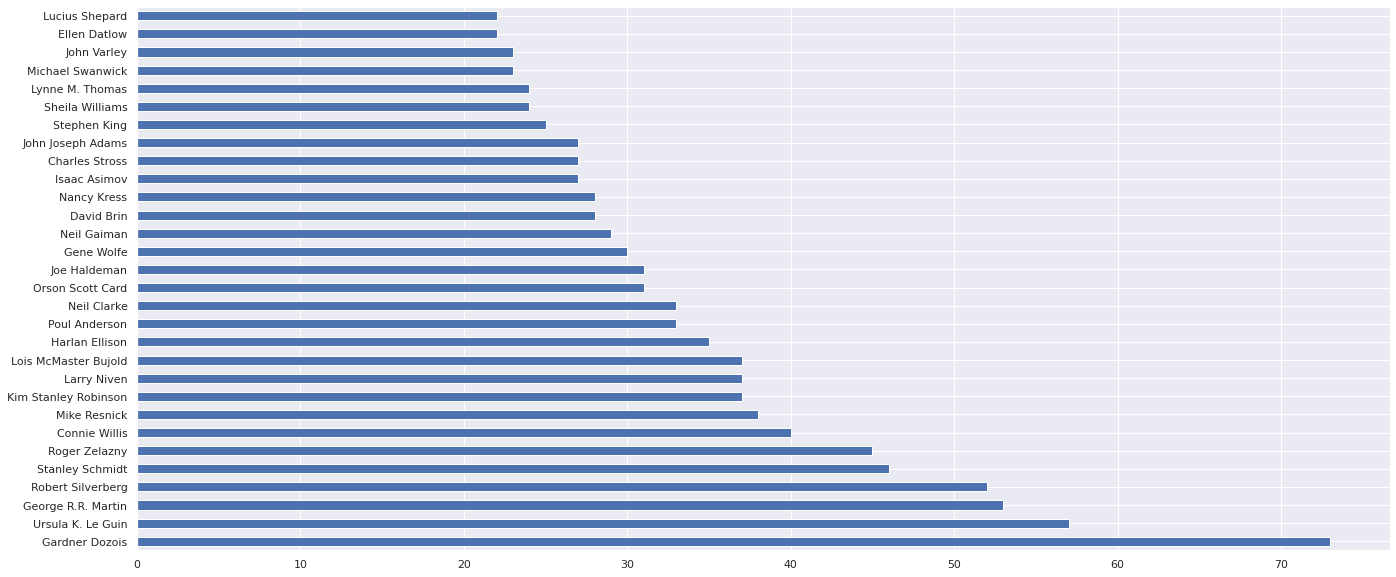

In [0]:
# author counts
import matplotlib.pyplot as plt
awards['authorName'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [0]:
# merge awards and books_df info
import pandas as pd
awards['book_id']=awards['bookID']
awards['book_id']=awards['book_id'].astype(str)
awards=books_df.merge(awards, left_on='book_id', right_on='book_id')
# nomination_df=pd.concat([books_df, awards])
# delete unneeded columns
del awards['Unnamed: 0_x']
del awards['book_id']
del awards['book_title']
del awards['book_author']
del awards['Unnamed: 0_y']
# awards['pages']=awards['pages'].astype(int)
awards

,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Hugo Award Nominee for Short Story for ""The Se...",1,0,2019,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,Humankind has dominated the world Pangborn for...,9781619470125,77.0,ebook,English,"Spatterlight Press, LLC",June 14th 2012,3.47,53,11,17566535,/book/show/17566535-the-miracle-workers,The Miracle Workers,Jack Vance,Hugo Award Nominee for Best Novelette (1959),1,0,1959,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3041,Future humanity has found the secret of faster...,NaN,15.0,Kindle Edition,English,NaN,NaN,4.10,349,31,6147201,/book/show/6147201-the-game-of-rat-and-dragon,The Game of Rat and Dragon,Cordwainer Smith,Hugo Award Nominee for Best Short Story (1956),1,0,1956,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3042,It was a world of Utopian dreams and industria...,NaN,NaN,Kindle Edition,English,NaN,NaN,3.33,3,0,12122791,/book/show/12122791-the-assistant-self,The Assistant Self,F.L. Wallace,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3043,Four men set out to prove their mettle by cros...,9781681465050,44.0,ebook,NaN,Start Publishing LLC,March 3rd 2016,3.45,11,2,29519390,/book/show/29519390-brightside-crossing,Brightside Crossing,Alan E. Nourse,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male


In [0]:
# birthdates
birthdates=pd.read_csv('https://www.dropbox.com/s/p4xchyhmgkpht8o/birthdates.csv?dl=1')
birthdates['authorName']=birthdates['Author'].str.replace(r"\(.*\)","")
birthdates['authorName']=birthdates['Author'].str.strip()
awards=awards.merge(birthdates, left_on='authorName', right_on='authorName')
awards

,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender,Unnamed: 0,Author,Alternate Name?,Working Language,Directory Entry,Legal Name,Birth Place,Birth Date,Death Date
0,25372801,/book/show/25372801-all-the-birds-in-the-sky,All the Birds in the Sky,Charlie Jane Anders,Nebula Award for Best Novel (2016),1,1,2016,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,94.0,Charlie Jane Anders,-,English,Anders,-,"Connecticut, USA",-,-
1,11631709,/book/show/11631709-six-months-three-days,"Six Months, Three Days",Charlie Jane Anders,Nebula Award Nominee for Best Novelette (2011),1,0,2011,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,94.0,Charlie Jane Anders,-,English,Anders,-,"Connecticut, USA",-,-
2,25372801,/book/show/25372801-all-the-birds-in-the-sky,All the Birds in the Sky,Charlie Jane Anders,Locus Award for Best Fantasy Novel (2017),1,1,2017,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,94.0,Charlie Jane Anders,-,English,Anders,-,"Connecticut, USA",-,-
3,34496774,/book/show/34496774-six-months-three-days-five...,"Six Months, Three Days, Five Others",Charlie Jane Anders,Locus Award Nominee for Best Collection (2018),1,0,2018,Best Collection,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,94.0,Charlie Jane Anders,-,English,Anders,-,"Connecticut, USA",-,-
4,11631709,/book/show/11631709-six-months-three-days,"Six Months, Three Days",Charlie Jane Anders,Locus Award Nominee for Best Novelette (2012),1,0,2012,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,94.0,Charlie Jane Anders,-,English,Anders,-,"Connecticut, USA",-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,38371243,/book/show/38371243-kin,Kin,Bruce McAllister,Hugo Award Nominee for Best Short Story (2007),1,0,2007,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,45.0,Bruce McAllister,-,English,McAllister,"McAllister, Bruce Hugh","Baltimore, Maryland, USA",1946-10-17,-
318,395822,/book/show/395822.Hollywood_Gothic,Hollywood Gothic: The Tangled Web of Dracula f...,David J. Skal,Hugo Award Nominee for Best Nonfiction Book (1...,1,0,1991,Best Non-Fiction,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,15.0,David J. Skal,-,English,Skal,"Skal, David John","Garfield Heights, Ohio, USA",1952-06-21,-
319,185980,/book/show/185980.Black_Genesis,"Black Genesis (Mission Earth, #2)",L. Ron Hubbard,Hugo Award Nominee for Best Novel (1987),1,0,1987,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,58.0,L. Ron Hubbard,-,English,Hubbard,"Hubbard, Lafayette Ronald","Tilden, Nebraska, USA",1911-03-13,1986-01-24
320,2168406,/book/show/2168406.New_Eves,New Eves: Science Fiction About the Extraordin...,Forrest J. Ackerman,"Hugo Award Nominee for Best Short Story for ""S...",1,0,1985,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,87.0,Forrest J. Ackerman,-,English,Ackerman,"Ackerman, Forrest James","Los Angeles, California, USA",1916-11-24,2008-12-04


In [0]:
nominees_awards_stats

(3590, 43)

In [0]:

nominees_awards_stats.publisher.unique()

array(['Fireside Fiction', 'Tor.com Publishing', 'Subterranean Press',
       'Tor Books', 'Apex Magazine', 'Tor.com', 'Orbit', 'Saga Press',
       'Belaurient Press', 'Dell Magazines', 'John Joseph Adams',
       'Del Rey', 'Red Wombat Studio', 'Tachyon Publications',
       'Alaya Dawn Johnson', 'Farrar, Straus and Giroux',
       'Aliette de Bodard', nan, 'PS Publishing', 'Wyrm Publishing',
       'Gizmodo', "Le Bélial'", 'Spilogale inc.', "St. Martin's Press",
       'Eric James Stone', 'Spectra', 'Spectra Books',
       'Night Shade Books', 'Small Beer Press', 'Kiriki Press',
       'HMH Books for Young Readers', 'HarperCollins', 'Fictionwise',
       'Ace', 'Firebird', 'Mariner Books', 'HarperTorch',
       'Golden Gryphon Press', 'William Morrow Paperbacks',
       'Spilogale, Inc.', 'Escape Artists, Inc.', 'William Morrow',
       'ReAnimus Press', 'Phoenix Pick', 'Mercury Press, Inc.',
       'Forge Books', 'Mythic Island Press', 'Ballantine Books',
       'Warner Books (NY)'

In [0]:
awards

,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Hugo Award Nominee for Short Story for ""The Se...",1,0,2019,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,Humankind has dominated the world Pangborn for...,9781619470125,77.0,ebook,English,"Spatterlight Press, LLC",June 14th 2012,3.47,53,11,17566535,/book/show/17566535-the-miracle-workers,The Miracle Workers,Jack Vance,Hugo Award Nominee for Best Novelette (1959),1,0,1959,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3041,Future humanity has found the secret of faster...,NaN,15.0,Kindle Edition,English,NaN,NaN,4.10,349,31,6147201,/book/show/6147201-the-game-of-rat-and-dragon,The Game of Rat and Dragon,Cordwainer Smith,Hugo Award Nominee for Best Short Story (1956),1,0,1956,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3042,It was a world of Utopian dreams and industria...,NaN,NaN,Kindle Edition,English,NaN,NaN,3.33,3,0,12122791,/book/show/12122791-the-assistant-self,The Assistant Self,F.L. Wallace,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
3043,Four men set out to prove their mettle by cros...,9781681465050,44.0,ebook,NaN,Start Publishing LLC,March 3rd 2016,3.45,11,2,29519390,/book/show/29519390-brightside-crossing,Brightside Crossing,Alan E. Nourse,Hugo Award Nominee for Best Novelette (1956),1,0,1956,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male


In [0]:
awards.bookID.nunique()

1343

In [0]:
awards.to_csv('awardsmodel.csv')

In [0]:
multiple = awards[(awards['Award'] >= 99) & (df['closing_price'] <= 101)]

In [0]:
3590/2622

# the average book gets nominated 1.37 times 

1.3691838291380625

# More Award Analysis

In [0]:
books_df['isbn'] = books_df['isbn'].str[3:]
books_df.isbn

0              NaN
1              NaN
2              NaN
3                 
4                 
           ...    
2617    1681465050
2618              
2619    0441061358
2620    0449016190
2621    0345327574
Name: isbn, Length: 2622, dtype: object

In [0]:
books_df = books_df.reset_index()
# del books_df['index']

2328

In [0]:
del books_df['level_0']
del books_df['Unnamed: 0']

In [0]:
books_df.to_csv('nominees_df3.csv')

In [0]:
# nyt_bestsellers['asin']=nyt_bestsellers['AISN']
nyt_bestsellers = nyt_bestsellers.reset_index()

In [0]:
nyt_bestsellers.to_csv('nyt_bestsellers3.csv')

In [0]:
del nyt_bestsellers['index']
del nyt_bestsellers['Unnamed: 0']

In [0]:
nyt_bestsellers.columns

Index(['AISN', 'bookTitle', 'authorName', 'publisher', 'NYT_Bestseller',
       'NYT_MaxWeeksList', 'NYT_NumberOne', 'NYT_WeeksAtOne', 'isbn', 'asin'],
      dtype='object')

In [0]:
nyt_bestsellers.isbn=nyt_bestsellers.isbn.str.strip()
nyt_bestsellers.isbn=nyt_bestsellers.isbn.str.rjust(10,'0')

In [0]:
nyt_bestsellers.to_csv('nyt_bestsellers2.csv')

In [0]:
nyt_bestsellers=pd.read_csv('nyt_bestsellers.csv')

In [0]:
nyt_bestsellers.dtypes

Unnamed: 0           int64
AISN                object
bookTitle           object
authorName          object
publisher           object
NYT_Bestseller       int64
NYT_MaxWeeksList     int64
NYT_NumberOne        int64
NYT_WeeksAtOne       int64
isbn                object
dtype: object

In [0]:
books_df.isbn.nunique()

2079

In [0]:
# nyt_bestsellers['isbn']=nyt_bestsellers['AISN']
# nyt_bestsellers['isbn']=nyt_bestsellers['isbn'].astype(str)
# books_df['isbn']=books_df['isbn'].astype(str)
nyt_nom=pd.merge(books_df, nyt_bestsellers, how='left', on='isbn')

In [0]:
nyt_nom2= pd.merge(books_df, nyt_bestsellers,  how='left', left_on=['asin', 'asin'], right_on = ['isbn', 'isbn'])
nyt_nom2

,index_x,bookID,bookTitle_x,authorName_x,description,asin_x,isbn_x,num_pages,format,languages,publisher_x,date_published,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,author_bio,goodreads_author,book_series,index_y,AISN,bookTitle_y,authorName_y,publisher_y,NYT_Bestseller,NYT_MaxWeeksList,NYT_NumberOne,NYT_WeeksAtOne,isbn_y,asin_y
0,0,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,NaN,ebook,English,Fireside Fiction,February 2018,2018.0,3.84,237,58,30,"Julia Rios writes all sorts of things, and edi...",1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",NaN,NaN,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,2018.0,3.91,3065,659,185,Brooke Bolander writes weird things of indeter...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,36686547,The Tea Master and the Detective,Aliette de Bodard,"Welcome to the Scattered Pearls Belt, a collec...",NaN,NaN,96.0,Hardcover,English,Subterranean Press,March 31st 2018,2018.0,3.90,3435,609,1273,Aliette de Bodard lives and works in Paris. Sh...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,33080122,The Calculating Stars,Mary Robinette Kowal,El futuro de la humanidad está en manos de un ...,NaN,,431.0,Paperback,English,Tor Books,July 3rd 2018,2018.0,4.02,16425,2874,3373,Mary Robinette Kowal was the 2008 recipient of...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,35957452,Apex Magazine Issue 99,Jason Sizemore,"Apex Magazine is a monthly science fiction, fa...",B074D5TWNL,,119.0,Kindle Edition,English,Apex Magazine,August 1st 2017,2017.0,4.11,925,192,83,I was born the son of an unemployed coal miner...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617,29519390,Brightside Crossing,Alan E. Nourse,Four men set out to prove their mettle by cros...,NaN,1681465050,44.0,ebook,NaN,Start Publishing LLC,March 3rd 2016,1956.0,3.45,11,2,20,Alan Edward Nourse was an American science fic...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2618,2618,2935921,A Gun for Dinosaur,L. Sprague de Camp,[A Reginald Rivers story.] A time machine that...,NaN,,319.0,Mass Market Paperback,English,Curtis Books,1969,1956.0,3.68,92,4,195,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2619,2619,91109,The Long Tomorrow,Leigh Brackett,Two generations after destruction rained down ...,NaN,0441061358,223.0,Mass Market Paperback,English,Ace Book,1962,1956.0,3.66,2017,218,157,"Leigh Brackett was born on December 7, 1915 in...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2620,2620,509784,The End of Eternity,Isaac Asimov,"Andrew Harlan is an Eternal, a man whose job i...",NaN,0449016190,192.0,Mass Market Paperback,English,Fawcett Crest,October 1st 1971,1956.0,4.24,41777,2167,18234,"Isaac Asimov was a Russian-born, American auth...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
nyt_bestsellers.isbn.unique()

array(['0553807056', '0316218502', '0312348665', ..., 'B07639D2G9',
       'B075RMMZ6K', '1524743070'], dtype=object)

In [0]:
books_df.isbn.unique()

array([nan, '', '0765392794', ..., '0441061358', '0449016190',
       '0345327574'], dtype=object)

In [0]:
nyt_nom=pd.merge(books_df, nyt_bestsellers, on='isbn')
nyt_nom

,index_x,bookID,bookTitle_x,authorName_x,description,asin_x,isbn,num_pages,format,languages,publisher_x,date_published,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,author_bio,goodreads_author,book_series,index_y,AISN,bookTitle_y,authorName_y,publisher_y,NYT_Bestseller,NYT_MaxWeeksList,NYT_NumberOne,NYT_WeeksAtOne,asin_y
0,1262,30555488,The Underground Railroad,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,NaN,0385542364,306.0,Hardcover,English,Doubleday Books,August 2nd 2016,2017.0,4.02,264460,23141,7527,I'm the author of the novels Zone One; Sag Har...,1,0,1951,385542364,The Underground Railroad,Colson Whitehead,Doubleday,1,37,1,3,385542364
1,1457,10365343,Zone One,Colson Whitehead,In this wry take on the post-apocalyptic horro...,NaN,0385528078,259.0,Hardcover,English,Doubleday,October 18th 2011,2012.0,3.26,17670,3009,7527,I'm the author of the novels Zone One; Sag Har...,1,0,828,385528078,Zone One,Colson Whitehead,Doubleday,1,1,0,0,385528078


In [0]:
nyt_bestsellers2=nyt_bestsellers.copy()
nyt_bestsellers2.dropna()

,index,AISN,bookTitle,authorName,publisher,NYT_Bestseller,NYT_MaxWeeksList,NYT_NumberOne,NYT_WeeksAtOne,isbn,asin
0,0,553807056,Odd Hours,Dean R Koontz,Bantam,1,6,1,1,0553807056,553807056
1,1,316218502,The Host,Stephenie Meyer,"Little, Brown",1,59,0,0,0316218502,316218502
2,2,312348665,Love The One You're With,Emily Giffin,St. Martin's,1,14,0,0,0312348665,312348665
3,3,B0017T0C9M,The Front,Patricia Cornwell,Putnam,1,3,0,0,B0017T0C9M,B0017T0C9M
4,4,385517882,Snuff,Chuck Palahniuk,Doubleday,1,3,0,0,0385517882,385517882
...,...,...,...,...,...,...,...,...,...,...,...
2323,2323,553391518,The Skaar Invasion,Terry Brooks,Del Rey,1,1,0,0,0553391518,553391518
2324,2324,1250151333,Bring Me Back,BA Paris,St. Martin's,1,1,0,0,1250151333,1250151333
2325,2325,B07639D2G9,All We Ever Wanted,Emily Giffin,Ballantine,1,2,0,0,B07639D2G9,B07639D2G9
2326,2326,B075RMMZ6K,Spymaster,Brad Thor,Emily Bestler/Atria,1,1,0,0,B075RMMZ6K,B075RMMZ6K


In [0]:
  nyt_bestsellers.publisher.unique()

array(['Bantam', 'Little, Brown', "St. Martin's", 'Putnam', 'Doubleday',
       'Harper', 'Grand Central', 'Del Rey/Ballantine', 'Mira',
       'Ballantine', 'HarperCollins Publishers', 'Knopf',
       'Knopf Publishing Group', 'Doubleday Publishing',
       'Random House Publishing Group', 'Berkley', 'Simon & Schuster',
       'Morrow', 'Delacorte', 'Random House',
       'Norton & Company, Incorporated, W. W.',
       'Penguin Group (USA) Incorporated', 'St. Martin’s', 'Ecco',
       'Riverhead', 'Pocket Books', 'Viking, $24.95', 'Atria',
       'Little Brown & Company', 'Double\xadday', 'Tor', 'Dial',
       'Del Rey', 'Scribner', 'Del Rey/ Ballantine',
       'Farrar, Straus & Giroux', 'Roc', 'William Morrow', 'Ballantine,',
       'Twelve', 'Touchstone', 'Houghton Mifflin', 'Doherty', 'Viking',
       'Hyperion', 'Wizards of the Coast', 'DAW', 'Pantheon', 'HQN',
       'Threshold Editions', 'Tor/Tom Doherty', 'Ace', 'allantine',
       'Holt', 'Dutton', 'Eos/William Morrow', 'Kens

In [0]:
nyt_nom2.to_csv('nyt_nom_merged2.csv')

In [0]:
nyt_nom2.NYT_Bestseller.value_counts()

1.0    2
Name: NYT_Bestseller, dtype: int64

In [0]:
nyt_nom2.to_csv('nyt_nom_merged.csv')

In [0]:
nyt_nom.NYT_Bestseller=nyt_nom.NYT_Bestseller.fillna(0)
nyt_nom.NYT_Bestseller=nyt_nom.NYT_Bestseller.astype(int)
nyt_nom.NYT_NumberOne=nyt_nom.NYT_NumberOne.fillna(0)
nyt_nom.NYT_NumberOne=nyt_nom.NYT_NumberOne.astype(int)
nyt_nom.NYT_WeeksAtOne=nyt_nom.NYT_WeeksAtOne.fillna(0)
nyt_nom.NYT_WeeksAtOne=nyt_nom.NYT_WeeksAtOne.astype(int)
nyt_nom.NYT_MaxWeeksList=nyt_nom.NYT_MaxWeeksList.fillna(0)
nyt_nom.NYT_MaxWeeksList=nyt_nom.NYT_MaxWeeksList.astype(int)

## Hugo Analysis

In [0]:
# hugo df

hugo=awards[awards.AwardEntity=='Hugo']
hugo=hugo[hugo.Year=='2019']
hugo



,Unnamed: 0,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
2632,0,38459780,/book/show/38459780-the-books-of-earthsea,The Books of Earthsea,Ursula K. Le Guin,Hugo Award for Best Art Book (2019),1,1,2019,Best Art Book,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2633,0,38460963,/book/show/38460963-apex-magazine-issue-105-fe...,"Apex Magazine Issue 105, February 2018",Jason Sizemore,Hugo Award for Best Short Story for “A Witch’s...,1,1,2019,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2634,0,43064429,/book/show/43064429-if-at-first-you-don-t-succ...,"If at First You Don't Succeed, Try, Try Again",Zen Cho,Hugo Award for Best Novelette (2019),1,1,2019,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
2635,0,37491890,/book/show/37491890-monstress-vol-3,"Monstress, Vol. 3: Haven",Marjorie M. Liu,Hugo Award for Best Graphic Story (2019),1,1,2019,Best Graphic Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2636,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Hugo Award for Best Novel (2019),1,1,2019,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
2637,0,36223860,/book/show/36223860-artificial-condition,"Artificial Condition (The Murderbot Diaries, #2)",Martha Wells,Hugo Award for Best Novella (2019),1,1,2019,Best Novella,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2947,0,40642225,/book/show/40642225-uncanny-magazine-issue-23,Uncanny Magazine Issue 23: July/August 2018,Lynne M. Thomas,"Hugo Award Nominee for Best Short Story for ""T...",1,0,2019,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2948,0,37785024,/book/show/37785024-lightspeed-magazine-januar...,"Lightspeed Magazine, January 2018",John Joseph Adams,"Hugo Award Nominee for Best Short Story for ""T...",1,0,2019,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2949,0,36542884,/book/show/36542884-tolkien,Tolkien: Maker of Middle-earth,Catherine McIlwaine,Hugo Award Nominee for Best Art Book (2019),1,0,2019,Best Art Book,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2950,0,41084955,/book/show/41084955-spider-man,Spider-Man: Into the Spider-Verse -The Art of ...,Ramin Zahed,Hugo Award Nominee for Best Art Book (2019),1,0,2019,Best Art Book,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male


In [0]:
# hugo best novel

hugobn=hugo[hugo.AwardCategory=='Best Novel']
hugobn

,Unnamed: 0_x,book_id,book_title,book_author,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,Unnamed: 0_y,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
29,3,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Hugo Award for Best Novel (2019),1,1,2019,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
32,803,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Hugo Award for Best Novel (2019),1,1,2019,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
35,2636,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16385,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Hugo Award for Best Novel (2019),1,1,2019,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
60,7,31817749,The Stone Sky,N.K. Jemisin,This is the way the world ends... for the last...,NaN,416.0,Paperback,English,Orbit,August 15th 2017,4.35,59860,5976,0,31817749,/book/show/31817749-the-stone-sky,"The Stone Sky (The Broken Earth, #3)",N.K. Jemisin,Hugo Award for Best Novel (2018),1,1,2018,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
63,811,31817749,The Stone Sky,N.K. Jemisin,This is the way the world ends... for the last...,NaN,416.0,Paperback,English,Orbit,August 15th 2017,4.35,59860,5976,0,31817749,/book/show/31817749-the-stone-sky,"The Stone Sky (The Broken Earth, #3)",N.K. Jemisin,Hugo Award for Best Novel (2018),1,1,2018,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,3112,3973532,Palimpsest,Catherynne M. Valente,In the Cities of Coin and Spice and In the Nig...,9780553385762,367.0,Paperback,English,Spectra,February 24th 2009,3.66,4530,794,0,3973532,/book/show/3973532-palimpsest,Palimpsest,Catherynne M. Valente,Hugo Award Nominee for Best Novel (2010),1,0,2010,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
2978,3113,4418395,WWW: Wake,Robert J. Sawyer,"Caitlin Decter is young, pretty, feisty, a gen...",9780441016792,354.0,Hardcover,English,Ace Hardcover,April 7th 2009,3.81,7458,803,0,4418395,/book/show/4418395-www,"WWW: Wake (WWW, #1)",Robert J. Sawyer,Hugo Award Nominee for Best Novel (2010),1,0,2010,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2995,3170,4606757,Un festin pour les corbeaux,George R.R. Martin,"Accompagnée de Meribal, Podrick et Ser Hyle, l...",9782290010808,409.0,Mass Market Paperback,French,J'ai Lu,January 14th 2009,4.14,243,11,0,4606757,/book/show/4606757-un-festin-pour-les-corbeaux,"Un festin pour les corbeaux (Le trône de fer, ...",George R.R. Martin,Hugo Award Nominee for Best Novel (2006),1,0,2006,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3001,3204,40600413,Kiln People,David Brin,In a perilous future where disposable duplicat...,NaN,576.0,Kindle Edition,English,Tor Books,October 4th 2005,3.84,5581,307,0,40600413,/book/show/40600413-kiln-people,Kiln People,David Brin,Hugo

In [0]:
# hugo gender
hugo.gender.value_counts()

male       508
female     219
unknown    214
Name: gender, dtype: int64

## Nebula Analysis

In [0]:
# nebula df

#filter by awardentity
nebula=awards[awards.AwardEntity=='Nebula']

#filter by year
# nebula=nebula[nebula.Year=='2018']

nebula

,Unnamed: 0_x,book_id,book_title,book_author,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,Unnamed: 0_y,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,0,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,792,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
6,2968,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Nebula Award for Short Story for ""The Secret L...",1,1,2018,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
9,1,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",9781250169488,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,3.91,3060,656,0,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Nebula Award for Best Novelette (2018),1,1,2018,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
12,797,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",9781250169488,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,3.91,3060,656,0,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Nebula Award for Best Novelette (2018),1,1,2018,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,776,6037558,Becalmed in Hell,Larry Niven,"Written three years before ""2001: A Space Odys...",NaN,NaN,Kindle Edition,English,Fictionwise Classic,September 25th 2003,3.61,117,3,0,6037558,/book/show/6037558-becalmed-in-hell,Becalmed in Hell,Larry Niven,Nebula Award Nominee for Best Short Story (1965),1,0,1965,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
1728,777,35821134,Four Ghosts in Hamlet,Fritz Leiber,NaN,NaN,NaN,NaN,English,NaN,NaN,5.00,1,0,0,35821134,/book/show/35821134-four-ghosts-in-hamlet,Four Ghosts in Hamlet,Fritz Leiber,Nebula Award Nominee for Best Novelette (1965),1,0,1965,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
1729,780,6319160,Rogue Dragon,Avram Davidson,Rogue Dragon is the latest addition to the gro...,9781600104916,140.0,Paperback,English,IDW Publishing,September 1st 2009,3.14,28,2,0,6319160,/book/show/6319160-rogue-dragon,Rogue Dragon,Avram Davidson,Nebula Award Nominee for Best Novel (1965),1,0,1965,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
1730,788,34948429,A Few Kindred Spirits,John Christopher,NaN,NaN,NaN,NaN,English,NaN,NaN,3.00,1,0,0,34948429,/book/show/34948429-a

In [0]:
# nebula best novel

nebulabn=nebula[nebula.AwardCategory=='Best Novel']
nebulabn

,Unnamed: 0_x,book_id,book_title,book_author,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,Unnamed: 0_y,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
27,3,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Nebula Award for Best Novel (2018),1,1,2018,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
30,803,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Nebula Award for Best Novel (2018),1,1,2018,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
33,2636,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16385,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Nebula Award for Best Novel (2018),1,1,2018,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
58,7,31817749,The Stone Sky,N.K. Jemisin,This is the way the world ends... for the last...,NaN,416.0,Paperback,English,Orbit,August 15th 2017,4.35,59860,5976,0,31817749,/book/show/31817749-the-stone-sky,"The Stone Sky (The Broken Earth, #3)",N.K. Jemisin,Nebula Award for Best Novel (2017),1,1,2017,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
61,811,31817749,The Stone Sky,N.K. Jemisin,This is the way the world ends... for the last...,NaN,416.0,Paperback,English,Orbit,August 15th 2017,4.35,59860,5976,0,31817749,/book/show/31817749-the-stone-sky,"The Stone Sky (The Broken Earth, #3)",N.K. Jemisin,Nebula Award for Best Novel (2017),1,1,2017,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,678,3033947,Guernica Night,Barry N. Malzberg,Who can resist the Final Trip?Earth in the twe...,9780450035562,127.0,Mass Market Paperback,English,New English Library,October 1979,3.04,54,6,0,3033947,/book/show/3033947-guernica-night,Guernica Night,Barry N. Malzberg,Nebula Award Nominee for Novel (1975),1,0,1975,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
1707,754,36402034,Do Androids Dream of Electric Sheep?,Philip K. Dick,"It was January 2021, and Rick Deckard had a li...",NaN,258.0,Kindle Edition,English,Ballantine Books,February 26th 2008,4.09,326613,12563,0,36402034,/book/show/36402034-do-androids-dream-of-elect...,Do Androids Dream of Electric Sheep?,Philip K. Dick,Nebula Award Nominee for Best Novel (1968),1,0,1968,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
1708,759,4453007,The Eskimo Invasion,Hayden Howard,"Dr. West was puzzled, frustrated, and mad. He ...",NaN,380.0,Mass Market Paperback,English,Ballantine,November 1967,2.69,13,6,0,4453007,/book/show/4453007-the-eskimo-invasion,The Eskimo Invasion,Hayden Howard,Nebula Award Nominee for Best Novel (1967),1,0,1967,Best Novel,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
1729,780,6319160,Rogue Dragon,Avram Davidson,Rogue Dragon is the latest addition to the gro...,9781600104916,140.0,Paperback,English,IDW Publishing,September 1st 2009,3.14,28,2,0,6319160,/boo

In [0]:
# nebula
nebula.gender.value_counts()

male       388
unknown    189
female     189
Name: gender, dtype: int64

## Locus Analysis

In [0]:
# locus df

#filter by awardentity
locus=awards[awards.AwardEntity=='Locus']

#filter by year
# locus=locus[locus.Year=='2019']

locus



,Unnamed: 0_x,book_id,book_title,book_author,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,Unnamed: 0_y,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
1,0,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,792,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
7,2968,43466735,"Fireside Magazine Issue 52, February 2018",Julia Rios,"In this issue: — ""Dust to Dust,"" by Mary Robin...",NaN,NaN,ebook,English,Fireside Fiction,February 2018,3.84,237,58,0,43466735,/book/show/43466735-fireside-magazine-issue-52...,"Fireside Magazine Issue 52, February 2018",Julia Rios,"Locus Award for Short Story for ""The Secret Li...",1,1,2019,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
10,1,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",9781250169488,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,3.91,3060,656,0,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Locus Award for Novelette (2019),1,1,2019,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
13,797,34659272,The Only Harmless Great Thing,Brooke Bolander,"In the early years of the 20th century, a grou...",9781250169488,93.0,Paperback,English,Tor.com Publishing,January 23rd 2018,3.91,3060,656,0,34659272,/book/show/34659272-the-only-harmless-great-thing,The Only Harmless Great Thing,Brooke Bolander,Locus Award for Novelette (2019),1,1,2019,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,2869,33260517,"The Magazine of Fantasy and Science Fiction, N...",Edward L. Ferman,"Volume 43, Number 5, Whole Number 258Contents:...",NaN,162.0,Paperback,English,"Mercury Press, Inc.",November 1st 1972,3.71,7,1,0,33260517,/book/show/33260517-the-magazine-of-fantasy-an...,"The Magazine of Fantasy and Science Fiction, N...",Edward L. Ferman,"Locus Award Nominee for Best Short Story for ""...",1,0,1973,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2843,2606,6037554,What Good Is a Glass Dagger?,Larry Niven,"[Second in a series that began with ""Not Long ...",NaN,43.0,Kindle Edition,English,Fictionwise Classic,September 25th 2003,4.03,224,3,0,6037554,/book/show/6037554-what-good-is-a-glass-dagger,What Good Is a Glass Dagger?,Larry Niven,Locus Award Nominee for Best Novella (1973),1,0,1973,Best Novella,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2844,2613,33980269,Quark/2,Samuel R. Delany,• Introduction by Samuel R. Delany and Marilyn...,NaN,240.0,Paperback,English,Paperback Library,February 1971,4.00,5,0,0,33980269,/book/show/33980269-quark-2,Quark/2,Samuel R. Delany,Locus Award Nominee for Best Original Antholog...,1,0,1972,Best Anthology,Locu

In [0]:
# locus best novel
locusbn=locus[locus.AwardCategory=='Best Novel']
locusbn

,Unnamed: 0_x,book_id,book_title,book_author,description,isbn,pages,book_format,languages,publisher,date_published,rating_average,rating_count,review_count,Unnamed: 0_y,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,Year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
28,3,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Locus Award for Science Fiction Novel (2019),1,1,2019,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
31,803,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16382,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Locus Award for Science Fiction Novel (2019),1,1,2019,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
34,2636,33080122,The Calculating Stars,Mary Robinette Kowal,"On a cold spring night in 1952, a huge meteori...",NaN,431.0,Paperback,English,Tor Books,July 3rd 2018,4.02,16385,2871,0,33080122,/book/show/33080122-the-calculating-stars,"The Calculating Stars (Lady Astronaut, #1)",Mary Robinette Kowal,Locus Award for Science Fiction Novel (2019),1,1,2019,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
59,7,31817749,The Stone Sky,N.K. Jemisin,This is the way the world ends... for the last...,NaN,416.0,Paperback,English,Orbit,August 15th 2017,4.35,59860,5976,0,31817749,/book/show/31817749-the-stone-sky,"The Stone Sky (The Broken Earth, #3)",N.K. Jemisin,Locus Award for Best Fantasy Novel (2018),1,1,2018,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
62,811,31817749,The Stone Sky,N.K. Jemisin,This is the way the world ends... for the last...,NaN,416.0,Paperback,English,Orbit,August 15th 2017,4.35,59860,5976,0,31817749,/book/show/31817749-the-stone-sky,"The Stone Sky (The Broken Earth, #3)",N.K. Jemisin,Locus Award for Best Fantasy Novel (2018),1,1,2018,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2405,33124137,Pet Sematary,Stephen King,'This is an alternate Cover Edition for ASIN: ...,NaN,580.0,Kindle Edition,English,Scribner,May 13th 2014,3.99,402732,12604,0,33124137,/book/show/33124137-pet-sematary,Pet Sematary,Stephen King,Locus Award Nominee for Best Fantasy Novel (1984),1,0,1984,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2792,2453,44439415,God Emperor of Dune,Frank Herbert,Book four in Frank Herbert's magnificent Dune ...,9780593098257,587.0,Paperback,English,Ace Books,June 4th 2019,3.85,64058,1517,0,44439415,/book/show/44439415-god-emperor-of-dune,"God Emperor of Dune (Dune Chronicles, #4)",Frank Herbert,Locus Award Nominee for Best SF Novel (1982),1,0,1982,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2818,2529,12286639,"Analog Science Fiction/Science Fact, September...",Ben Bova,• Stardance II (Part 1 of 3) by Jeanne Robinso...,NaN,180.0,Magazine,English,Condé Nast,September 1978,3.38,8,0,0,12286639,/book/show/12286639-analog-science-fiction-sci...,"Analog Science Fiction/Science Fact, September...",Ben Bova,"Locus Award Nominee for Best Novel for ""Starda...",1,0,1979,Best Novel,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
2820,2561,44492286,Children of Dune,Frank Herbert,Book three in Frank Herbert's magnificent Dune...,9780593098240,609.0,Paperback,English,Ace Bo

In [0]:
# locus gender
locus.gender.value_counts()

male       664
unknown    347
female     327
Name: gender, dtype: int64

# Gender Across Awards

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
%matplotlib inline
import datetime
from datetime import datetime as dt

plt.style.use('fivethirtyeight')

# months = mdates.MonthLocator(range(1,13), bymonthday=1)
# monthsFmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots()
plt.hold(True)
for year in range(2010,2020):
    vals = awards[str(Year)]['my_awesome_points'].cumsum().values
    adjusted_d_obj = ['2014'+x[4:] for x in dfs[str(year)]['date']]
    date_objs = [dt.strptime(x, '%Y-%m-%d') for x in adjusted_d_obj]
    dates = [mdates.date2num(x) for x in date_objs]
    #dateints = range(len(dates))
    if year == 2015:    
        ax.plot_date(dates, vals, '-', color=colors[str(year)],                          label=str(year))
    else:
        ax.plot_date(dates,vals, 'r-', color=colors[str(year)],    label=str(year), alpha=0.4)
fig.set_size_inches((14,10))
fig.set_dpi(800)

ax.grid(True)
fig.autofmt_xdate()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.savefig('sick_pick.png')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

for key, grp in awards.groupby(['gender']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='HugoAward', c=key, label=key)

plt.legend(loc='best')
plt.show()

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [0]:
awards.columns

Index(['description', 'isbn', 'pages', 'book_format', 'languages', 'publisher',
       'date_published', 'rating_average', 'rating_count', 'review_count',
       'bookID', 'bookLink', 'bookTitle', 'authorName', 'award', 'Nominee',
       'Winner', 'Year', 'AwardCategory', 'AwardEntity', 'HugoAward',
       'LocusAward', 'NebulaAward', 'BestNovel', 'BestNovelette',
       'BestNovella', 'BestShortStory', 'BestArtBook', 'BestNonFiction',
       'BestCollection', 'BestAnthology', 'BestNewWriter',
       'BestYoungAdultBook', 'BestGraphicStory', 'BestSpecialAward',
       'BestSeries', 'BestShortFiction', 'BestOther', 'gender'],
      dtype='object')

In [0]:
awards.dtypes

description            object
isbn                   object
pages                 float64
book_format            object
languages              object
publisher              object
date_published         object
rating_average        float64
rating_count            int64
review_count            int64
bookID                  int64
bookLink               object
bookTitle              object
authorName             object
award                  object
Nominee                 int64
Winner                  int64
Year                    int64
AwardCategory          object
AwardEntity            object
HugoAward               uint8
LocusAward              uint8
NebulaAward             uint8
BestNovel               int64
BestNovelette           int64
BestNovella             int64
BestShortStory          int64
BestArtBook             int64
BestNonFiction          int64
BestCollection          int64
BestAnthology           int64
BestNewWriter           int64
BestYoungAdultBook      int64
BestGraphi

In [0]:
awards=awards.dropna()

In [0]:
awards['Year']=awards['Year'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
awards.Year.unique()

array([2018, 2019, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2004, 2003, 2001, 1996, 1987, 1988, 1983, 1979, 1980,
       1978, 1974, 1970, 1971, 1965, 1966, 2006, 2005, 1994, 1995, 1991,
       1990, 1986, 1985, 1984, 1977, 1976, 1975, 1972, 1969, 1967, 1968,
       1992, 1981, 2002, 1997,  547, 1989, 1982,    2, 2020, 1959])

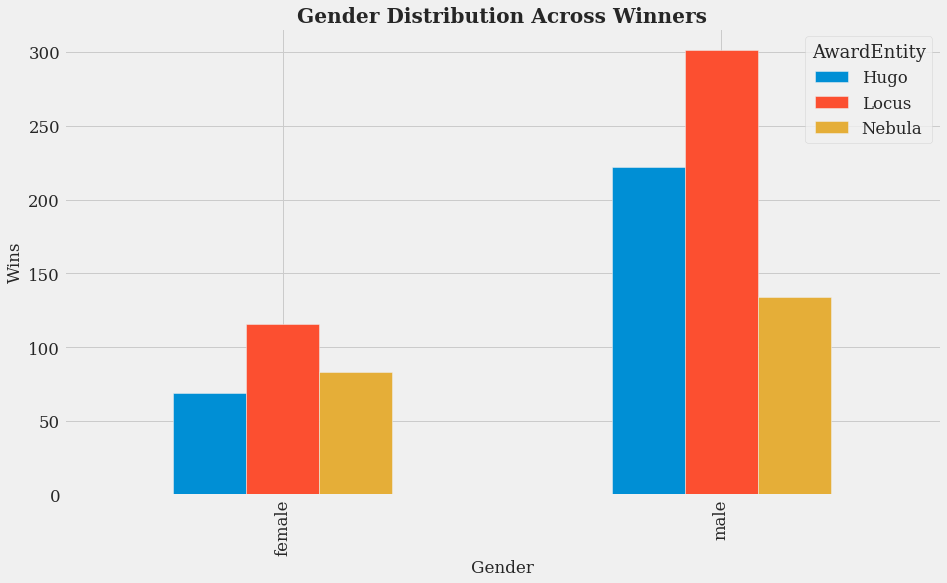

In [0]:
# gender in awards, winners distribution

# winners=nominees_stats_awards[nominees_stats_awards['Winner']]

ax = winners.groupby(['AwardEntity','gender'])['gender'].count().unstack(0).plot.bar(title="Gender Distribution in Winners", figsize=(14,8))
_ = ax.set_xlabel('Gender')
_ = ax.set_ylabel('Wins')
_ = ax.set_title('Gender Distribution Across Winners', weight='bold')

In [0]:
winners

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,languages,date_published,publication_year,publisher,description,author_bio,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
6,6,36686547,NaN,NaN,The Tea Master and the Detective,Aliette de Bodard,/book/show/36686547-the-tea-master-and-the-det...,Hardcover,English,March 31st 2018,2018.0,Subterranean Press,"Welcome to the Scattered Pearls Belt, a collec...",Aliette de Bodard lives and works in Paris. Sh...,3.90,3435,609,1273,1,1,Nebula Award for Novella (2018),1,1,Best Novella,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,3331,1414641,NaN,0345277008,The Best of Eric Frank Russell,Eric Frank Russell,/book/show/1414641.The_Best_of_Eric_Frank_Russell,Paperback,English,June 12th 1986,1955.0,Ballantine,Contents:Mana (1937)Jay Score (1941)Homo Saps ...,Eric Frank Russell was a British author best k...,3.97,193,18,87,0,0,Hugo Award for Best Short Story for “Allamagoo...,1,1,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3332,3332,1613382,NaN,0552119504,The Darfsteller And Other Stories,Walter M. Miller Jr.,/book/show/1613382.The_Darfsteller_And_Other_S...,Mass Market Paperback,English,July 1982,1955.0,Corgi Books,Contents:- The Darfsteller (1955)- The Will (1...,"From the Wikipedia article, ""Walter M. Miller,...",3.58,76,9,275,0,0,Hugo Award for Best Novelette (1955),1,1,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3333,3333,1372926,NaN,0575079779,Dark Benediction,Walter M. Miller Jr.,/book/show/1372926.Dark_Benediction,Paperback,English,April 12th 2007,1955.0,Gollancz,Distinguished short story collection produced ...,"From the Wikipedia article, ""Walter M. Miller,...",3.78,556,36,275,0,0,Hugo Award for Best Novelette (1955),1,1,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

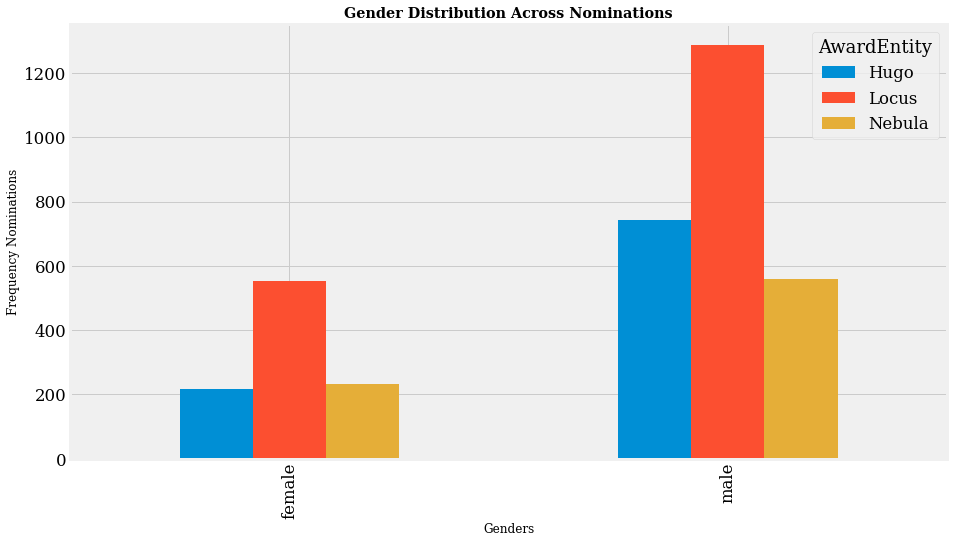

In [0]:
# gender in awards

ax = nominees_stats_awards.groupby(['AwardEntity','gender_2'])['gender_2'].count().unstack(0).plot.bar(title="Gender Distribution in Nominees", figsize=(14,8))
_ = ax.set_xlabel('Genders')
_ = ax.set_ylabel('Frequency Nominations')
_ = ax.set_title('Gender Distribution Across Nominations', weight='bold')

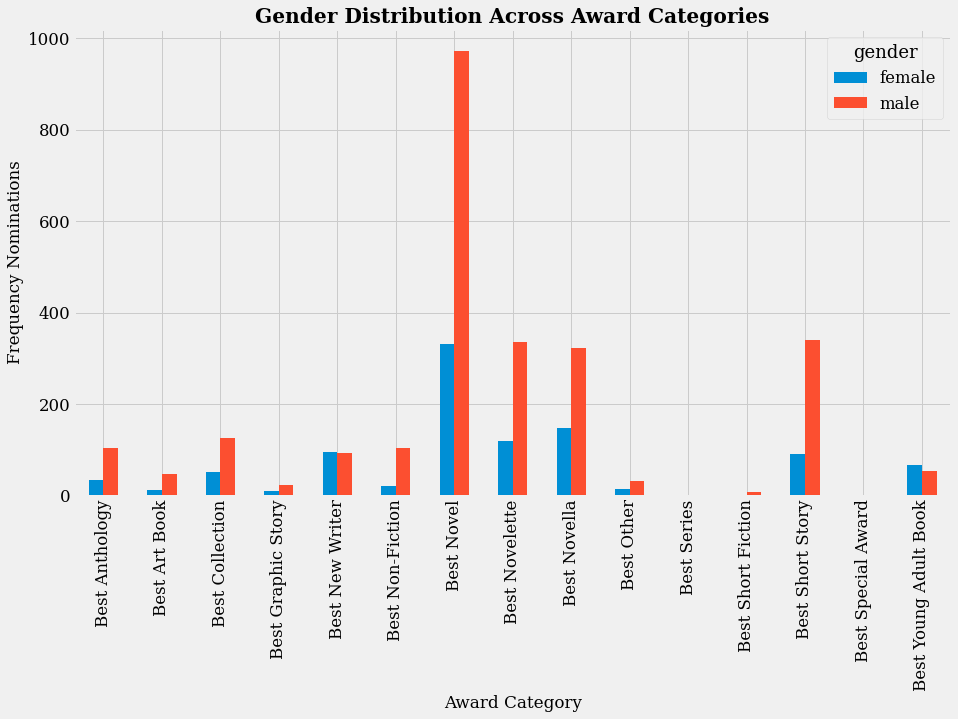

In [0]:
# gender in award categories
nom_awards
ax = nom_awards.groupby(['gender','AwardCategory'])['gender'].count().unstack(0).plot.bar(title="Gender Distribution in Nominees", figsize=(14,8))
_ = ax.set_xlabel('Award Category')
_ = ax.set_ylabel('Frequency Nominations')
_ = ax.set_title('Gender Distribution Across Award Categories', weight='bold')
plt.savefig("gender_award_categories.pdf", transparent=True)

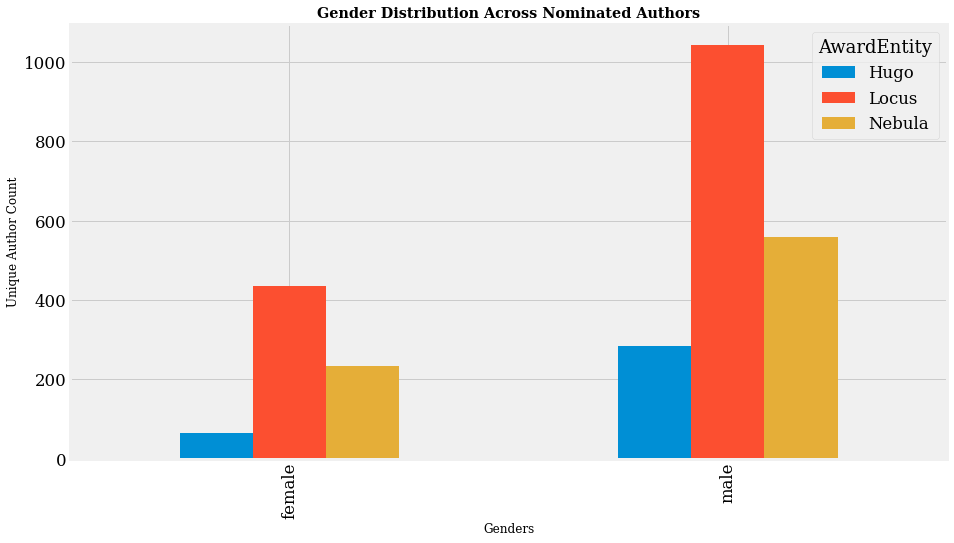

In [0]:
# gender in awards, unique authors

ax = nomunique.groupby(['AwardEntity','gender'])['gender'].count().unstack(0).plot.bar(title="Gender Distribution in Nominees", figsize=(14,8))
_ = ax.set_xlabel('Genders')
_ = ax.set_ylabel('Unique Author Count')
_ = ax.set_title('Gender Distribution Across Nominated Authors', weight='bold')

In [0]:
# gender in awards, unique authors

ax = nominees_stats_awards.groupby(['gender','AwardEntity'])['publication_year'].value_counts().count().unstack(0).plot.line(title="Gender Distribution in Nominees", figsize=(14,8))
_ = ax.set_xlabel('Year')
_ = ax.set_ylabel('Gender')
_ = ax.set_title('Gender Distribution Across Years', weight='bold')

AttributeError: ignored

In [0]:
# gender in awards, unique authors

ax = df.groupby(['gender','AwardEntity'])['publication_year'].plot.line(title="Gender Distribution in Nominees", figsize=(14,8))
_ = ax.set_xlabel('Year')
_ = ax.set_ylabel('Gender')
_ = ax.set_title('Gender Distribution Across Years', weight='bold')

KeyError: ignored

In [0]:
nominees_stats_awards.groupby(['gender','publication_year']).gender.agg('count').to_frame('c').reset

NameError: ignored

In [0]:
nominees_stats_awards_line

c
gender publication_year    
female 1956.0             1
       1961.0             1
       1963.0             2
       1967.0             1
       1968.0             4
...                      ..
male   2016.0            41
       2017.0            60
       2018.0            68
       2019.0            86
       2020.0            13

[123 rows x 1 columns]

In [0]:
lineplot=nominees_stats_awards.groupby(['publication_year','AwardEntity'])['gender'].value_counts()
lineplot

publication_year  AwardEntity  gender
1953.0            Hugo         male       1
1955.0            Hugo         male       4
1956.0            Hugo         male       8
                               female     1
1958.0            Hugo         male       2
                                         ..
2019.0            Hugo         male      19
                  Locus        male      67
                               female    50
2020.0            Hugo         male      13
                               female    11
Name: gender, Length: 321, dtype: int64

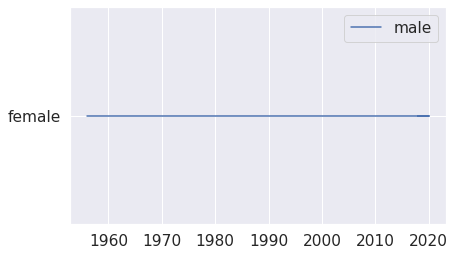

In [0]:
import seaborn 
import pandas as pd
import matplotlib.pyplot as plt

female_df=nominees_stats_awards[nominees_stats_awards['gender']=='female']
# cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
# dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
# activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(female_df.publication_year, female_df.gender, label="male")
# ax.plot(activity, cat, label="female")
ax.legend()

plt.show()

In [0]:
female_df

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,languages,date_published,publication_year,publisher,description,author_bio,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,3531,61894,NaN,0727845894,The Forbidden Tower,Marion Zimmer Bradley,/book/show/61894.The_Forbidden_Tower,Hardcover,English,July 1st 1994,1978.0,Severn House Publishers,This is the novel of four who defied the power...,Marion Eleanor Zimmer Bradley was an American ...,4.06,2947,67,3731,0,1,Hugo Award Nominee (1978),1,0,NaN,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3558,3558,462448,NaN,0441897087,Witch World,Andre Norton,/book/show/462448.Witch_World,Paperback,English,January 1st 1986,1963.0,Ace,Andre Norton enthralled readers for decades wi...,Alice Mary Norton always had an affinity to th...,3.83,4206,216,1052,0,1,Hugo Award Nominee for Best Novel (1963),1,0,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3561,3561,567197,NaN,0879978365,Sharra's Exile,Marion Zimmer Bradley,/book/show/567197.Sharra_s_Exile,Mass Market Paperback,English,October 1st 1981,1963.0,DAW,"The sequel to Heritage of Hastur, perhaps the ...",Marion Eleanor Zimmer Bradley was an American ...,3.95,2570,44,3731,0,1,Hugo Award Nominee for Best Novel (1963),1,0,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3566,3566,8269517,B0037Z6NB0,NaN,The Lost Kafoozalum,Pauline Ashwell

In [0]:
lineplot.set_index('publication_year')['gender'].plot();

AttributeError: ignored

In [0]:
df = pd.DataFrame([lineplot])
df

publication_year 1953.0 1955.0 1956.0         ... 2019.0        2020.0       
AwardEntity        Hugo   Hugo   Hugo         ...  Locus          Hugo       
gender             male   male   male female  ...   male female   male female
gender                1      4      8      1  ...     67     50     13     11

[1 rows x 321 columns]

In [0]:
df

publication_year 1953.0 1955.0 1956.0         ... 2019.0        2020.0       
AwardEntity        Hugo   Hugo   Hugo         ...  Locus          Hugo       
gender             male   male   male female  ...   male female   male female
gender                1      4      8      1  ...     67     50     13     11

[1 rows x 321 columns]

In [0]:
df.columns

MultiIndex([(1953.0,   'Hugo',   'male'),
            (1955.0,   'Hugo',   'male'),
            (1956.0,   'Hugo',   'male'),
            (1956.0,   'Hugo', 'female'),
            (1958.0,   'Hugo',   'male'),
            (1959.0,   'Hugo',   'male'),
            (1960.0,   'Hugo',   'male'),
            (1961.0,   'Hugo',   'male'),
            (1961.0,   'Hugo', 'female'),
            (1962.0,   'Hugo',   'male'),
            ...
            (2018.0,  'Locus', 'female'),
            (2018.0,  'Locus',   'male'),
            (2018.0, 'Nebula',   'male'),
            (2018.0, 'Nebula', 'female'),
            (2019.0,   'Hugo', 'female'),
            (2019.0,   'Hugo',   'male'),
            (2019.0,  'Locus',   'male'),
            (2019.0,  'Locus', 'female'),
            (2020.0,   'Hugo',   'male'),
            (2020.0,   'Hugo', 'female')],
           names=['publication_year', 'AwardEntity', 'gender'], length=321)

In [0]:
lineplot_df=pd.DataFrame(lineplot)

In [0]:
lineplot_df.columns

Index(['gender'], dtype='object')

AttributeError: ignored

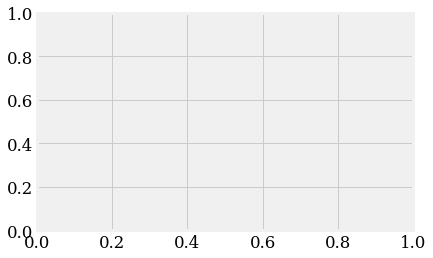

In [0]:
# combined time series

fig, ax = plt.subplots()
ax.plot(lineplot.publication_year, lineplot.gender, color='orange')
# ax.plot(little_rock_index, little_rock_mean, color='green')
# ax.plot(fayetteville_index, fayetteville_mean, color='brown')
# ax.plot(searcy_index, searcy_mean, color='blue')
plt.gca().legend(('Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy'))
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
def signaturebar(fig,text,fontsize=10,pad=5,xpos=20,ypos=7.5,
                 rect_kw = {"facecolor":"grey", "edgecolor":None},
                 text_kw = {"color":"w"}):
    w,h = fig.get_size_inches()
    height = ((fontsize+2*pad)/72.)/h
    rect = plt.Rectangle((0,0),1,height, transform=fig.transFigure, clip_on=False,**rect_kw)
    fig.axes[0].add_patch(rect)
    fig.text(xpos/72./h, ypos/72./h, text,fontsize=fontsize,**text_kw)
    fig.subplots_adjust(bottom=fig.subplotpars.bottom+height)

signaturebar(fig,"Jon Kaplan")
fig.text(x = 0, y = 1, s = "Gender Distribution Across Years",
               fontsize = 16, weight = 'bold', alpha = .75)
timeseriesplot=plt.show()
timeseriesplot

In [0]:
nomunique=nominees_stats_awards.drop_duplicates(subset='bookID')

In [0]:
nomunique.to_csv('nominees_stats_awards_unique2.csv')

In [0]:
nomunique.columns

Index(['Unnamed: 0', 'bookID', 'asin', 'isbn', 'bookTitle', 'authorName',
       'bookLink', 'format', 'languages', 'date_published', 'publication_year',
       'publisher', 'description', 'author_bio', 'average_rating',
       'ratings_count', 'text_reviews_count', 'author_followers',
       'goodreads_author', 'book_series', 'award', 'Nominee', 'Winner',
       'AwardCategory', 'AwardEntity', 'HugoAward', 'LocusAward',
       'NebulaAward', 'BestNovel', 'BestNovelette', 'BestNovella',
       'BestShortStory', 'BestArtBook', 'BestNonFiction', 'BestCollection',
       'BestAnthology', 'BestNewWriter', 'BestYoungAdultBook',
       'BestGraphicStory', 'BestSpecialAward', 'BestSeries',
       'BestShortFiction', 'BestOther', 'gender'],
      dtype='object')

In [0]:
nomunique.gender_2.value_counts()

male      1886
female     736
Name: gender_2, dtype: int64

In [0]:
nominees_stats_awards=pd.read_csv('nominees_stats_awards.csv')

In [0]:
nominees_stats_awards['gender_2']=nominees_stats_awards['authorName'].apply(lambda i : 'female' if i in female_names else 'male')

In [0]:
nominees_stats_awards['gender_2'].value_counts()

male      2588
female    1002
Name: gender_2, dtype: int64

In [0]:
del nominees_stats_awards['gender']
nominees_stats_awards['gender']=nominees_stats_awards['gender_2']
del nominees_stats_awards['gender_2']
nominees_stats_awardsn

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,languages,date_published,publication_year,publisher,description,author_bio,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,NaN,March 3rd 2016,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3586,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-dinosaur,Mass Market Paperback,English,1969,1956.0,Curtis Books,[A Reginald Rivers story.] A time machine that...,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",3.68,92,4,195,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3587,3587,91109,NaN,0441061358,The Long Tomorrow,Leigh Brackett,/book/show/91109.The_Long_Tomorrow,Mass Market Paperback,English,1962,1956.0,Ace Book,Two generations after destruction rained down ...,"Leigh Brackett was born on December 7, 1915 in...",3.66,2017,218,157,0,0,Hugo Award Nominee for Best Novel (1956),1,0,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3588,3588,509784,NaN,0449016190,The End

In [0]:
nominees_stats_awards.to_csv('nominees_stats_awards_all2.csv')

In [0]:
nominees_stats_awards.gender.value_counts()

male       2092
female      780
unknown     718
Name: gender, dtype: int64

DataError: ignored

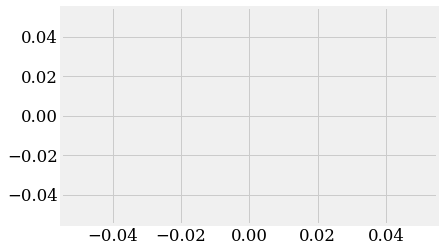

In [0]:
# line plot
line1 = plt.plot(publication_year, data1,'ko-',label='line1')
line2 = plt.plot(publication_year,data 1, 'ro-',label='line2') 

NameError: ignored

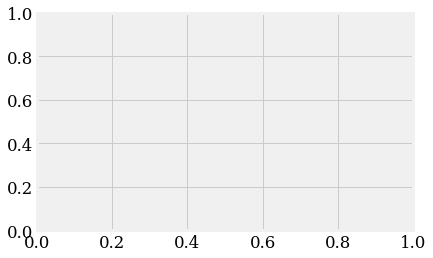

In [0]:
fig, ax = plt.subplots()
ax.plot(x=publication_year, y=gender, label="gender", data=nominees_stats_awards)
# ax.plot(activity, cat, label="cat")
ax.le
plt.show()

In [0]:
nominees_stats_awards

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,languages,date_published,publication_year,publisher,description,author_bio,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1,1,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Locus Award for Short Story for ""The Secret Li...",1,1,Best Short Story,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
2,2,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,English,February 2018,2019.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",3.84,237,58,30,1,0,"Hugo Award Nominee for Short Story for ""The Se...",1,0,Best Short Story,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3,3,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2018.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Nebula Award for Best Novelette (2018),1,1,Best Novelette,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
4,4,34659272,NaN,NaN,The Only Harmless Great Thing,Brooke Bolander,/book/show/34659272-the-only-harmless-great-thing,Paperback,English,January 23rd 2018,2019.0,Tor.com Publishing,"In the early years of the 20th century, a grou...",Brooke Bolander writes weird things of indeter...,3.91,3065,659,185,1,0,Locus Award for Novelette (2019),1,1,Best Novelette,Locus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,29519390,NaN,1681465050,Brightside Crossing,Alan E. Nourse,/book/show/29519390-brightside-crossing,ebook,NaN,March 3rd 2016,1956.0,Start Publishing LLC,Four men set out to prove their mettle by cros...,Alan Edward Nourse was an American science fic...,3.45,11,2,20,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3586,3586,2935921,NaN,NaN,A Gun for Dinosaur,L. Sprague de Camp,/book/show/2935921-a-gun-for-dinosaur,Mass Market Paperback,English,1969,1956.0,Curtis Books,[A Reginald Rivers story.] A time machine that...,"Lyon Sprague de Camp, (Pseudonym: Lyman R. Lyo...",3.68,92,4,195,0,0,Hugo Award Nominee for Best Novelette (1956),1,0,Best Novelette,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male
3587,3587,91109,NaN,0441061358,The Long Tomorrow,Leigh Brackett,/book/show/91109.The_Long_Tomorrow,Mass Market Paperback,English,1962,1956.0,Ace Book,Two generations after destruction rained down ...,"Leigh Brackett was born on December 7, 1915 in...",3.66,2017,218,157,0,0,Hugo Award Nominee for Best Novel (1956),1,0,Best Novel,Hugo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
3588,3588,509784,NaN,0449016190,The End

In [0]:
nebula.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,792.000000,7.920000e+02,727.000000,791.000000,792.000000,7.920000e+02,792.000000,792.00000,792.000000,792.000000,792.0,792.000000,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0
mean,797.670455,1.027703e+07,252.975241,1993.188369,3.780896,2.067105e+04,1142.823232,4516.47601,0.332071,0.313131,1.0,0.273990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,439.766190,1.251080e+07,174.427397,16.674354,0.446048,1.176089e+05,4804.669874,17464.04964,0.471254,0.464060,0.0,0.446286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,3.530000e+02,0.000000,1965.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,442.500000,3.525775e+05,124.000000,1978.000000,3.630000,5.375000e+01,8.000000,132.75000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,802.500000,3.091832e+06,250.000000,1994.000000,3.830000,5.320000e+02,52.000000,544.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1169.500000,1.819816e+07,350.000000,2009.000000,4.000000,3.805000e+03,324.000000,2160.25000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1518.000000,5.090688e+07,1177.000000,2018.000000,5.000000,1.932646e+06,67416.000000,221957.00000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#import pandas as pd
import numpy as np
import seaborn as sns
import requests
import bs4
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML


res = requests.get("http://www.worldswithoutend.com/authors_women.asp")
soup = BeautifulSoup(res.content, "html.parser")
female_names=[]
#divs = soup.find_all('div', attrs={'style': 'font-size: 14px; line-height:18px;', 'class': 'a'})
imgs = soup.find_all('img')
for img in imgs:
  parent = img.parent
  if parent.parent.get('id') == 'authorblock':
    female_names.append(img['alt'])


# Logit Regression (imbalanced)

In [0]:
# load data
from google.colab import drive
drive.mount('/content/drive')
books_df2=books_df[['bookTitle', 'authorName', 'text_reviews_count','average_rating','num_pages', 'book_id', 'ratings_count', 'isbn']]
nrows = 5000
bks2 = pd.read_csv('/content/drive/My Drive//mydata/booksFPawardsReviewsFPall.csv',
                  nrows=nrows)
# %cd /content/drive/My\ Drive/mydata
import pandas as pd
books_df=pd.read_csv('books_df.csv')
# rename columns
books_df.rename(columns={'review_count': 'text_reviews_count', 'rating_average': 'average_rating', 'book_author': 'authorName', 'book_title': 'bookTitle', 
                         'book_format': 'format', 'rating_count': 'ratings_count', 'pages': 'num_pages' }, inplace=True)

books_df2=books_df[['bookTitle', 'authorName', 'text_reviews_count','average_rating','num_pages', 'book_id', 'ratings_count', 'isbn']]
nrows = 5000
bks2 = pd.read_csv('/content/drive/My Drive//mydata/booksFPawardsReviewsFPall.csv',
                  nrows=nrows)
bks2[['Nominee','Nominee_Winner']]=bks2[['Nominee','Nominee_Winner']].fillna(0).astype(int)
bks2['awardNominee'] = bks2['award'].notna().astype(int)
# bks2Class = bks2[['text_reviews_count','average_rating','num_pages','publication_year', 'book_id', 'ratings_count', 'review_id', 'rating','n_votes',
#        'n_comments', 'awardNominee']]
bks2Class = bks2[['bookTitle', 'authorName', 'text_reviews_count','average_rating','num_pages', 'book_id', 'ratings_count', 'awardNominee', 'isbn']]
bks2Class.dropna(inplace=True)
books_df.dropna(inplace=True)

KeyboardInterrupt: ignored

In [0]:
# load data
from google.colab import drive
drive.mount('/content/drive')
books_df2=books_df[['bookTitle', 'authorName', 'text_reviews_count','average_rating','num_pages', 'book_id', 'ratings_count', 'isbn']]
nrows = 5000
bks2 = pd.read_csv('/content/drive/My Drive//mydata/booksFPawardsReviewsFPall.csv',
                  nrows=nrows)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


NameError: ignored

In [0]:
bks2
# import pandas as pd
# books_df=pd.read_csv('books_df.csv')

,Unnamed: 0,isbn,text_reviews_count,asin,average_rating,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series,user_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,bookID,bookTitle,authorName,award,Nominee,Nominee_Winner,awardNominee
0,0,NaN,7,B00071IKUY,4.03,Omnibus book club edition containing the Ladie...,Hardcover,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600.0,NaN,NaN,NaN,Book Club Edition,1987.0,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",d202352e716421da4ef3f7937df7c3f7,2fb420e846cd0105086b1134683a21a0,3,Competent. I'm sure I read the first half year...,Fri Dec 18 14:06:12 -0800 2009,Wed Jan 20 05:04:01 -0800 2010,Thu Jan 07 00:00:00 -0800 2010,NaN,1,0,NaN,NaN,NaN,NaN,0,0,0
1,1,NaN,7,B00071IKUY,4.03,Omnibus book club edition containing the Ladie...,Hardcover,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600.0,NaN,NaN,NaN,Book Club Edition,1987.0,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",18b61748a52de671cb549d812b9740c8,07725724ff7c49988348f9c0bc393b1b,4,"While these books are excellent overall, I thi...",Tue Apr 04 07:18:36 -0700 2017,Sun May 07 17:11:44 -0700 2017,Sat Apr 22 00:00:00 -0700 2017,Tue Apr 04 00:00:00 -0700 2017,0,0,NaN,NaN,NaN,NaN,0,0,0
2,2,NaN,7,B00071IKUY,4.03,Omnibus book club edition containing the Ladie...,Hardcover,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600.0,NaN,NaN,NaN,Book Club Edition,1987.0,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",24ec19e5301ffc5c8a030eac0d7a4ed2,c8d0f8845288db282b1e6f3ed31a5313,3,A collection of two novels about the mercenary...,Fri Oct 11 10:08:07 -0700 2013,Fri Oct 25 09:31:27 -0700 2013,Thu Oct 24 00:00:00 -0700 2013,Fri Oct 11 00:00:00 -0700 2013,0,0,NaN,NaN,NaN,NaN,0,0,0
3,3,1934876569,6,NaN,4.22,"To Kara's astonishment, she discovers that a p...",Paperback,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216.0,3.0,9.781935e+12,3.0,NaN,2009.0,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...,da784e55b4f838941141eeebd87ae137,04963b04a5c3f592ec5a802a5da382af,3,"This was a really cute book, though to be hone...",Fri Nov 27 00:13:59 -0800 2015,Sat Dec 12 00:33:26 -0800 2015,Fri Dec 11 00:00:00 -0800 2015,Fri Nov 27 00:00:00 -0800 2015,0,0,NaN,NaN,NaN,NaN,0,0,0
4,4,NaN,60,B01NCIKAQX,4.33,NaN,NaN,"[{'author_id': '242185', 'role': ''}]",NaN,318.0,NaN,NaN,NaN,NaN,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),958e7dec67566c7c83ffb5aa818cb979,9247a782870a24b13b80e5856fa6f8ce,3,Lots and lots of filler. I was skimming toward...,Fri Sep 01 19:26:11 -0700 2017,Mon Sep 25 20:44:45 -0700 2017,Mon Sep 25 00:00:00 -0700 2017,Fri Sep 01 00:00:00 -0700 2017,0,0,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0345481291,1423,NaN,3.89,When Britain intercepted a French ship and its...,Mass Market Paperback,"[{'author_id': '8730', 'role': ''}]",NaN,398.0,NaN,9.780345e+12,NaN,NaN,NaN,14069,23624,2213322,"Throne of Jade (Temeraire, #2)","Throne of Jade (Temeraire, #2)",bdbb67054b647860f48ab2406e31bb26,b882513eacda1ffdef77ac49d1ec0f44,3,"Alright! So, in this story, China has discover...",Wed May 22 12:40:20 -0700 2013,Thu Jan 14 12:27:39 -0800 2016,Tue Aug 06 00:00:00 -0700 2013,Fri Jul 19 00:00:00 -0700 2013,0,0,14069.0,"Throne of Jade (Temeraire, #2)",Naomi Novik,Locus Award for Best First Novel (2007),0,1,1
4996,4996,0345481291,1423,NaN,3.89,When Britain interce

In [0]:
# print(bks2.columns)
print(books_df.columns)

Index(['Unnamed: 0', 'bookID', 'bookTitle', 'authorName', 'description',
       'asin', 'isbn', 'num_pages', 'format', 'languages', 'publisher',
       'date_published', 'publication_year', 'average_rating', 'ratings_count',
       'text_reviews_count', 'author_followers', 'author_bio',
       'goodreads_author', 'book_series'],
      dtype='object')


In [0]:
# rename columns
books_df.rename(columns={'review_count': 'text_reviews_count', 'rating_average': 'average_rating', 'book_author': 'authorName', 'book_title': 'bookTitle', 
                         'book_format': 'format', 'rating_count': 'ratings_count', 'pages': 'num_pages' }, inplace=True)

In [0]:
# books_nyt_df=books_df.merge(nyt_df, left_on='isbn', right_on='isbn', how='left')
bks2Class.book_id=bks2Class.book_id.astype(str)
#books_df_all=bks2Class.merge(books_df2, left_on='book_id', right_on='book_id', how='outer')
books_df_all = pd.merge(bks2Class, books_df2, on='book_id', how='left').fillna(method='ffill')
#books_df_all[['Nominee','Nominee_Winner']]=books_df_all[['Nominee','Nominee_Winner']].fillna(0).astype(int)
books_df_all.dropna(inplace=True)
#books_df_all[['AwardNominee']]=books_df_all[['AwardNominee']].fillna(0).astype(int)
books_df_all

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,bookTitle_x,authorName_x,text_reviews_count_x,average_rating_x,num_pages_x,book_id,ratings_count_x,awardNominee,isbn_x,bookTitle_y,authorName_y,text_reviews_count_y,average_rating_y,num_pages_y,ratings_count_y,isbn_y
0,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,49,3.99,320.0,27693272,186,1,1473212596,The House of Binding Thorns,Aliette de Bodard,159.0,3.97,320.0,736.0,9781473212596
1,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,49,3.99,320.0,27693272,186,1,1473212596,The House of Binding Thorns,Aliette de Bodard,159.0,3.97,320.0,736.0,9781473212596
2,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,49,3.99,320.0,27693272,186,1,1473212596,The House of Binding Thorns,Aliette de Bodard,159.0,3.97,320.0,736.0,9781473212596
3,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,49,3.99,320.0,27693272,186,1,1473212596,The House of Binding Thorns,Aliette de Bodard,159.0,3.97,320.0,736.0,9781473212596
4,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,49,3.99,320.0,27693272,186,1,1473212596,The House of Binding Thorns,Aliette de Bodard,159.0,3.97,320.0,736.0,9781473212596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,"Throne of Jade (Temeraire, #2)",Naomi Novik,1423,3.89,398.0,14069,23624,1,0345481291,The Memory Garden,Mary Rickert,259.0,3.50,295.0,1568.0,9781402297120
284,"Throne of Jade (Temeraire, #2)",Naomi Novik,1423,3.89,398.0,14069,23624,1,0345481291,The Memory Garden,Mary Rickert,259.0,3.50,295.0,1568.0,9781402297120
285,"Throne of Jade (Temeraire, #2)",Naomi Novik,1423,3.89,398.0,14069,23624,1,0345481291,The Memory Garden,Mary Rickert,259.0,3.50,295.0,1568.0,9781402297120
286,"Throne of Jade (Temeraire, #2)",Naomi Novik,1423,3.89,398.0,14069,23624,1,0345481291,The Memory Garden,Mary Rickert,259.0,3.50,295.0,1568.0,9781402297120


In [0]:
# awards preprocessing
awards['book_id']=awards['bookID']
awards['book_id']=awards['book_id'].astype(str)
awards.rename(columns={'Year': 'publication_year'}, inplace=True)


In [0]:
# merge with awards
books_df_awards = pd.merge(books_df_all, awards, on='book_id', how='left').fillna(method='ffill')
books_df_awards.publication_year=books_df_awards.publication_year.astype(int)
books_df_awards

NameError: ignored

In [0]:
books_df_all.dropna(inplace=True)

In [0]:
books_df_all

,text_reviews_count_x,average_rating_x,num_pages_x,book_id,ratings_count_x,awardNominee,text_reviews_count_y,average_rating_y,num_pages_y,ratings_count_y
0,7,4.03,600.0,7327624,140,0,NaN,NaN,NaN,NaN
1,7,4.03,600.0,7327624,140,0,NaN,NaN,NaN,NaN
2,7,4.03,600.0,7327624,140,0,NaN,NaN,NaN,NaN
3,6,4.22,216.0,6066812,98,0,NaN,NaN,NaN,NaN
4,60,4.33,318.0,33394837,269,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4303,1423,3.89,398.0,14069,23624,1,259.0,3.5,295.0,1568.0
4304,1423,3.89,398.0,14069,23624,1,259.0,3.5,295.0,1568.0
4305,1423,3.89,398.0,14069,23624,1,259.0,3.5,295.0,1568.0
4306,1423,3.89,398.0,14069,23624,1,259.0,3.5,295.0,1568.0


In [0]:
books_df_all.columns

Index(['Unnamed: 0_x', 'isbn_x', 'text_reviews_count_x', 'asin',
       'average_rating_x', 'description_x', 'format_x', 'authors',
       'publisher_x', 'num_pages_x', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'ratings_count_x', 'work_id', 'title',
       'title_without_series', 'user_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments', 'bookID', 'bookTitle_x', 'authorName_x', 'award',
       'Nominee', 'Nominee_Winner', 'awardNominee', 'Unnamed: 0_y',
       'bookTitle_y', 'authorName_y', 'description_y', 'isbn_y', 'num_pages_y',
       'format_y', 'languages', 'publisher_y', 'date_published',
       'average_rating_y', 'ratings_count_y', 'text_reviews_count_y'],
      dtype='object')

In [0]:
p = books_df_all.reindex(columns=['book_id', 'isbn', 'bookAuthor', 'bookTitle', 'average_rating', 'text_reviews_count', 'ratings_count'])
#cleanmerged= books_df_all[['book_id', 'isbn', 'bookAuthor', 'bookTitle', 'average_rating', 'text_reviews_count', 'ratings_count']]
# new = books_df_all.filter(['book_id', 'isbn', 'bookAuthor', 'bookTitle', 'average_rating', 'text_reviews_count', 'ratings_count'], axis=1)

In [0]:
p

,book_id,isbn,bookAuthor,bookTitle,average_rating,text_reviews_count,ratings_count
0,7327624,NaN,NaN,NaN,NaN,NaN,NaN
1,7327624,NaN,NaN,NaN,NaN,NaN,NaN
2,7327624,NaN,NaN,NaN,NaN,NaN,NaN
3,6066812,NaN,NaN,NaN,NaN,NaN,NaN
4,33394837,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4995,14069,NaN,NaN,NaN,NaN,NaN,NaN
4996,14069,NaN,NaN,NaN,NaN,NaN,NaN
4997,14069,NaN,NaN,NaN,NaN,NaN,NaN
4998,14069,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
new

,book_id
0,7327624
1,7327624
2,7327624
3,6066812
4,33394837
...,...
4995,14069
4996,14069
4997,14069
4998,14069


In [0]:
del books_df_all

In [0]:
# nrows = 5000
# bks2 = pd.read_csv('/content/drive/My Drive//mydata/booksFPawardsReviewsFPall.csv',
#                   nrows=nrows)
# bks2[['Nominee','Nominee_Winner']]=bks2[['Nominee','Nominee_Winner']].fillna(0).astype(int)
# bks2['awardNominee'] = bks2['award'].notna().astype(int)
# bks2Class = bks2[['text_reviews_count','average_rating','num_pages','publication_year', 'book_id', 'ratings_count', 'review_id', 'rating','n_votes',
#        'n_comments', 'awardNominee']]
# bks2Class.dropna(inplace=True)


import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

cols=['text_reviews_count_x','average_rating_x', 'ratings_count_x', 'num_pages_x', 'publication_year']
x= books_df_awards[cols]
y= books_df_awards['awardNominee']


import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249409
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.085     
Dependent Variable:  awardNominee      AIC:               1865.1005 
Date:                2020-05-26 11:58  BIC:               1896.2066 
No. Observations:    3719              Log-Likelihood:    -927.55   
Df Model:            4                 LL-Null:           -1013.3   
Df Residuals:        3714              LLR p-value:       4.8632e-36
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
text_reviews_count_x  0.0013   0.0002  8.9085 0.0000  0.0010  0.0016
average_rating_x     -2.1369

In [0]:
# add nyt
nyt['isbn_y']=nyt['AISN']
# books_nyt_all=books_df_awards.merge(nyt, left_on='isbn_x', right_on='isbn_x', how='left')
books_nyt_all= pd.merge(books_df_all, nyt, on='isbn_y', how='left').fillna(method='ffill')

In [0]:
books_nyt_all

,text_reviews_count_x,average_rating_x,num_pages_x,book_id,ratings_count_x,awardNominee,isbn_x_x,text_reviews_count_y,average_rating_y,num_pages_y,ratings_count_y,isbn_y,description,publisher,rank,bookTitle,authorName,NYT_NumberOne,NYT_Bestseller,AISN,NYT_Weeks_At_One,Weeks_On_NYT,isbn_x_y
0,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2905,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2906,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2907,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
books_nyt_all.NYT_Weeks_At_One.unique()

array([nan])

In [0]:
books_df_all

,text_reviews_count_x,average_rating_x,num_pages_x,book_id,ratings_count_x,awardNominee,isbn_x,text_reviews_count_y,average_rating_y,num_pages_y,ratings_count_y,isbn_y
392,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596
393,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596
394,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596
395,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596
396,49,3.99,320.0,27693272,186,1,1473212596,159.0,3.97,320.0,736.0,9781473212596
...,...,...,...,...,...,...,...,...,...,...,...,...
3296,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120
3297,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120
3298,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120
3299,1423,3.89,398.0,14069,23624,1,0345481291,259.0,3.50,295.0,1568.0,9781402297120


In [0]:
books_df_awards.publication_year=books_df_awards.publication_year.astype(int)

# books_df_awards = books_df_awards.drop_duplicates('book_id')

In [0]:
books_df_awards

,text_reviews_count_x,average_rating_x,num_pages_x,book_id,ratings_count_x,awardNominee,text_reviews_count_y,average_rating_y,num_pages_y,ratings_count_y,Unnamed: 0,bookID,bookLink,bookTitle,authorName,award,Nominee,Winner,publication_year,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther,gender
0,49,3.99,320.0,27693272,186,1,159.0,3.97,320.0,736.0,0.0,27693272.0,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1.0,0.0,2018,Best Novel,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
22,26,3.74,368.0,18189990,88,0,159.0,3.97,320.0,736.0,0.0,27693272.0,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1.0,0.0,2018,Best Novel,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
28,16,4.27,464.0,15900897,96,0,159.0,3.97,320.0,736.0,0.0,27693272.0,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1.0,0.0,2018,Best Novel,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
34,4,4.13,384.0,30971684,7,0,159.0,3.97,320.0,736.0,0.0,27693272.0,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1.0,0.0,2018,Best Novel,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
37,325,4.13,388.0,30971685,1092,0,159.0,3.97,320.0,736.0,0.0,27693272.0,/book/show/27693272-the-house-of-binding-thorns,The House of Binding Thorns (Dominion of the F...,Aliette de Bodard,Locus Award Nominee for Best Fantasy Novel (2018),1.0,0.0,2018,Best Novel,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,66,4.10,414.0,7114042,833,0,259.0,3.50,295.0,1568.0,0.0,18601927.0,/book/show/18601927-the-memory-garden,The Memory Garden,Mary Rickert,Locus Award for Best First Novel (2015),1.0,1.0,2015,Best New Writer,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3622,8,4.07,399.0,13164594,41,0,259.0,3.50,295.0,1568.0,0.0,18601927.0,/book/show/18601927-the-memory-garden,The Memory Garden,Mary Rickert,Locus Award for Best First Novel (2015),1.0,1.0,2015,Best New Writer,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3625,23,3.45,13.0,27774766,62,0,259.0,3.50,295.0,1568.0,0.0,18601927.0,/book/show/18601927-the-memory-garden,The Memory Garden,Mary Rickert,Locus Award for Best First Novel (2015),1.0,1.0,2015,Best New Writer,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3631,48,3.94,420.0,906901,586,0,259.0,3.50,295.0,1568.0,0.0,18601927.0,/book/show/18601927-the-memory-garden,The Memory Garden,Mary Rickert,Locus Award for Best First Novel (2015),1.0,1.0,2015,Best New Writer,Locus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown


In [0]:
nrows = 5000
bks2 = pd.read_csv('/content/drive/My Drive//mydata/booksFPawardsReviewsFPall.csv',
                  nrows=nrows)

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
# linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

X_predict = []  # put the dates of which you want to predict kwh here
y_predict = model.predict(X_predict)

ValueError: ignored

In [0]:
#Split the data into train and test dataset
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42

#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x_train,y_train)

#predict the test set
y_pred_test_data=regressorObject.predict(x_test)

SyntaxError: ignored

# Hugo nebula and locus


In [0]:
hugo.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,958.000000,9.580000e+02,894.000000,958.000000,958.000000,9.580000e+02,958.000000,958.000000,958.000000,958.000000,958.0,958.000000,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0,958.0
mean,2115.269311,1.132198e+07,272.689038,1994.581420,3.875177,2.439127e+04,1162.940501,8979.886221,0.328810,0.327766,1.0,0.303758,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1240.296092,1.376168e+07,221.389174,17.833233,0.463148,1.415146e+05,3986.299201,35935.718033,0.470026,0.469644,0.0,0.460120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,5.000000e+00,0.000000,1953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,966.500000,2.771452e+05,134.000000,1981.000000,3.700000,7.950000e+01,9.000000,180.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2297.500000,4.003444e+06,242.000000,1997.000000,3.910000,7.590000e+02,72.000000,826.500000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3349.750000,1.976442e+07,365.000000,2010.000000,4.100000,7.757000e+03,539.250000,3893.750000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3589.000000,5.282637e+07,3101.000000,2020.000000,5.000000,2.657512e+06,52326.000000,715986.000000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
nebula.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,792.000000,7.920000e+02,727.000000,791.000000,792.000000,7.920000e+02,792.000000,792.00000,792.000000,792.000000,792.0,792.000000,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0
mean,797.670455,1.027703e+07,252.975241,1993.188369,3.780896,2.067105e+04,1142.823232,4516.47601,0.332071,0.313131,1.0,0.273990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,439.766190,1.251080e+07,174.427397,16.674354,0.446048,1.176089e+05,4804.669874,17464.04964,0.471254,0.464060,0.0,0.446286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,3.530000e+02,0.000000,1965.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,442.500000,3.525775e+05,124.000000,1978.000000,3.630000,5.375000e+01,8.000000,132.75000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,802.500000,3.091832e+06,250.000000,1994.000000,3.830000,5.320000e+02,52.000000,544.00000,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1169.500000,1.819816e+07,350.000000,2009.000000,4.000000,3.805000e+03,324.000000,2160.25000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1518.000000,5.090688e+07,1177.000000,2018.000000,5.000000,1.932646e+06,67416.000000,221957.00000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
locus.describe()

,Unnamed: 0,bookID,num_pages,publication_year,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,Nominee,Winner,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
count,1840.000000,1.840000e+03,1796.000000,1839.000000,1840.000000,1.840000e+03,1840.000000,1840.000000,1840.000000,1840.000000,1840.0,1840.000000,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0,1840.0
mean,2056.560870,1.018919e+07,353.783408,2001.268080,3.900364,3.620514e+04,1834.490761,18223.308696,0.374457,0.438587,1.0,0.226630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,814.031263,1.287571e+07,198.334374,13.848214,0.392512,2.268120e+05,7719.420438,85180.777829,0.484114,0.496349,0.0,0.418765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000e+00,0.000000,1971.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1647.750000,2.191940e+05,240.000000,1989.000000,3.740000,1.897500e+02,22.000000,245.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2185.500000,2.529186e+06,334.000000,2006.000000,3.920000,1.400000e+03,131.000000,1259.500000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2691.250000,1.769748e+07,448.000000,2013.000000,4.092500,1.061550e+04,747.250000,5189.000000,1.000000,1.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3239.000000,5.312054e+07,1931.000000,2019.000000,5.000000,6.157960e+06,168538.000000,715991.000000,1.000000,1.000000,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
